# L.3 Clustering 🐍


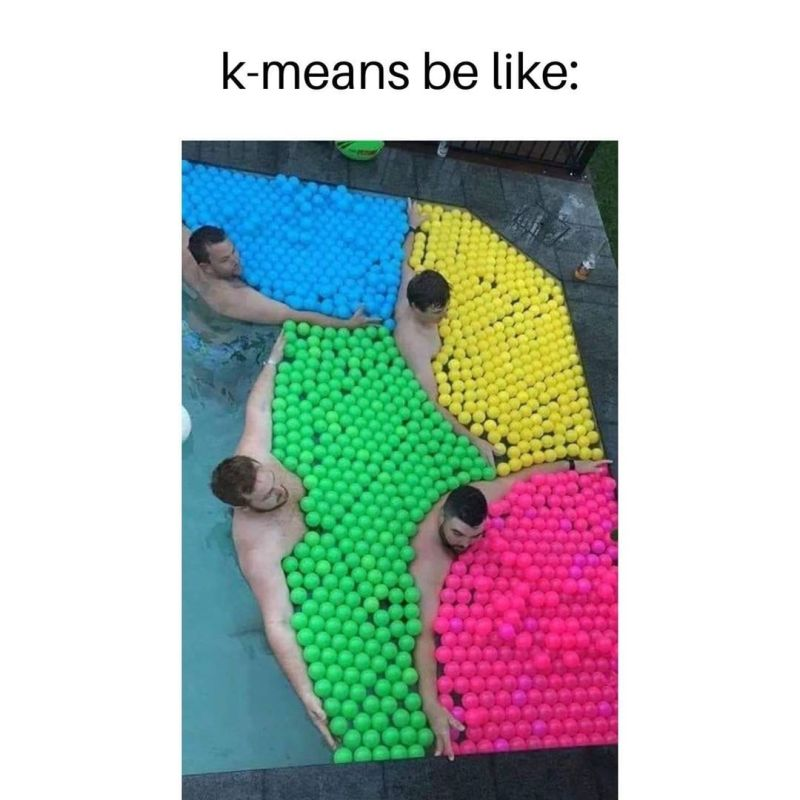

In [4]:
from IPython import display
#
im = "/9j/4AAQSkZJRgABAQAAAQABAAD/4SpiRXhpZgAATU0AKgAAAAgABQEaAAUAAAABAAAASgEbAAUAAAABAAAAUgEoAAMAAAABAAIAAAITAAMAAAABAAEAAIdpAAQAAAABAAAAWgAAALQAAABIAAAAAQAAAEgAAAABAAeQAAAHAAAABDAyMjGRAQAHAAAABAECAwCgAAAHAAAABDAxMDCgAQADAAAAAQABAACgAgAEAAAAAQAAAyCgAwAEAAAAAQAAAyCkBgADAAAAAQAAAAAAAAAAAAYBAwADAAAAAQAGAAABGgAFAAAAAQAAAQIBGwAFAAAAAQAAAQoBKAADAAAAAQACAAACAQAEAAAAAQAAARICAgAEAAAAAQAAKUYAAAAAAAAASAAAAAEAAABIAAAAAf/Y/9sAhAABAQEBAQECAQECAwICAgMEAwMDAwQFBAQEBAQFBgUFBQUFBQYGBgYGBgYGBwcHBwcHCAgICAgJCQkJCQkJCQkJAQEBAQICAgQCAgQJBgUGCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQkJCQn/3QAEAAr/wAARCACgAKADASIAAhEBAxEB/8QBogAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoLEAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+foBAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKCxEAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwD+/iiiigAooooAKKK/On9un9smT9kDx/8ACK41Wcf2H4v1nUdIurJI0e51C6/syeTTbO2eQqscs16sSBmZUAPzsq5NAH6LUV+fHxm/bo1T4ZzeF/B3hbwTL4i8Z67Nd2t5pIvhZwafcWOlTatcRvfTQGOcCOBo1eFWVpCuSqkkfOEX/BYDQI9F04674Cu9J1nxPD4fvvDdldX8bR3lh4jsrzULaa6ntoZjaPFBYXBmiEcxDBAjPu4AP2Wor8ldF/4Kv+D9a8X+BNBPg2/srTxfJp1pdSXU4S80+81K4uLSKNrNYmcwiW3J86Z7cSxOkkCzKW24unf8FWdcl+G0HxG1r4TapZR634dh8T6FBHfR3b3GnHUbbTrie9W1hkks47druGdysdwfs5Z9oZGQAH7CUV+Ynj39sn4t6v4T+A3j34JeHrbUZviZrlzZXej/ANo2csMkMWl6hcZXU4vOiWJJbZZPMjRpGQbDGHLIvkemf8Fj/AOr+K4fBth4G1V9R0i7tdO8VWiOZrjS7251KbTDDbJBDKl+IpIHnkdZIlFvh1LOTGoB+y9FfkR8c/2yvi/8Ov2iPiB8NdMvYk07SG0SHS0+yRyFJb/RtXvpvMdmUlTLZREH5sAFQMMSPP8A4ef8Fe9F1X9n/wCHfj1ND/4SO+8bQ29hp2oC4FpZanqVjpv2vXZAIobiS2gtJVaBC0RMspwiiIeaQD9t6K+ef2bvjnrH7Q3gaH4lv4VvfDWi6lb2lzph1F1W6uEnt0ecS22A9u1vOXgIfPmbPMQ7GFfQ1ABRRRQAUUUUAf/Q/v4ooooAKKKKACvFvjD+zv8ABf4/xWFv8ZNAt/EEOmLeJbxXW4xquoWslncgqGAbfBI6ZIJXO5cMAR8Mf8FRv+CnGlf8Ez/CPhTxXqvhCTxcvii5u7ZYo75bIwm1jSTOWhm37t+MYGMd6/HZf+DqPw55Ykk+Cl2oOOf7ejPUZ/58fwruo5ZXqQ9pCOhw1syoU5ck5an9OeofAD4V6vb+FINb0+S+bwVDNb6RLc3E8ssKXFm+ny75XcvKz20jIzyl2Od2d3NeTap+wh+zBqWl2enQ+H5LCTTbDR9Nsbyxvbu2vLO30GOeHThb3MUqyxNDFczRllYGRJGWQsDiv5xdb/4OwvC+jWqXB+B93JuAOBr0YI5x/wA+BouP+DrzQ102O+svgZdys67ih8QRjHOMEjTz/KreVYhfZM1m+H/m/M/od07/AIJ1/skaP4m07xVo/hua0n0x9OnSKHUb5bea50klrK5uYRP5dzcQlmImmDuxJLljgjrtW/Yl/Zu1bwzovhX+w5bO38N6SuiaTLZXt3a3FlZpc292qQzwzJKrLPawuH3bvk2klWYH+db4af8AB1R4I8dXw0zXvg/PoM+W+SbXo5CVXug+wqXP+yBkfSug+Jf/AAdG+A/B1mh8HfCW48RXgfE9uNaS1MUe3dvLPYtnPAxj3zxXiyxcFifqbvz9rP8AO1vxPI/10y764sApv2n+Cdl6y5eVfNn9AWq/sP8A7OGq/DPwv8JhpF1Z6X4LvpdU0WSy1C9try0v7gT+ddLdwzLO00puZzIzu28yMWzmsOz/AOCfH7Jum3uk3mleGXtBpS26tFDfXiRXxtLp763fUoxNtv5IruWSdXuhKxkdiSdxFfzFD/g79gGr22jTfs53sclxNHCGbxNEFUyMFDE/2bjAzknsK0fF/wDweA+BvB3irUPC138Cb+c2EskX2iLX42ikKdCpFgchj37V6TwlRK7R9LGtFuyZ/VL4w/ZI/Z/8e/EC/wDih4q0EXWtaolql1N9ouFWX7HDc20DGJZBHvSG8nj3BQxV8EnauPPLj/gnx+yj9jS10fw9Po7wNZyQT6ZqF7ZT28tlZf2dHLBLBOjRSSWWLed0IaeMKJS5VSP5dx/weV/DUybD8C7xeuN/iFEJwOODp3c8frW5af8AB4X4GuhlPgTdkc52+I4j90c/8w/14HrXO1Y0Wux/XR8K/gn8OfgpZXGlfDa0m0+yuEtYhatdXE8EKWdultCsEU0jpCPLjBfywvmPmR9zszH1ev4ppf8Ag8c8JCeOwh+AF891JN5QiHiOLjAyWJ/s/oP6H2z+9X/BJz/gqnp3/BUjwh4y8Wad4Jl8FjwheWtm0Ut+t/55uo3k3Blgg27dmMYOc9amclGSg9zF4iCmqd9T9b6KKKZsFFFFAH//0f7+KKKKACiiigD+e/8A4OAfC2l+L/ht8OtF1yBbqzk1K9MkMiK6OUiiZcqwJJBGQBjPQ1/LPqH7OPwg1NtqaWtsSd2IJHiHUscbSFHXGcYAIA6V/Un/AMHB/iGx8HfBzwR4y8RTxWmi6beX8l7cOxVo8xwiLaoBLbnwpC/NyMA81/KP8Of2oPh/8Y9Yl0jwM86XYiMjQ3NuykRqcEo33TycjOMLkYzX+mf0Y8fwtieFsPlmZulKs5TXLLlctZNpJPXZqx/k/wDStyrjfC8YYvNsmVWGGUab54cyh8EU27Pumn2tro0cV4n/AGNPBGpmM2V5eRxqysUUqSVBywG4cEjp6ck9q53xT+y2UKx+ArwSWsaOH+1oQN5+aGGPYCXZhwx28H5sYr7ai1OGdVsLcnlAWYqdgLYwADyf68E8Cl/s27miluH/ANXKqHMADISjcE87lb1IwSeBxX7pmPgBwliISjDCKN3vFtW9NT+ecp+k3xnhZQlWxrko6Wkk79NVb7tT8oPEn7I/xGSyk1n+z4b63t7hY/3Eqyl1PDOoODtQna24A57Yrz64+E3ifwjbPby6RdJHMdzAQsV6cfdyOQc1+1kWk2drCYLZzGCfOdCQVYrxlgfvc9fU8VP9iieB96JJlueAOvGMcdzjH4dM1+V8QfQ8yas3UwNeVN262l/kz9WyH6cub0JcuPwsKqvurwdtNOqPwastBnl1qSS6jCGBE+RxtJDAqG2n3Gea0/FGn6fdzpYhFkDptO4DA242gcHGec1/Sp+yp4Q+GnxIlTwf418OQ6raLcTW0WoajpvnxTsGecxpMUB3RrGWJO0YG0HmvUvi5/wSl/Z1+JXhmTTfDOmpoGsGNXjv7bzcLM7puJi8wI0YAcKhxtBHPev8U/E/6T2QcKcT4nhnNoS/dyceeNpRsm1drpbra5/rVwpkGIzLLMPmdB29pCMuXVNcyTtr6+R/JD/wqbwxq1w4+zJuSMtgA5JBGTwcdD+lWLH9mvwl4gne1tJvstwFWRNrcdTn6Yx6/jX258Wv2R/in+zj45/4Rf4ioLYBTLbTnPkToAOYnOdxBIVlOCp4PHNeWXdnFYahpVvp5Mk9+c3Lj5THApACsuBw/VWzgD3zX7pw9jcvzPCU8fgpqdOeqktnf+vU5sTjcXh5ulNtNHhb/sl6p8PdMvfHN15txiBjb71PAB+eRfvA5Ax1HFf2Wf8ABpBCYfg78aA4wx1rSvy+zT1+D8vxCs/EOl2ug6jYrBbNAyrZDG1UIKEgttZdyc47nnHNfv8Af8Gomi3Hhv4cfHPw/eEmWz8RadGc9cCCfaT7lcHqay4jy5Uq8KkNndEZVi51cTFzWup/WzRRRXkn2QUUUUAf/9L+/iiiigAooooA/m5/4OUfBdr8Tv2ZvDHw1uJhA2p3N9JFIc4WW2SGWMsByV3gBh6HPav5LPhD4p074K+DF8HeN00+zvkjVJ5EtxHLcBG/d7ZQvbAJ3Ejj8a/rQ/4OMbjXrH4f/CzUNCi84w6jqjOmMnAt4SCO/B7c56Gv51fhn8SfhV4m0ePRvEsNu7y5EsVyyKVdT/CzY79MHI6V6NCpXwrpYqlJqzT03TT3/A56OOwuKdXLq0Vtyu+zUlt+J0fhbUotT0+HVrcq8FwpeNwRtcY5YEZHI5PtlRXVR6RpLyi/aMCUnORkdvbpx/3yOeua7q38AfAW8skXwZfjQb8iMMI3eS1by3348nftQsTyUxnuDXnmrWmsaUktgSNSmQSYntfLliLKP3YHKPtz94FdxxzX+t/hz9J/hjOcNBYquqNZJXjNqOq7N2Tv0tr5H+I/jH9EPjDIMdOpgsPKvQlJ2lSTlo7vWKu1bZ3Vuz1Lt9aWFzCv20qvlnILttII6HPY+g7D6isyzkuWZ2IBtlTz45X3OZAhIfK4AAxwpLE4ySAazLDxPE0ws9TuY5Lx3ih8ry3iG5l+YrEf3mFcfMx42gZ4rz3XdZ0ya1DpcTW4kkFs4kR4d800ghPlh1DkK7l8qQMYz2NfqWY8e5Y6M5wrx0g52Uo3cUtXu/w6o/Esk8Ms4qVY0quHmk5xhdxlZSfTZa7b6a/M+8fAv7Un7N/7O3h/wlpHxM1+z0O7b7TcpZsJJWZ7qBIbeQ+Uj7LdYnfc74YsABkEkfq/ot9pN5s8XWlzDcWd1bI0MsZV4XhVJJPNjYZ3A792VYgLjNfxJftOfs5/GG+/aQ13UNNkivNLvz51rcSsF8uNIlURFclsDGExwQK/qO/4JyeDfFfw+/Y88HeCfEd0Jr+GyeWdnPm+Ss0zusIRm5RV6b2CDGApFf8AH79Nnwxy7ASfEOGxDdSvVkpRdtpOU7qyVknp80j/AKX+CJSp0YYaULKEUl8kl17o+wvil8JPhL+0V4Tk8MeK7ODUtNuY1kWYICQ0qPJFLFMuQMFldCOMgdRX84H7Zf7Cfiv9nbVb3xPZh9c8NTM32a8OWmgVF3hJgnO2NSv73AUnqBxX9LpstM8Gea/gUQRazqskEfkyB1WV0EdtE5EKO0ccUYIASOOP5QC3Oa1NesB41sLnS7ohzNlr60u42kBtFkb5Cm4xxtcdA8kmVXGUP3a/BfArx4zzgnGRqYabqYKXxU5PTpdrflfZrR9fL1OIOHcPmFPlatNbM/jc8Dah8PfsV3rPiS8eJLaB1tFRTKZrmRflQkE+XgHeWYbWAx1r+q7/AINiLW3Hgn4zaxbuJBfarpDuwGPnS2mU55OTgA596/kp+OPwiX4TfFzxP4HvbGC2fTtQmijJLB/J3losMAvHlsvzAAE8gYr+sr/g1vtba2+E/wAXfs2cNrOm9X39Lebocmv9uqGaRzDL6eNg04zSlG3ZrTq777n4hhKMKeMVNKzjdP1Vz+qaiiivPPqQooooA//T/v4ooooAKKKKAPwG/wCC9sv/ABbHwFY7thnvr/Y23diRYoimfYng9OtfyC+Nfh7Y6LYTeINWjikYlnkkWQJbIB/G0YDNk9wo5Pr1r+uD/g4HiWT4XfD8MM/6dqAXHUMYoQvI6c1/H94oudfZBbX7cvI0auwIwnCjJxx6DPX1r9d4bo4apl1P20NVez+fX0P534xrYqOdVo0Z6Pluu3urVHN/B3wJq/xH8eaN4D0KAWa6oyySy28hcCHeWkkARiFXylYjJ4Ir9QfDvhzwn4s1tX8N3tjeaJpoSxdPLhmYNp6SmAtcyFXiAbHmJhgRjLc0v7G/wE/4Q74MeIfjZdM6z39u+mWjr8hEDv5cm1hnBJJAODgA+pr0jVpdPtLoeFdIjhtbzVYr+e2ghDRiQR7EaUNHHHGoMeQW+bPQqTX8+eMeaU51Y4ektY31S/rY/lD6VvFWNyihl+Eozkq1TmqXTtaFrW7rS8rrVWXY8hh8FaXqlwNMK3DzxLZvJLC7xxvE8TSfKWmcMrtlZwpJVAD8p5rzvUfhpp9i8+pWIgS1VbYwvAgNztR/NZJ5ZHkBWfBRVX522oe9fRuozwnWNMuNKe4mdnupLZrbzFswqRC323EoK7IgjZVyiEsAORWKvh/TbZbVLwNeyQmJzcToplMtuCltLMwJO4AMkUS7edrGvynA8T4zC1Y1aFaUWut3f9NH+tj+UMH4w53GdKtisXUnFNS5JylJNxlfZu1rx/RX1Z6Pd+E/h3460mz8ZX8MBlgQQq0gAwX+UDJx8xYgAHvgda+/vh/4mli0Oy0jWJY4NUssQXMVsPNUXr26zSRogLmPZs28qWOSFOSDX56eANb0jwHEbRoftFvHOlwEkZX/AHkbCUgGVpN0jYLMQCI2OAMgV+iHgzR73wVoknguxkuI4bO7vpLZ71p7gmF7hL3MksrQbuJTGAcgAAAsFIr+WPpjZhTx0cE4x05W79b3tK/lH3ej36WP96vBjxGwvE+RUM6wUvdmtV/LJbxfZ3/Cx7FLpG20eXS9kZ3Ay3LqrSMzLhAxducFUJV3K5/hzXc2t8yXEsMMjlNimPeMFVVeSemM4GAqxr29689sbueysEa1ZGhiIiEjY2E7tiAOM/MWUfLCCTjBkGTUWq622nB49Tng0+KxfbPI7R/JkgKQW3IglZSqghpCemSa/wA38TGvXiqP57/59ErLvax+301FT5/6ufzD/wDBXrwJceA/2rYfGFsri18U6dFMGYARvNbkQSFdoCnICH7zHuWJNf0D/wDBrJeG7+EPxbBAzHrGmAkd/wDR5ua/K3/gs18O7bWPAGmeObWN3n0S8jW5nuHUyPFfgxqvzkzH54c4IVRnIUV+mn/BqLapa/Bz4vhMgNrGlcduLebpX+6n0XuJv7T4Bwbbu6S9m/8At21v/JWvkfhWfYH2ObS031/A/rOooor9vKCiiigD/9T+/iiiigAooooA/Ij/AILLaT4Jvf2ZrfUvEYRdTsrxW0tycP5rsiSIo7h0JyPYHtX8i3iXw5bavGsN7CWVOi4wv4t1xX9PH/BdXTze+DPhs5cqIdSvmx2J8qIDP0r+Qf8AaJ/ax034NeLLDwZpunrqV6pE9yZywhij6r8q8yM3oCAB1POK/XuHcfSwmT+2rvS7/PY/mHjXA4nMOKXgsHH3rRv6WV2/Q/oC8JaXb+EP2MtK+1xmzurFbQxMheP/AFlxH/cBbndjhSecV8j+LdY0jSvDt7rPiUL9jfL3DyhlUol2dxIOZZcZzj92T05yK639mX9r6P8AbG/Zw1HTfFejR6bPpdxFbmWwdlhJjZZIurbl3bVLAN68iuGv11uGz1Twklml1qi20ZEV2HSGUGYySzSMiOLi2jBXc0nzL0PJr+S+Pr1a8K8lprf5t9dup/Nv0/vD3Mp5ngc2oUm8LCEYOa2TT6/y3WzehuXqQ74lt4i0jxtLcvKD8hU/ulmEq5UywkeRCHIJHPIzWLeRT3CLbXDtIVdlLAgursBuIk/eDzGXEjPkCPBAxSRG4VFls54IkSNGJVF+UiX/AEiUNG6yYUYW3DKW2njisHX47nVvtVpBZhDakrcW8DuZFVnJtrXzW2PbvKDvLksCpKscc1+XunrZPT/gn+bNOk61RSp6d9fxOHb+14rK21G4FuXjM58m0lzBNHNKQI4ridgoViBI8sY65U8HNe//AAw/aB1fStatPB+s26ajHHLGqalfsYoLW0um826MsrrI86yeUI4toJQjAwpyPnzXLCWGxkuYWCzgZLxrFAGjX5XjQzR7IYTGDESp+Z/mHWuCt9SsLlphpcTxWsIgk+2LFGLEbxtgWOZmjRjFGDghSBJ1618/xNwngM3wzwuPhzLo+sXtdfqtmtGf2j9G36QWY8I4uToRdXDTfv01fT3l7y/vJN2/m2eyP2A+HPxYsfG+habrltrFhf2/iFZptPe0ZoLh1jlnN0Fjb95KsHyL5qeXvB3FavaprfgjTdU02wvHS9eQJapBHbtdiJJQixCOOFZRbRlm3vLNuy3Qqa/MH4beJ/7V8e6b4m8UalocvhvQXW+t7RLF7vVWuLuCWHzIpbYhVjLKryozbT1IOAa9q8RftHXupA6hpum3VybZ5WhN3ftGplZY2xJbWaKrKksYOxm6Eg5Br+Rs3+j1mf8AblTB5JCdWm023CPKle9veatdK3Nbq9ND/ergJYjiTAU8dk9GVWMkpK0W21prZK++h6R+2p4Ivvi5+y94z8M2glmuViM9rCNg8ySzxKsnlxFFRSUkCtOxfjhK99/4NWHMvwX+K7+UsQGq6WPlOc/6NN7DFflHpnxm1PxJ4a8ReC/jBpejppM98JYbe1gurUXCCQzM0zw3BY73do8TMvCnqjYH7Ef8Gy1jZaX4U+OOm6YkqW0XiGwMQlj8v5Hhnddgy2YwDhGzyBX95fRi4AzvhjLcZlea03GDlGUNrapJ7SfbXTpueJ4jeHudYJ0syx+FqU4p8jc4uOrTaWqXZn9RtFFFf0afmoUUUUAf/9X+/iiiigAooooA/C//AILgpE/gXwAsucfb77kdv3UVfxZ/te/spXvxA8X2vxM8C3Rk1C4aG3ks5lco7jCoyOM7OPvAjb3z2r+1T/gtw7J4H8Alev26+/8ARUVfzCa5f6ro/i/SfEtxlre3u42eMdNgO3Hp3yT7V+tZXgYV8h5Jxv8AE16ps/lziXPK2A43VWlKybhF/wCFqNzwn9nPXPHnwO8BXHw00/RtS02/uJHuJxbx/aUluCMRgXDhVVNwGVI4AwPWvtHQPEPxAOs6Jovjv7X9sSyuHjS2BMd0Sp86C4dduI40Kv8AKRuK4HTB/RP4Z+DdG8aeHxrer2EawlWChscsOOor4W+LMPgPx/rcnguS4JtdNLx77W6ksplmnUqssc8a7TAnIkOcMfl5wRX818XwpxwTlOX9eh+n/SszbAYXgrHYTH1/Z+0jyxdr3beyX59u6J9S1m+kP2azAublhvEsqNKkYCkC8uIZE8z7OUwqAHrg1z2ox6ZZ6c2kzLshUHPnMksql2AbImVXaVnw0as3yJ04rE8P2Nno7Wuio51BjaoLaW5cXl1dLbZjuPOkiKskEPEiKepPAq/repLp1m63MjmQJ50cjyyR8YO65ZLhWG64i+WEe2R61+M1qlvdiro/wZoZeo1PZ0X7q67X8/l+Duu5xOva7MbUWttGkuoTMUMB2hTJAf3kjiB2VIocCRFKkM3Gea/AP9qD4+ftEeGvilJrZ1m/tbGxuJDpizKBCwVsO3l7fKfLjcy4IXIFfvBp1ldi08ST2Zt5b6a2W1tmhWMtFamI+UHkjGGk+bLn1A4r8xYviFqvxA8Pz/Bn4k+HZ7y50AxJLb3VtFPbpOjYFykhw6mUAMV3YY5yCOv7DwVklOEY1asOZyWnWx/uJ9Dr6KmHjk+CxuDpqti8VaadlLlT+GMd7WWsnp56I+6vht+0/L47+DvhbXHVNO1nWbFTd2sMTRZmRQZH3BdqJx5mCCCrAZxVe71cXuqC4t42MbyIZGklhjYIFd/ubQMl/wDWE8lCM8VwnhBbibR1tJGna5tdyzZRlVU4BYJG4AwPkCqMFfpXdNLeIWS7EiseJBi5yu4ZYd/uxjA9QfUV/QmU5ZhcPTUaMbJ2fz69/wA0f9Y/gt4XYXhnIKOCoQUHaLk4rWT5VzXd3u07pbbIjtII72UXMqsJZIxtTdExIOXKiGIbdytuAd92B2Nf0rf8G9MGrf8ACP8AxYv768a6t5L7SIrdTlhGsMFwCok+6+SckqMA5FfzPagYY0a5u4bhi0qSuNtzKA4H3zHgbxHEBkZ5BB7V/Sv/AMG7sGrjw38XL7VLnzBPqWk+Xbsu2SBUtpl+ZeoD43KCMgYHPWuviPBTp4CU1F8ras7dO71v911qfzr9PWtS/wCIf1aSheSqU22nt73xPbR7aXd2ul2v6R6KKK/Lz/DgKKKKAP/W/v4ooooAKKKKAPw0/wCC3TKvgr4f7v8An+vv/RUVfzXeJYLeeIqBuBG0jthutf0of8FvIml8DeAUX/n+vv8A0VFX83niALZ6fJK6lio4IBP8q/cuDP8AkWQv5/mz+MfFyEv9Y6jjvaP/AKSj7p/ZG+IF/wCINLHhDWgJHi3RvsPzNnoSP9oda+dfG3hqX4ceKZPDsn20wyXdzpMbfaLfy3YS+dYoYmGY7eMNtLHhtvz+tc3+w18QbW3/AGjovD2srJa2+pWkqxvKCimSMbgAT04Jr6R+NPgu20L4r+IPFFzaXVrfapFbw6jdQzJLFLaupjhW3gk481iAHZRuxjOa/mPxay6jRUlLaMtNOj6f12PM+l9i45l4fYLOMVG9WnNRbtfVpx1fS+j662Vtj5o8Sxa5fW51a6t5b7UHdbiWK1EAW8u4FC3KGSIho7UKM4B+bHfpWLr2txvZwy6ZcRXV3JhbIC+MLXUiL5kEsaXI2GG2XcoIJBxnnt0viOK2hM0urW6iVVxNG1lJEd9uAFsongON0qcyEHnuD28I8T6X4cuNXsfFvjltIvIvCt0tvpOpTTn7NptldRBPsyW5IMpTATcc8kc9a/AqdGNSSV7W/wAtj/NfhiFCu5fWG/JJbvoviWl7edm7Xskeo+CItG0jwxqA0iFY/t7vf/vJI5JX8w7pWkMfAIfOB6Yr5I8WNpl7frrOu2rgNcwTSJH9nl/eTOIoQSpDOoTkg/dPWvS9G8XeE/hb4OeTWZLa1k0/TjDeR2llJbpbxSSt5UhD5dlKNu+YZ6nJFcFfWmgPeLdwWapC5glDnTxtwAI7Q43chhk9OMZ96/qXwnpOtgpV5NXira2XXs9+h/2D/sgsgnmXBcc5rSjKpFKlHm0fLGUknbXS0Y67S6M5UeDra61CVdMW4jt2kECyrDt+VXMjFyjjJ3kAdyM46VrR2l7LMWEQuIoVZHu4Y2fztnMjcupygGMd8kU611Kz0htQjsr7zbW0GIbdENuZpOhePBJZ1YkEd+Otcho/hm6lvVstQlvYZss0oEBwHcGSUsokz0xgkc7sV+lvAzUPbJb+a720P9xMK6NKKow3k9lsmdLPrPhN4v3V5GblAmYhbyD/AFp3PlzIBlEAxz04r+o//g3zPh5vCPxSk0OGFXbUNLM80J3CZvs8uDuPJCj5QP4cYFfyu3nhqOFY5YIC6SnYxFnFGEMzA4y7d0GVPY8d8V/Up/wbtpNbfDn4m2VxbLbuuqWD8RJExDxTFQyoSAQMccY9K5+JMzrV8Oo1OiS+7+rfI/jH6edHk8N8dCrFKXPSfp+8jt/W2h/RzRRRX58f4FhRRRQB/9f+/iiiigAooooA/Db/AILcmRfA/gHy+99fZ/79RV/OZfSzIpBbJIr+jb/gts7R+CPABXn/AE6/H/kKKv5yL8EL8/UkV+4cGStlkLd3+bP448WX/wAZDVa7R/8ASUeJ38F1o3iC317Tbh4rzTbj7RBIpxtOOUPqrDIP1r9BvEnjTSPip4G8PfEwPaPJsexu7m+LBLbzAMMUXhnSRNqZGQWypr4L8QQObuVCMgnuK9N/Z78b+G9BvdS+F/j1/L0nXwrQTsoZba8hbzIpNjAgqWUFh7V8R4pcKxxuDlVp/ElZ+a/4B05fCOc5DjeE8SrrEQfs7/ZqJXj6Xdvmkdsbl4kjudLKwkQmeI2+oFWjELbLmd0mPMs6n5V5+gNeUePWtL24TwVciIXN1bMy2uqLH5cOlswkaRZ1VgLljnbnDA+mCa6e/wDFL3E0yazqFjqmpwSySXccllxPqKYjWzjkQlWB4wNx4x8pzXD/AGbUtC024lWW+imvp4pVsb61Qwf2x1SzDv8AdhXoB0HUHtX8Uxwkqc2m/eWnzP8ALzA5BicBjJ0ay5asJcttV7ydt7X93fp6o4rxfbXun+HfGk2u2rXlnqFlBeWltcXC3TyWYgwInZMldzKwweRmvL49UstR0621WWzt7SWWCOcWjrcF42ZAEt2HTcgO4D1HA716VoWiyR6tfza7Z3Wman4otJbW8mkkV7aPUIfux2ygkBF3MRt+U49eK8qvNB+KWkfEfVtO1a9uJ9PmgWWwTzoY5kuYowJJHOMmL+7kdcjtX9IeFE74WdJPmen4aN799D/rt/Y/+IGGlwjTy2Euab5YcsYxuuTmTk3e7SslpdXkpWV9MS80fRJXV4WhXy8ESpDOSPJO5pQc5+d8Ix/M9qyr+5QQyHbenW53EZukimGxXALoykZZkUd8cVvXF9GZBFLkxb9mx9QxhYxulTK8/vGGR+mKw5b2C7zcSyQ+bIu7LXsrMWuDhWO3jMajDD+dfrbw1N4dz5tb7eXf9D/Z5450Z+5Gyf57aa6MyLoX2pywNosWoWrpDHv8xDKskrcRuA7AKMAlevIGa/rB/wCDcTU7/U/hp8UpNSaSeZdYsQZ5o/LkkxFMo3DJ+6Biv5RprnSoczhbMn52C7p5CAPkRfx5Zfev6uP+DcV0f4dfFNYZEkjj1XTo1KI6KdlvKCfn7k9QOhBzzXh5hhHHCzmttF+PY/kr6dGYV5+H2LjUlvKlp/3Eif0o0UUV8af4VBRRRQB//9D+/iiiigAooooA/Dn/AILbeb/whHgEJ0+3X2f+/UVfzi30yKRBcBjITxgGv2//AODi74m6z8NPht8MbnRljL3epaihMi7sBYYTx2HWv5Lbz9or4j6oxS3njCkjJEaL+eQfwr9d4UzCnDAQg/P8z+bPEHgnGYzOamIpNKL5d32SR9jeIJZFuDnkcdPSvJ9cuzFtubYmOWF9yOpOQUOQQexBr498QfGb4lT6rDA95LDFNuGFC7SVA7hfWvN9U+JWu6q2+5vJ8MSDhm//AFCvUxWYQqLlscGA4DxNOam6iTXa5+qng7VvFHiuwk8TapZrP4fjuFb7LDKlsYdZkdVEyMCGZGciTsEJIPAq/wCKbRZHjsNcgtJdv+iTm81YBBqRCuLsYYYC84K9DjANfjpqniHXLeFrdrm5Nur8oZWwW6BuuD0z0zXlHjDAuIppibmSRJDgnPGAeSe4PrX8+5v4TKviJVo1lFXbS5dr/Pc/LOLPo21M5zarmdTExg5u9owfXd3517zd22t30P1M+JPxO8I+GDpGpbNMN/NqFvb2gt9REos5onKT3My79oWVNx3Nx64NeXfFr4yaNqXjuHxBe+KtOTRGtDeWlq255HmmXypNki5ZY8qx2glSeoyAa/KjVbseW0cWUbuCDnI5I5OB9a4OeaeOZklYFiQf73uP/r16fDfCtLK04wnzeq/qx/cP0Ucy/wCIX0ubBw9vPm5k5OUUnpqkm301116n6tD48/BbTUNrbeJbZ44jHCxhsHd2jGHLZYH5gxxzkkd6x5v2sPhdCHZNZvDIrTS4isVUea/yAgkZ27Ovv0NflZN8ly0SHDPhwM4zxgkj8KgmLPiGHAI5YKO3p9Pxr7eOaTjHlpRUdLddT+58V+0C4wqO9KlRjrf4ZP8AOZ+lesftlfC7SwrRSavcJujRdqxxny4xkDtgq3IPpX9g/wDwa1/FzRPi58J/i3qGhrdKtlq2mRyG6cOWd7eZiVx93PcV/nb6qklwjLPzsAKg/nX93/8AwZwxxJ8D/je8Odr67pB5/wCvWevFzDESlTaeh+aeJH0p+LOLMvnlWaTh7GTTajC2qaa1u3uu5/ZrRRRXgH87hRRRQB//2QAA/9sAQwAGBAUGBQQGBgUGBwcGCAoQCgoJCQoUDg8MEBcUGBgXFBYWGh0lHxobIxwWFiAsICMmJykqKRkfLTAtKDAlKCko/9sAQwEHBwcKCAoTCgoTKBoWGigoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgoKCgo/8IAEQgDIAMgAwEiAAIRAQMRAf/EABsAAQACAwEBAAAAAAAAAAAAAAADBAECBQYH/8QAGgEBAAMBAQEAAAAAAAAAAAAAAAECAwQFBv/aAAwDAQACEAMQAAAB+qAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAV7FE4fqvmP0okcfsBpwzvvH946TyPqzdB5U9i598y8zsekY5B2HkeydVr5Y9W4vaHjvY/IT688l1DsnIOu8l6o35HX8mdLTmVz0/Pzwz3itUOo5/nj2KDkndRyAAAAAAAAAAAAAAAAAAAAAAAAAACjeonz2Dxn0Y9d1ovEHr/jn1Lxh3fH/AFLxB0Mei8kcf6F8g9qcT6D4n2BxeTJxz6t8Y+vfPj3/AM2+z/JD1nN9t81Jvpvyz6oZ+DfefkJ9C+d/YPFlvyVLc975SzIfQfJ+s8mR+U9X5Q955z0fxc9b9G8/2j5x9G+V+qOX6nh/TCtZAAAAAAAAAAAAAAAAAAAAAAAAAABRvYPmMf0qweZ9PSulP559OrlbxP0aE5/k/oMR8q9f6vhnz7ve8lPn/mvpN85/gvq8Ja+SfW6p5zlfQuMfNPrte+Pgf3yoeb8Z9G6ZyPA/XqR5Wl6rtDy/qMHzvk/TJTk8H3cZ8p933658m9r6fkniuv7vnk1vXYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOd5lHt3h8THuXh8nt3htj27w2x7d4TB7x4HZPvHiND3TwUUPoT55Kj3zxm1a+xeT3inqXlsHqnz3F9vob52T9EfOh9FfPL0x7V4DMPfPA4T794HU+gPAYPoDwOp9AeAye+eA3PePnw+gvAxH0N87miPfPA+sOkJkAAAAAAAAAAAAAAAAAAAADzXyn6t8l0yxnSW0aSY2I9tcw0k12IY5YyKSOZNqvIItJ9IintZ0TdvcC7z83bxQY4X4OXjTatpf06evmadOFajrdhhP2+TdtXgYn1rc1xCTXTBYVMws71JEyy1tk77Z0RpHYrzFinJpES29dq0x9k+N/ZIn04voAAAAAAAAAAAAAAAAAAAABxfmv0X5z6Xk8h3d+jn89p6WtTbhb9iHDbm4tx47VYrUFdI5tbaMabInGm6s18SakUNrSJi1t4rFe5BNM5ilSjbYTE23hts2tGa82kWjhtRVmtrczFufrd2TQXUKC5oVNp9ZR43xMRWq3XisOm2M6vsfxz7JM+nFtAAAAAAAAAAAAAAAAAAAAAOL8+994P1fEGPQ83G7WWG2yYm6sxV7Wc9YpoLFo143Yr5a8fX0MeHRwHo+PnvS19Jx87QY2YdGMbaxOcYVtrpLonG2ZyOaKRCGSANkTnGUIpcWJVs7bTOm0uiNor+InnRdJKhPe0ieTpvjGuPsnxr7In04voAAAAAAAAAAAAAAAAAAAABxfnv0HwXreHtpHL3+dq20ltjJDMe6c6b5hiHbM2guV9qsJK6yWPSZu67RxlWxZznvUhv7Z68ePtx5bcLHa6PD3+Os9+Th6fM56ta0UNbMGkRSwZtM2I94jFiLEptdsy1j2jLc0cZcvVb960oevzqzxa/Z4mLb7D8d+xxb0wtoAAAAAAAAAAAAAAAAAAAABxfnvuvB+p428sO3oeZjSTVMsEE8zLjSdTQwY3jim00e2YnXNmurjffBHFZ2lEzlGJItkMtazzu1Ul8n2+pb58/wA761+h06vJMMHUr2jzfnvpXD7a+N1tx+hlDvtteu8cubNdtpIU961yY7+vNsWjG8e0JPKen4Oav9j+OfZM7+mFtAAAAAAAAAAAAAAAAAAAAAOP87+i/PtcavnaW2+HRs8baZ9fpXuep4+yLW+GJ9NiTMekxvrZ1VhWIkskxnEVg0a5M7aZRjEmkW35Et7x/bp+rk4vzXq+n1w4bopo4SMSRPI8n9Bp9tPAS3KXtc+0G0etehy7dNMN3SZGLUU0o9oJJb0elpVwvsXxr7Jjb04toAAAAAAAAAAAAAAAAAAAAByflv0/50nxV6nbtXo9OK3XSzTtVezhkxrt7Pgbtd5obaxFdbjXgm3zNcZxsrpWtbRavLHhO8mmVdJcZral09LPzf0nd43W5fh9nWM8ltqV2hotyxy42zHvujnec9hX6q/PJ/S+a9nGCHaXrzgxcgEmkiMY2mljWatDmfXflP1jK3phOgAAAAAAAAAAAAAAAAAAAAHF8B73wEW87R9XzzWzDMnaxinel3eCT3/mpWsmvOzrhGZkcRllLDXcR77GmN44nSGZTXbaWKKx+g4k/wAx9PY62nI8vo6djn9LmtibXGU4303rO8kJCOfVOtDo4tHiOd7vh+zh5+KXX0stke8p+tw+xFouZJDNNfqHzT6bS/pRFwAAAAAAAAAAAAAAAAAAAAOB4L3vzeYlb6VvUpd6U8zj0NS9a3Y5M3qeL0dKlzt8/bOu96aS4jiuc4xM742xEY032i0Ec+kXtV9MzWxBFHTS3Yh8l4X0lihrtlpL7759tzz9Y35nQ8LbXE+lJ51+Pg7x6lDawmNJiiKKzDrXzHnfpnA9TLxeMxepn1qFaSt58RY0ysfVvkH16LejFbgAAAAAAAAAAAAAAAAAAAAed+c/Rvl2nPel59mul2zFnPeziOWW0mli1eNp363b5/Ixaod3my2s6b8emJaybMVSat5Ztq1s7NfOi29a3rNquJ4efpn8T9C8B43upK0lZmab0t73u0Lvz288Wu2U62NsI00sx2nMvlfTxXSvY2rMO/M6W8fP6ne877fPPrBt1U311llF9a+U/WK29CK3AAAAAAAAAAAAAAAAAAAAA8/8w+o/O9Ofn4uUYXrXHkrr2JeVYrp0pOeT05ORInra8/E0jpX5Oni5mOprtlHErb8vQgra64dKpPV5PRm10z2efYqwubs7vB7Vby/Y8la6maxW3lvYX9Ltpt4t7Gm22CSPEks782HWOhQ6eZaTV6UT04LcOU8nwn0bwvs418MepgxpsjX618l+tRf0QrcAAAAAAAAAAAAAAAAAAAADkfPff+C25YKk2iaObEVEeJZJc/NveyvJnSG1+h3Mc56Nznc3Ak26LXlbT2L6c7axTtZU6msKNf0Fa/PpX1269OznaTm9fhRdhW1D0fM6fm33s17HnI7MVeqxz7s1p1xvrWsVmnJK1jCtpEbOa/hvd+S9DLzuYJff5t2Et/rHyj6tWfRiNAAAAAAAAAAAAAAAAAAAAAOH4b3PgOrigrXt7Y0bElem+tKWwjlXKk0TBYjmiOj1d4ue9fS3rz+FD0KHQpbl4nqTHUqYhVva5r2jna9lG29Et09Geja29yWGfWUfO6W/Bbp6VL3lWxmGes5miZ2xXsx3je5TnRVswZomj3xW2Ob0K/TT5lmWD6Pn2zjbSufrfyP65E+jFbgAAAAAAAAAAAAAAAAAAAAcP579B+ebckutaXTGbEEd03F6Eed612nJEx9Tn+zpfby3fiwy4ffodbDx620WaU0xYhtaKaSim9T6FekYVLdpigp9adq13mXNvY6OuVuup3qXK8a+fQS4wcfqTRUmaOKzlO+1awmHbaKIkjl1i220EsI0nI6KeT5HovPe9htmHXqpY+ufH/r9Z9KIuAAAAAAAAAAAAAAAAAAAABw/Ae+8DtyVYZ69qt4N5jEWcROu+8q1n09a5z9XEsaT8/gw6a658XQ5V7nTfo1ZdorLwOxatfPmOl0ItmplGeLElSUcudbdVuepLr9BJzene8nWLPK6vPNrGlLObFjNfObleXQlxW3RvLpUWt07G1ogzLiY4nh/pnzj1sYcbY9TJ9e+SfXaz6QRcAAAAAAAAAAAAAAAAAAAADh/Pfofz3bkiik1vnXzLpF4N9N4mW9Q9LXTobSw4b8axS3w+cn0sedjDsRw9KG9KreiOfHeTrNDvrGW2ssRWu6xJ22xGa2N62nsSek8v6nz/Y5HQr2OaI9bUebNipvneGxNCjbSPoxPMt1loxaj5Mz2KlrEON5r1nnfQy8+Z9rDb678i+uJ9IK3AAAAAAAAAAAAAAAAAAAAA5Pz/wCoeK25OHFLjXDWCeNarFZ2rOPXeY9Zh25qdGrSK1aFy/OMW6jCzxOlaiY6kliLaQ7aTRYVSSXSOJxlBNo7+9VMF3TnN71uprT3O9Wq3fO67kGd8rTxVOhCHePTObPKvyaxLx837RUkmxWdsYp1t0POdaPpp89zJj6Dl3+s/Kfq6fRCtwAAAAAAAAAAAAAAAAAAAAIOB3vPaYeQ1y349ctU5jzmJ39Nwe7zej0IJIa086ta8/zUkOsdMrVS5SmZrFXo0tzrFWSZ13zEzy2hktoE8W/cOirvpuptpVvzvDc5u9fd6Wvnve8W/BtOjlbmXZauMz5YzmxWSWVbVfaUuI+VeOtB1uVEeEp9XlfQ88n1z5L9a1r6MV0AAAAAAAAAAAAAAAAAAAAApeG9X8615LJnbmxpLhMeMbxfo9qr0OP1MVrFWcfOzRWOf5q9T2ipjnz3reLpr1q0c1abZ00q2mzUiuL+KEsz6VU4vQxNJcR5TtpLUTap4sTvvJSnet5z6JxsYd12OXyHO9/XqdXjvRp9SPSOTfzFpW3Y8/Zh0NY+fS8/g71f1+fP1n5L9a7qejFLgAAAAAAAAAAAAAAAAAAAAcL579E8FvxMs6c+MZgi0lryEmHZ9Fu/MO9j1+0o75tlx6fU5WHg3Y7fLpydGPPnYt3sxW5zo3+fLE5vciSJ23gmRHHrPa+kWLsNOdaup497Gq0dzEEVazwzrLrmpv7vVi8j1ePf2/OuZ83fi39YdE9ni09a+hh8tzdqe/k8zczt2PG9uh0xxfrXyz6n6WHoxSwAAAAAAAAAAAAAAAAAAAAHF8H73we/DnTbGmFfy3Y4eHbixAy6bc9KeJ9n0IbC0VWaSmXC6jlZ+R08TRU85HDbZw4xfIqmbqd+Nr0WuOd1cK6Vtp1ZKKRNS3DQa2Od0rk7UrG9etFjnWrdXal81Z5Pe6HJn213hl0sdfXHHvrpaHid/F72JuTiM7tDNadeN9k+S/WZ8b0grkAAAAAAAAAAAAAAAAAAAABxvB+88Lvw6M40w89yPRee5/Q0mjmz1zZxfi/qrHMgm3Tj5elY79GSOuc8fA9Vh83rT0tOWWg3TJTt1LaWNo9axmrfrRM8Emlq4lkgWhmxyHT1uTx6Gvf3ex4ia/d73arfrtjeGCe6aCHTf2t4WZ1znXMsTwRGskXQUhzDHa1/2vzL6VTw/UDPzAAAAAAAAAAAAAAAAAAAAAON4f2/hd+HbBphjh92KL+N19JV5+7ndupFlv2pONNLoU6/Uqmgs82mHpKcWM/nN5LFSc9brzsWm601VGtvPPRtbjqJ2ucveL753pzevvZ4+vvcKO3X30i13jT1fa/OfePSzFNTt7EtmrFfonlraqRdDm3DbFGxCzBvm2jTWRHN+leD+hU8X0Iz8gAAAAAAAAAAAAAAAAAAAADjeE934ffh0xJjTnjzmsV7Vfr4d1Kv3M5dnn5e1oULuco0pdOGlaHU87vj8909601eav0+VaklrWopBo6EWpwZuTbSrjK+sVfta+5X5PU5d+2Dkezk0p88j7XPlv3pttPbig6cNuzLaWOmDO00q+2+Exz78+2cy1zs79Gon0iD6P8AN/o2fkegGXjAAAAAAAAAAAAAAAAAAAAAcbw3ufDb8LCPTCKOWKFT0PA6+PZ0ZKs+XdJJrZmsNToVEQ17PFzzzT7e3P4vmOt0Y7YWKNbo1ws83XaF7n7bJkpdGnFoo7vB07evcjxv9BS4/U82r6CGTM2nrZrTvp1KcuntbWs079EssEcWtaYjmbcGm0xJrptMa7xyViWBpZz/AKj8z+m4fPelEcIAAAAAAAAAAAAAAAAAAAAHG8N7nw2/DiOTXXDSKxpEVJddc+jqXKvR5vUnmxm1MUrfFrlFa4u+PjW7NGfLg02r9CYpy0rM3zZxBEJtaS0+iuWYt4L9dtHNv9JU816ygjyVxI1llvR6errtZhnsmxrfttW0knlHpHYiIpIdpolxDMyQ2a+ueYdp5q+h/Nfo+PnehGHjAAAAAAAAAAAAAAAAAAAAAcbwvuvDb8TTfGnNrpJGnWCfEXv3eL1uX1ehvXmTp5v1Hl8+Ho0dqnP4ve50eIz7nn7laLXKs3FtHSty1YSazVInFmtFaNKNubT1bkrGvsQaSRTpzLFaff26EunQa0ZMzRpzr0NiJrW6sjXOt+taNdbMZppbaxVzJLpSptLNjfj/AE/xPvsvH7gp4oAAAAAAAAAAAAAAAAAAAAHG8N7nw2/EMac7TfQ1021TDfq74dvWv8y7l23eV0tI56FLn3eb569Bxuizh69GBGejz0Vgk53o2lWrJ1aKlHEFtOvSqXra2tMbdHvQVLnIn0epSV9/a6MdSNbq0JKzS1BtHWLNa5PNqGjETLLX2RtNFNpMeN8aZ6bQX8r6e/8Am/0evl98Z+AAAAAAAAAAAAAAAAAAAAABxvCe78LvwsGmGMbamuu2EtM60v0elw+7zerazlNOHNxq3P4WezdoRx5ziLOtiCvvNrfJlw0sadrxMbdHq+G9bedL3k/RVZs8vqdHtw17XK192zijPr6G9eK1FZY4Jo6LCSGb7VrVNM1jmSxFzWpkV5dYyzjO8tkW8XfSfmn06PL7wr4IAAAAAAAAAAAAAAAAAAAAHG8L7rwu/Fgac+cBrHLDE40zHGknpPJ+p5+/pQ2OfW3Pp9aTHweZWn6mPDSqrUzvWh1ibuleCbVur5/v22rXuTPEZt+U9NF4blG3t7+kedOr6iLePXbo1n01ztpvJUq0uRSTfNG5SU31txzXTWeSttIt7BV21mlW3k0hJ9I+Z/SK+Z3xXwAAAAAAAAAAAAAAAAAAAAAON4b3Ph9+LA058a7YNIZYIvFBYxW9P1Pnejj1ewhitU34VH0PO5/Eqa9Chn5le/Z5E2z0q9CJl6PLxNpo4Oitz+pzuVa/Vt0oIm9DSuafRQyec7nV9G1uwb9eu20OV7nP30hZtc3foiviW9lFHXeyirbimrtBLqWrx9Osyg0vIrT+l/PvoUeX6AU8MAAAAAAAAAAAAAAAAAAAADj+G9x4bfiMY059sYwnOGEw6bw1nEFulTb0/U8r3Of0bvnPQc+nFRz1K+Hz1HW3LERVo7CbnMj3T1ONLWmbnF9Dzrb3KknCa92bTbT6LznSludPtc7WxPb0OdtLYiOZi3Ory8WZUVrtQviGaZGu+lSNLWqSJ0xDpNbd3lYLX0r5n9PeZ2xTwAAAAAAAAAAAAAAAAAAAAAON4X3Xhd+LDOdOfXG2qcYziJ0isRLYxnBF2OVLz93o4cTY6+dn26+HzvH13u15aU0GpJa58c236XMRbnS3LNr7efvaR0W9oJtvoOVJWh39W/jo1NPUi06VFOut6umLS/WRHHfrmt+nAtYqbZrWa1ysp3mqTK6TQbI2+nfLPqNvN9EMvEAAAAAAAAAAAAAAAAAAAAA43hvc+H34tW2NMMa7YNcZxEoZok6s4TrXn0rbqdXzPoOb0qlXscbHx4+he4mXlOhHQibU9LSZv+V6XZtrzdpMUptbp8aeq9b4/b297iZt2ej2qGJbN/S528liLUN9rBRmSTFaWO1pXn2I5a1q2oZaaRTwZRttAVvU84Tn6b80+lx5noBTxQAAAAAAAAAAAAAAAAAAAAON4f3Hht+LOucac+BE41yNYpolsYE4031Iuzydsun1vD7GOaeJBW6+PiSUIZIy6vK0ynj9nq8W2sd+3xaVt8rPoL6cLs0L9/b5Ol3O/v8AnbO3Ps6+vUqW9LTWzANJoUzRSRb0sV8xY3u18R1reraRzbowQYhegr7TE/0j5X9SjzPQjPxQAAAAAAAAAAAAAAAAAAAAON4X3XhtuLBnXn1ZxE64zhKKaNOmNsROrOJjTSXStrnoPIdDn782ccHn8rqdLjaZ+fNVuXLXq1tupWlSlX61teLY61SLcjsWOTf0urBJLr6/Dx1KnX60ElnevoUtZo6xtHJFKaHeGa2sRRRF3SuiZ5aRaxJQ2RNZ5u2tZfp3yz6jn5noBl4wAAAAAAAAAAAAAAAAAAAAHG8R7fw23ENdMM4zg0bYS1zqtrhgxjOIa6yaxMNutpXXow3+PyO/wJrOfla2NaVct55+RCPPcqWvVx0MVihxu5NPVmfndPf3KkVKDbtWILc+vTtRWo1qW4JLRFapyTbXocuTbPa3zN8dJrPOzEzy08K2leMtfS/l/wBMjzPRinjAAAAAAAAAAAAAAAAAAAAAcbwvuvDb8WNd9dMDCGcako5NE6YzhLDAxhVprtpF9OhzZsd6PpaLm8y5Vhu15puPvfidKWnWRzsbWYtT2n8xfp6HX5F/b3KvE9Vz9fUidGrbsR3qttNoLlTXO3WxXwjp16UU596pzY4egq8jSa+jq8OvWnrK/mt1PTfSfh/2iOP1AryAAAAAAAAAAAAAAAAAAAAAcfw3uPC7cWWGmGukmCPfGi2+uNYlrtqY0YizEWiZta+q1jakzr7KrwK/Lxdy95DFtO7e8hWT6Sx5PWbei14GJv3OHjFujp1Ky3V6PgQGk2mmJjaKSFEuWquWNUZyQzrnCGWTSKWNOM65Rt9t+Ifbon1QgAAAAAAAAAAAAAAAAAAAABxfA+3+X68/Wj5q9OhHQ2Ta1q4Tcgi1icxYzEybRjfTXKTXY1bamNWRrtgj0m1I84xDDOsWw1xDXG2qxrtEGMS2031ic65yY20zM5BHllGcZ1icM5NGNyP7d8T+2w9SIkAAAAAAAAAAAAAAAAAAAADzvyz6l8rvnthreu2MbGNmxFrNqVsTRk0M1c3aZMtRJHPGY0ljNJotoSQSQGmshaLO2lWWuDDOVtMZ1iMsZlnXbMNGm0tsbYGGkNmyZ1xvqMETpnOhJ9r+J/bIepESAAAAAAAAAB//xAAzEAACAgEDAgQFBAIDAAMBAAABAgADEQQSIQUTBhAiMTI0NUFQFBYgIxUwMzZCJECQJv/aAAgBAQABBQL/APHPUP2qOhdUPU0/+xoOrnVdT/n1bV/odD0nWfrtFf1XSUazX6j9LpOi689R0v53X/JeCP8Ahsda00nUdNrHjsEVer6JqU8Q6Bn1Gto09FfiHQO6sGF1qUo3iLQBtJrKNWk1XW9Fpn0fWdFqnlfUtLZfb4g0Fb6LX6fWgnAv6/oKX0PU9LrfPoZC+JLvEGgrfRdS0ut8tb1HTaMVeINBY6sGWeKfonhT6NraOmN1frv0jwb9LvuSirR6/T6yavV0aRB4i0Baq1Lk13VNNobK3Fifltf8l4KIWjqGqu63q+naKrQ6ea35Pwvol1t/WulaV+n+GtP/AJBuvdL0x6d4Ruazpmud+sdcr6Zokr1tf+D6z1g3npvQOj11abxZoadPT0203dP7Vmo67T0nRVVa2r/E+IPFFr1dJ8NaPR2dN6h0a6nqC/DKqbNT1yjpeipr8Q9P/wAdZ/kx/g/D/Tx1Btb0jSaijwpqXS6eKfonhT6N1f8A7Z176R4SsWro9z3+IdbVVT0/R9MpPXOpWdM0T1dGd+m9b6t0VOoX6epaKPy2v+S0P6qzS+E9Vpzp7AWr/wAProtNmn6V4I/4+pfT/BPyvWPpfgz5DplOpu6r/jutTVdC6lqp1TXDpnT9LT1XqlfX+m3aPSdE+kdFH/8AUzxR9b1FKaim3w/q9LZputazRagHInQv+zzxbj/DuG/Z/R9H1K7Qf47rU6R0fU6TqU8U/RPCn0bq/wD2zr30in9Xb03wxq9PboutfSugabXX0/47rUo6Jrf8l+Y13yXgn/h8QdNfTXdE6onUKJrfk/BH/H1L6f4J+V6x9L8F/I9Tpt6T1hPEHTzXuu671bxdpnt0fSeuaNdD4i6h/kauhHPSOif9onij634ir1D6LpPX9P8Apuv6uvq2poTt0RbLaOtU+IdA9fUtVZ13U29PRuk9F156RZrfEOkrp8LaO5fLxMpfo3hPXU/per/9s679I8HDPSusaGzpWr6frauq6HRWP0DqN3iHQJV0GnUa3qXXOtP0/U6S3v6b8swDCmiqiEAirS0VNCARTRVRGAZaaKqAyh1ppqpDKGU9I0JaqtKlIzH6ToXcaTTimtFrRNPSlks09Nry/pmjvbTaPT6bzXTUo79K0LtRRXQs1Glp1Ip6Zo6W8iMirR6eqxtPS9rorrTVXSrorrVpqaTdTXci9J0KsAANTo9PqSowP/wl12pGk0/7gqn7hrg8Q1T9w1T9wVT9wVZ/z9U/cNWf3BXP3FVP3HTP3JVP3HVP3BVD4hqn7jqh8TVCfuemL4kpJPX9OD/nK4vWEM/y6T/LpD1hMfuamfuemfuimfuimfummfumiDxPSYev1hf3LTP3JThfEtJDeJaRP3JTD4mpz+5aYPE1JJ8S0weJaSD4mpE/clM/c1Of3JTP3NTB4mpi+JKiP3PTj90Uz9yU4/clM0GpGs034zxB9Njwe33n/qZ5Bn3PkIBx9yJiERfdMNEVa53lx3khtQS23hq4aiJtPliYmiq36nU1ll3EQuSBYIWBbfAec8KPS3l7tF5LcDG3ys5BOTWMzEPv4c+k/jPEP0zMaL7eX3g9/Iz7z7TExMRISwNepm5WGFjlFIOZ/wCn94wm2YmmJqs1FoZNhExMTE2znyzA3Jc4U8McwT4mb29pnAUZOMDy8OfSfxnVvlNTStkTSlpZS9Z22QNNw8sQ8Q+Q+ILD54/hjnZNs2xfYQ+T+3kBwghgjIJsE2TafPbNsxOfLOJktDG96lwIZ9vDf0n8Z1vjQjLHbsjDeMjGwdy2lcfpg6nT8ml4UsWGIu9ijJ/DIm2Y4jD1eWIOB/58rZ9kHmZ7eWJiY4++2bZshrM2GEDMIjVEVquTj+v28/Dn0r8Z1b5N4Blc4n3ODFGR8M28vhgijaV9dais2AWJXWqrqkKWKtrRt1Z3KQMY+5+ICEQARofNp/5UT7wS3ifY+RmPXtmJie8T2IWdtZ2oajErwSxaMD5Ynh36V+M6z8igGDxOZuzFjTbMz2jczaJ8UXgWGD1ytO3L9rzs17X0w3VUoE1FJW0LZOZuWHB/hiV+2OAOeJ7R+fLHPkZ9oIYnxe42QiAeb5Hn4c+lfjOrfKN74mTPYtiL7Z55nvBxP/RAigmD4ggEZ4lQKtlDUYYUVgEURQS1igRtOpn6cGdhoa3zajVtWVE4g88Qe38ByDM+QPrHkPUBWCrLibcy9cWT7eHPpX4zq/yZxgMc4xM5CzExBkn4YefICHM24iNkvWIHOD6ooinhzAm6FcTG6c5HoG3LXkbTWHtt0mI3TMomhZgdPYpNVgh4meP4CDmAZDT2GeJQnFZ2s6AzHOpX0H4lnh36V+M6t8mffAnOAdszzuhPqwBPiG7E+7sIjDD8zGybyYvEA9TgYC8cxTthbM9pifFDLUcGowMWgYiKNiWU9+yrThG1dAms6eQhEx5ibgFPMExumSsT1MrIJZiZ5EYBlI5nhz6V+M68dvTqGDJYQIr5jqZnjB3YiDMHEabooxHgXhOSVExmZijg++MT4p7QceXtPeWE7NP8GYUZV2OatHW9dJXc1lbd3UI/Ybpxelqyh2TbBPe0QiXWhE95UpBNxd1cGff7DIOrTbes8OfSvxnVRnRtRtl99dKtqXZl1doH6oNNwKr7g4jNmDOfuSCFxgrPhm4mZIn3bmcbcT4Z7knMGMe5PB3DFer2No9Vm4Xb5lgBAMkqe7duCbW7aaNLF1NLUW/YKALANre1JGNQCYIhjtiVjcrYmZ6pqc44E8O/SvxnVPlNZaKaCSxmIPekcNjCrkEbZtMyYvEJ9W6DG44mMzMHEJ5DDHuTkQcQ8zIwmJqlJbtA111VCvR6fbrnHAHC4wqHvWKYQQBX6RRW01lAp1AOZugGWswCWLFABFZawtRy58gcQniwb6zPDn0r8Z1T5Tq5HZxKU3RdLvNOjrWOoiDluBjIzACCTmYGDnO0iLlp8PkeZxt5yvELZmTB6Y3qOBigFnVd1np29OrILLyQMDbjTrZvKuXYGMPTUi7OxV3OoUL3thR1xHMC5mTFHJJaCGIOYzc2qFfw59J/GdW+T1dPeqlbbSlmQpMziBT21G5TxMGZzF9MfmcYAySNs258vhh9U4wFyWG2YnvM7QvIwM0ANdbg19LqfsbcMwEbG3Sd0U15eOIy8bV2oFwm0XdSQO19L0+QiwqC+2bZgyvLvZ6IuM6n4/Dn0r8Z1f5ImdQp2tsYSg7kJMrUib8g8TBMzORCdwX2/wDRxgDMPExM5g4n/o+wAIsfZKLN7OC0CbVrJI0e3t9VcinToa6Wex7wCGvx2kJ2J6mxyQscK1aBdlOEdiN2tVrU1WjeqL5N7+SculBpXU8WELmxBs8OfSfxnWfkRLPUNp3MNkR4bBj3YcwZB5zuyF4jcn7D4jxMZBznGJ7+W2WcBMMCVUgxpp/hTfXY7U7f8lSGp1AYtuK+nCsTK1m3nAlu1kXbtrYCbhvdvVqw7V6rQMEzgt7AzMQE22a4NTZZuOZunh4Y6X+M63xoAeHjDcGUz1A7zFexRTbmLyMxeI54XE++IvMPEwZuzPhhJzvgzkAYKrFAw42zS8rqrlqXUah7FEVmVuna79Qta5HwTcTZeCqaPULqJqgGprQdusLXAVFhb1WlguoDigaN7qLkemK3G7DdwWRs75mZnQfpn4zrfyHwn3nIi8wLLKFM2qI9HPe2Sq0MzsMV4wuDCBMQjEAyBmYwWO6A7R/6tM3EALum4g2WbRV6a3tNln38q7DXZptQdQCnqLjBV7KtLpkor6s7120K5pUBYuxbLrFEZiUFu6HciW1Pa9ibbmUQJmAMJuYTfN08P/S/xnXuOnI4YZKT3g8hibRFj0pao0fZNmCKVwrHYd5m4T4ix2TeJvya8rPinsDyzGEsooYsbPW93GnBmRB5DmdLVf043FVC7XtCEB7CiiWWBSu9rXVDMoVS0Ypr/wDkaq4UqLM160EakgZHEPltmOfD/wBM/Gde+nAQsTK3x5ZitMwe+fK2lXh07pMnuA5jgEKoE1AJXS1tt2BbIfiO7bTkBxGeVnao9duwMj1EMJ7TBlKln0FIGl7u04dzVUomdpxussqQF7NtaX36mKFC1KlUsfE1FDa6In6avrLdxuZlvLMzBOg/TfxnXPp+OT5VvCYsEzA03wPA0fDA1sksd4LTO7ko4xZ6og4s9BVtwstwxs4X1mzgaTEPEtq9d9Brmnp3B6RNLSEatXFaVIYW2zl7SAkL5XaSNykUsipq72FmkrArbajNbiXA2DWaSoVA+WZ7wibZ0H6Z+M638gssWHiBpvIgvgvWdyb5ugaB41sFs7gm9YQpjU8BLFItKzd3JWO3XZR3JVQQCO0bWLLofSnuHHpghVJQjmBzK27j7drO/G1iARDqFV7NNqLF0laU0nYtlznbVVe2oNaCPZ6bKDZTYuy7PnmA5nQfpv4zqfytg8rEzOFnBhAm0Qo0Xu57jid14bGmgw81CKy6PTb01dJpiV27e7ybMTuCd1Y1ondhrYKaWsg9KVDNoEdcrbVFWGsBachNL6Zc6gFWYYXAs5XunVfo6QVtJFAa2BBW9jgQscbMjcAPU86hW1VhJgPHn0D6Z+M6t8m/tnE3x1DTsztc48gJuEdlEXkLXLqzs0+pwr3hn7nCbP1F21l0aKlevTK6NVFdioLHsBGmdVGsf06T4Fh9ts2iOBsrs4X1XXIsSzilt5Stai7+nD7KmCrdqFS1dzNZWjhX4XLRRtllgQ9V3P5DyB5nQPpn4zrHyYMuX0uhSJhpwoLrguXb2LNsjEZ+MdPrzY/pHdJh0KMNFStTX7Smm052lCLCi7asb7gMJWrJqldWq09yE7NlWAVPIhhExx00YsJG3Z3a6UFUsOYUbAxhWJlKt3TVULDYMNW711BUQthsFmKKjdTsVqPY+YM6B9M/GdY+SzHfI2jbsjCBA09IFiMX7XG3aBmaZdqXOO7ZtwhdlQO+otoylLMRqbDWaWNosrephVuT1K5QqXsBFI3xq+0yxPIxjhdIizWK5RFYJW/cNm0BXyEXgYrNr5LUmZXAckr6m9KF2yHrJW4VtXqBi7nzE6B9M/GdY+SIgM++ZmOwVLAwlVuYTK8maSnuWMNs1V/9/wCoBiuNpJLW2lJp7RjUYsq06tVXuNkYPWgYvY9soC7bSK4Q9yrlYp8nbaumtFzYXFOpst1CvmYuS9qO4isFnxOq7WvdRXvYqiDHFcJ3NtxGZZlyopQ19RqFTwY8/D30v8Z1n5GZxFMaHOFzGgxn3lY2zRjtnWWHf+jqxTpkqubaRS22XMGWhFSuzCN3RNPaovstGNO4Cawhk09G2vXB91W6urUWjNZiy1O5VpaK0TXavsPpNiUuUFr2BVRmZKRuZsJGYtG06Ou+DLFRtNpXB37Qq7Tbtnf7l3UdPco/h4e+l/jOsfJRvcwMY3kfITTVb2X21W5r23gInclilSoTbdWWs7W1auWsVWXS1j9RZsK15XUbEwz7GAbc1gxRVWZYApTy0+Xs6p06wzRV7KGpX9RdWlipYNu7fqCk3xXZpX6QWAJySUWd6Us10qpIdxXTOo3Zo+3kRPDv0r8Z1n5HHpYkxuIvxTM9ziVrmaevamMBXxa1glT5lrmLU2wua7msOK6cwrhu2gDNi0V1zneaSLO6JUqs9oCjtM6g4mZVaK7L7G7PT9QbpfVYJWhevT6ZqnKKo7uYKV2BhXHLWRFdC7gh+926Aqpu2k7mL1iXFGrtwLIPeeHvpf4zrHyR4jDIJm3lztUchRMTSjcyCN7JWr3XVqy6Yqi6hlwLePitYrhWOdTaUi6gNBQplmVKq6lruNH6zYoAVC6s5SEOzqYyh2VuO5XVrnvCiiw2JuZrnRoNgVrMPUoaHbXLGbbXpyJ3ZV/Y+Ahsfi3uirT1NdT1HTih5954f+mfjOsfJERM5ZYBGG4MuFU8TSJtTEeKLO96t/ZUDWbg3Tx6bCpmXYUttGp22pXo61DEo2GybZTtLW7QFRrF3GsNusncxN4Nt2XiVqEr06VanULXdXS4FT3AM92BXUxSnFc1NnFO7ezrN526Zg8uZUX9T327Kid3E07vaeq7s+W2eH/pf4zqaGzS+QzuhWNNsqT11rgN7XcV1uAmocbPWVpUM9oGAzNFYAXHc3YGNxztYMbBNOAWvC7Vq3pntzUFmRLAFvbc611oG+NtWtYo/tnUQy1aatK6uxX+puVHFbMUQdx9oQtYMVDUWTfgXGzvpUbY2mqqg3lErTAZap1S1WImJ9vD/wBL/GWfD1Kna3lmEzaYBKf+Wv2ZczUJ/TpKStdqYbujB9T2K0RlVbRuP6XELsCMq7WiUYJtCgBDYhY1xtzNvXCKGttqWJfugpOXAdatQKlwNVXaOzXSN41h7UWwBSSXsD5ehSotxNT37Gp31Vs+6Oj7Vu4FpsuFb9zWVVPXZxaMkmdA+mfjLfh1o3UeeB56cf21wS0emm4mWMTFpG1T2me0SlTZHQ1sLSyo4NruCKFDSwABay67ikJJJddt9+22iqzHJZdKiTuwB2d1DDRuKa9Xq1SnR3lqbSddLdJdVRoLs02W+na+2upcVFaZqnNlVGnsrndMp2gFlQ2WZW3Tl6tWhqYNN4nQOemfjLvg1LgVfy049aTMs+HTFQlxGFsJVf7HsqUrVZsD25FJRU15ATS19yu6sVqK2Zd5QFtzFlxVWGe3TVgi70sS9jlln6Z3fubZfaN3DhdMf1SlAhsq0+p7pYUVoi3bVs7hgy8VMsyKJ35TYrTUP/X2tRZdsr22WYbXFncTAnQPpn4zVHFOvu3L5YmJjy0y8IvlZ8OjrdxdURFKhbTy28K25raqkFeoPbC0ixW/qB3uvcwGYO524Vc27e2P1G5hUmxSKmtsBUW8ZFll1NbLpq3IbKE2NttZ7L62VU1uoWmvQ3i8PtZareLrjDc1jP0sGvRaftVONj92V5sip2m15VqB5dA+mfjOrtt0cX2/goyalgEMt/49LdhXt3RaW2p6HawQ0M7sWSdnuKSa425gLfScPawXCKWcoa4bQ0q0qLLW2MaC0pTa16hk01BC3lklZZUtL2CvKxlDrUHV9VoF1C6fvabU1d5n2IFrxXNRYqr+oAXTXfqJ1LvALpLWrrY0zqGpNVb6h7pYNt08P/TPxnWfkcQe3kfKrAlTCA+WoUslKIq2gI/egBuayjiuzYLnDKLMBrAx7gxtD3NUkUFm2mqG3Mr0gEd9kap7DvImosINZe8bii9wM72iV2AG+0bEbI1FnaK6tQmiuSy42AitnsXSjUHUazRC+vTaOhKhsoF2oUVpqQUqtSyzU9u1a+0tXVAq3g5nQPpn4zrHyQGP4W2LWp1djFGLTcVOi1V0quDhjLV3Cn1uyqRS5rta7bLLm7mkwVu2ldNp1MvXYunSzN1prmntOGt3BNIwJsxLK3tbubQWDOxXCWBDc4cVhAjIO41K4qRSHCgasdzRVUWWDptFo1FlKlFsCDUalUjasBatXuGosvsNlGotiqzajTU2UG3uOqC3F9Fbm2tKx4f+l/jOrfJ+RjvsWxzZb7EOYfbTMa7KWZpuhlq5j27ZQVC6nayaelNlyhVFbOMmuPvYLbhbSHPpC2YS/u8agNY6vhXIdiq42kvZpyIiLs1LdqJeS62Fj2iIqF4a/TottdOotRUOrTAe5n7e5sAeTNO7iNVcdWDmbgJYpsl9KrKsAeH/AKZ+M6t8n5GayE+qfcNEbnTj+v7qZ7y2oPH3UyujelqmoHcwFuI77jvXa+Gftpi6zttpgrDUKrCtl224J7SzneFauPdK7sy3TtYNMqVrqCqjvHFeoy7W8aY3iWI1sWpUjHEVt0OIvM2gF1UzuenYXtNO1sgTtu4ah6j4f+l/jOrfJnz1jnefIcw8Sj1W1AAZiyt8nM1PwpfxdZuUWLtswz7EwVPc7GI1u2V1LZLF2L23sTa6N2YWOVLK7WzTKpNgQQXcarUgWfqUtlNVJAqSdtJjE3TOTYoM7eyB985QDLwqQe0uEftsz5naXZWdsd54e+mfjOrfJ+euryPJOD2S001JDBpdaSCeyGu3JuGHb06P1ajCbSP7DRMtuCspN0Om755pnrcCzaLLee7Eb+x3BlKgy3AU2G0XWFfNHas6O8X1wnEzujZQeozec0goHsytbFFss9Kvunabu+jBzlFbdqwRV4b+k/jOrfJ/w1WkzCCsHEquZGpsLzmVIFmq5UlSxPFTdywIgD53bXU92Vv6zaJYjtYlm1bX3BbBtsIdiibakVLH2kV175YvaXu9yXHsacjz9p063ZqSYwLTmub8sGjsN3clJG8ssq2x8Q25gUsV/rlzZW2p2Tw6NvSvxnVvk/4Ey9htSit0GmWc1FdXP1Qh7t0pqVFIxGftXC3hH9bWCUgb7FXHcbuIyhbcMQibXH9nZ4LNlxYprzbOahZZkVL201e5mcTEJ8qjixHheWNuHbG3LAtVuFSZjac1v28qisHtqfCVjBPbjNuHaht46F9P/GdW+T88TEdMrTXipq525+nE7cRMTbNpJ1K+np9YVbApWmvfGr7YFu4rQm2wYbsGFiDh9xtOKny9lolNgEts401YEs4F6nP6drDdW1Vh95pqu49ZsDX90LRW7lgUADMd7ZXeo3EguQNx3dzkFoh3kqs3mIgedFAGh/GdV+THmZuMYyv2xNs2TbCkxAJcNypd2jZq1C6e4dtn3SvSsh7k9We9wHzY1gwihrnVcVJua+lQKaSSoxNRwEbuvXxLa1ddVpCkrod5VWKE7nr7srfEazhbOGYb98rIEsYFVcbbcd0ONt9gV/UZXgLbweh/T/xnVflPNoYzSs+kee2FeD7x8CNpBqZqOn9pdLRaRUj1v3RhSDaSuAM2tUuEVnfsGubi8XdXHtmnziar/j0bc6gHFeqImQYWrrhsZrk24KhXG3Chd9igqqLhk9XaEFeTZXwKAwNZDNpxuD4Det9Q5R/Dxz0v8Z1X5Tyb2xDGWUtmsNMwQQ8QxpqGcyizC22+mhgq3uNumzbGo2wZY7HQmzdKGKmy6adll7AjTplhwD7W+wftWo4IGCbcYCopRAxX3KBgwKkI0GScMqjLQkgruBLzLBcloz4grZ4M1Pqa+4/h9dvTPxnVvlPMDEYQiUHyrBMAgjR5qH9VeAuoESobbl2TsF1rHYjWmUWDNls022XYIoq3LagSVVb1NYqgPkwzNVVyhKQMYzNdMzO0K3O+FuBZx3PX3Ijx3G3uDbuG8uJU4A1DKa0t9Nz7p2Rs6MMaH8Z1b5P+Bm3Mr4t+9fmZdeO5ZRabK7cwrZnu8PZytvGss/r0iZS1BjT1m0WVdoLusALVB3JldnFryv4YRLq9wvrxNPUHVUVAicsFwgE4JHs6gsEGGTDlBhUzHThaxhk9ZqGEq7ks04EWhcWtsnQznp/4zq3yf8D5P8WZXAfJpWNlrWDFAXvlhhED3tWu1gRqDp1ZS3ajOSNPZiu630UMAl5DCkKE1o/r0yFoohh8rKw9nZCx2KvXWwjZyK/QrN3N8R/VvhDMckEb5uJmWVfU0djlN03EzLKL0e6eH1KdM/GdW+T/AIHy9xU3FZ4U+fU8021VtYjVtpZXutUbqWF26f2C02zVHfZSFVdR7V0DZqE2AUFw+a5Yj2Jpxt8jDG9gWLl5hjfv4sb17+A2bDiJjK/ECMWkZ38AgOxBFTgLawM3jGRv4aBdg6Oc6H8Z1b5P+J8jwa24Vohz5a9A1a2YF9gZaioS9lKaADazLitN1r1qQ1m1ijuO7tltsFmBa4JDrttaD2MJlr+r07bNu84ARRllEtSJWMMmHNQ2hGBycKN5dcQVQJyacLXTul1e0LXwnELzovyP4zq3yf8AE+dPBWIYJau6vS91nv0u5e8aylfeXs9pUJeKrVw2Zi5bU7l23KLGCKF1IYOdI7FGY2NRmKYYYans1FmUADWG49sUW7gWm4tN2ASxKHMJEZvUpKwsTDYQK3heV2yyz01sYuMXjE6J9P8AxnVvk/4nz9pWcxIsf4aSFLW8ar1W02bUst405AS1gZpUEsAMSwu/6ezc2oAlWoFlpt43jvGzgt65b7VvgM+ZW+FuIZdLt7fplOIUDzG2BY52yrEYCVgAXKCq7drwLgf+3OCLOG9Q6H9P/GdV+U/00nmvyb26gWoei5rnRFC6gYFdAZbV7ahXtC7qlawzpwwWsE6ng6jTpZ3+0+xa7n1RobbUpDLLfhopYDUrYJVUyrethZKNqENuCbYG4dpv41BytTEBrIj8FsztkKiF46FYtRMKtu7BARC06Ku3QfjOq/Kf6DKzh6uRiGa+o2rXpGQmzEdjBb6bXyK2AW5gy0IoS/gVajuP+mRotK0WNZN47xthb+wS44UPxY8D8O07nBf12PmCyKuZYnGeEbh8YBGM+vfEfBazhbcK1ke3MredIOdF+M6t8p/oJmcHTn054dvUG5eyMA95AAtX1/pxtu/rnZdxkpLN7rQDTqO7xqbeFRyjpcupSn09rttng+uMnCVbham0JWDGr9XaEdcP2gADC2YqepqhiuvMsri1DBr9XaGAmHdFIpUS1AZtwvRPkPxnVvlP5NCYzQtNG/oHMdJqQVlTG6dpkPdgs/sNsd9zCwBdSQ4TaE1YDJTQdjUbLd4xY47nc4Z8hmwEsjPEsllnCvwj8l5c/qpOYcR/S27LF8xWIiv6t/Beb4+S26JumS09Sr0P6f8AjOrfKfxYQqZsm2Ms0LYCPAcy/BSjCK9glKK11gGAhNzaZYSQ70OZ3cR2MW3C6i3+tNTug0++agPTKtzFxxbuV9MmVtUYoQS0AylPS2cVjM3bTvmBY2zAdQrttxVWI6cInDJFAxaAIGEC8s06H8h+M6r8p/M8GPKm22VPFMfkXOaSoawBWqjWZFD+trYjA2tYMMFe4gbbQd50wZbKezctuBfZmugehhNYh7lO9ay2Yu4QtmKGVWbMGVByYRtFDQvLMux4NbcM8R4z4gfgnfE9M7ks9TdFG3QfjOrfJ/zM/wDTCMs0znCPBNWoKoVVbXBGkqG25BKay5agJBlj2nUtZmBv7O5xd/aP05CPv79fwtB/yHbPT3DtxWFDsRKgoZtsq2h7dplYWGVYjJuj4CtFQNOwI3BrOC7c75UczpBzovxnVvlP9GOfL4XpMEvGU7/qZXYIxRXsmnswHtmmIjOJWgNrquNQ7I+jfMa2as/31/C0tftP3QZhi27kI4O71BXzkkithB6jsIAy0VdpDcXHKKhaVemM8t5fsjateWeqVLx0T6f+M6t8n/rPtp3xEOR9u0v6k7cagbolKhb02iukurJ2QuXihq41sqQWO9QxUGsa/RHNPsZruRoQNxKw47hcYYjeXEyu9nGFIDs8rcB3fM7k3St4zGbzC03Gbju3xWInQuenfjOrfKf7D70PmD21P9Z7uQd27ucWPK7NqW2ZFG0JaVMKOZQ5VHsmlcYe2Vn+4+2rXMp05SM2DsYwkg9tiWOCKjGyGFUYNv7HGDu7OBsO7tcV15L1CUpLEBCABbUErGF6Jx0/8Z1X5T/YZSdrUncL0zXoqRlgJYp7x04225Q9kuGPbBtyalATUL6aady2JsVtTxop9n4beNrkGbxtZszeMM3Pc4ZszuekvGs4Z/UbJv8AU1mYH9RaKZmchVJhYLOifT/xnVflIf5H+RmkfMZcqf6mayVWZtNsZsv3Bt1R3V4ZWFuRZZK7PTY+Z+ldhp1NbfbW+lRuK22nuLeDNjNHJSdrcLAUC175apWJTulqERKhi1MRahtdPVsAG0B22iJtDuVMq2iMQZ0Q56f+M6t8n/oP8q22WV2AjU1rYlNRNv6dRLdyuunbNrGuaf8AtLoMdkd/tgLqs1TTMXsJXF7DKHjULmLjbr1G3TY7ysALGBCWcM/CWcM/pWz0u/Afhn4D8M03TkktMMSSc7GwDmdDGOnfjOrfJ/7jNM/FTCxXVqdQbuC+bO4Mao7k0lm0NZBZ/abJaptHZelhbulpbuI3Eav0lO7G0oErLPGrJhQqEUuGr4qr3R65Sm6WVylZYoYVKMWKrCraEs2tAV2MRkuMbtr9GO7Q/jOrfJ/6D/Ot9jhtj6l86amw2HsMC1mJSvej0riur+w1jGqzW2nwEdhNPWoawCIcOpzMRhiPZmVERiIXlb4m/lbIXiWQvEfktFMzOVX3h4HLRsrAm6dE46f+M6r8p/oP8yMzT2CalCqaFQqM4xq8btLZhHsiWf2NbNTl5VZtUtulZKQ2QOf1NcJ9NN0upNi0OQC+YpLEVcKpLdrhU9TJiKmLGUAKmLGxKwAz7ZXtBYrK2AhfMSzCdEOdB+M6r8p/uPkZTYLELdi3vCVVb5ZSAKQbG7CiOGFtaDbqEDLQoC3BSNNUJdUpFLwYK28Wtq7KpScjgT/2zzf6msm/1M03esvATuLT1ZLQK0zyFaDJOzjoP078Z1b5P/cfNH2vraxdUABK7MB7JpnjW8X2Yt7vpts4qs9D2Sl+LLJpjvuqODqlPc2tY9VRQbvUtUbIYUxlYMlfFiYKr6bE5CgK6jPp2uFzldr/ABFhjcNz2zof0/8AGdW+T/jnzPkfI/xIzKrMRdPujo1a1A2z9OFnqNv6dcW1FHSkbdRRKKvTenpZ2M0Kndn+6/GcDfuAViN3cGHed8bbLRP1C4a9cfqlA/Ugg6rg6gz9Q8Nzzu2RrXm9oGmczw39J/GdV+U/hiAeZ/gYPbyPlVg3giWsJo2Cq9k3jvNdxbcs/UrizUJF1iBW1amHltPqjQn6hgbSf0Xded1zNzTLTJzDMTj+Of45gnhr6R+M6t8n/rzNwncWGxZ3RDbO7A5DfqXhusaB2EaxoY+Zx/DMOcQmZ4H8Pv54/h9h5H+Phn6R+M6v8n3EE7yTvrO+Ib4bjO60DvHdstuwCfM+ZPlmZmf4N7D2PliYhPHl9v4H38vv5mD/AEeGfpH4zrv0/MyZ9zMrndAeN0bmMfSphn2ziGe8+5PkfcHEzB5PnAMzBPh8iOIfI+WPJvb+eIJ94RD5+GvpH4zr307PHvPvmfYLMeTQ/CpzM8eRgn3fkgwQwcQY8miZmDBmZh/0mD28h/I+Z8/DX0j8Z1/6bP8Az9hF8vacYGDLMYX2n38seRnHkf4PFh9yJ9/byMzD/D7fbzOZ9vP7eZ9h5eGvpH/1v//EAC8RAAICAQQABQQCAgEFAAAAAAABAhEDBBASISAxMkBBBRMUIjAzUWEjQlBicYD/2gAIAQMBAT8B/wDpuyyyyyyyyyx5Io/Jx/5Fng/J+C/4rL9vJ9/xZYP4I4V8kdPGLtFll/yR9vrJOOS0fltC1v8Akjqosjlic0c15Cfgrx2WWdbse0fb/UepllnIU2RzSRLJK7MWeUXbI6y2R1cWQ1UZOjki/wCGyyzkXtH2/wBQ/tGq8FljE+uj4IyaYtQ0LVSI6xmCf3DicWV/FH2/1GD5chpvspnGhvakzyQmWcvB9PnYtqJRK/gj7fLiWRGPSxiT00GjLj4Oihn/AK2T2rwaDE0r8FEo2SVeOPt1soo1mBSiSVMeykPZSPMZZonePxcbJR8UfboraatGaNS8C3XYuNUR7/U00VGPjZKAyhw2j7e6ZezNVppXaHBrofXgoVfBTMUHyMfUdk973aJRPIc72j7efqIMW0opmfR8nyRPTyj2x+dEVbocIxZ6hRaVkZGD9sngXgTHtNbx9vk9R5CkKRezin5ktFjl5Evp6+CWhlF2LTT5dn4nGBPTuPkaHHT72oS8F+DIt4+3yupCly35M5szTlx6MeWdH5coH55HWRbJa1eQ9S2jRxbd7rva/Atp7x9vqPMg+JzOWyMv6wPuOL6G2zuToUdll6o0k+MhO9o3/Ax7R9vn8ytltCPyajMkqZlcX6SL7OVO0U59nwcerEuC5Gny8ltdC2Q9lsyW0fb5vVtQkUJcUayVyo4sjtDJQpcV3smafNUjHLkr2X8E1svb5vUJl7YkTZqPXZBOciS4voa6FwcexuxD77EaLP8A9PgXikto+3zLvZM5GFdGXyMr/baL/wAiGXt8F2iEnFWjTZ1NUfG17sW0hkfb5Bi2wL9TN5GX1DF5CHDq/A5LjSLa6Rjm8T6MGTnEorwIsZMj7fPLut4q2RVIzeRl9W2FpeZ8je67ZP8A8SiurMeaUImm1HJdiOWz8GQj7fUeosj2YsddssyLkajA4OxRI42yu6GvhFd0V3R6ekeXaItfJKmMxz4uzDmUkJ7cdr2cL8hL2+o9W2GOy2yY1kXZn0vHyLcetkXQl8sX697I4uSI8VE+235GBTjIiuhQbI6RtC0LPwD8Fi0vFGbG4S9vqPVtifXhmk12apKMihEUvksT+BoRjxyyeRj0leZDHFCgjDi5MhgikL9SyTI3t9Qq/b6j1bRm4mOfLZiNRfHoypt9nmKNkpX0LZr5MWNzZixLHHfR4VkIY1DZsh/ssW31KFK/b6n1b6Z+CatGbFNzGqdMm69O3ltGPLo0umUFZNHEo0eKo2KLcijjs3Q50WfUncfb6j1b6d+DJkUUT1D5E8nMa4iQivk0uPm7IxpDKIY3I00GlTOItrGrGr21sZcrfl7fUerfA6e+SaijVZHLyHY7Q4WuTKvvb5NLKSn0RfRVmPC5MxYeCI9Hmiq2ez/0Jtn1H0e31Hq3i6ZCVoZqoOUeiMfNWKIv9mNcumWvLfQVfZZBWzDjpEEyiPQnY9n0UUfU4VHl7fUerwaefw9sqtE4VM4OLtkv2Y/PomlEVEIIxP7czFLkjTQ7sQpJdD8tl0Xs1ZQj6q/+Ne31Hq8EHTsjK0TRqcMrsc+XWzVEI/rbMUFN0Z8ai+iUEmuzTL9TSJ0RfdHqmI4j6PMaLeydH1X+te31Hq3QkYX1RM1eZ3R5bJfIrsy/o/1KlLtk8fGuzR9xNLjqI/8AHgk92itvqn9a9vqPVtQhGF9kka3Gl2eZ5nmV10Sk6oUZTVkYc+jRw+3E0udS62TJNC28mI6Ht9T/AK17fUerw45UxfsjU41KJJU6PLZKiP8Asx5KNPDlMxo0uHj3vRYpdHmzkchyLR9V/rXt9R6vFgn8E42jUw4z6Ojj8lHmclVGlfGXZCRpdQ747+Zx2TRMUkNln1L+te3z+rxQlxFLkjW46/Y8yiiMvt+Z59mKHJmHyNJhXq8Fj2W9H1L+te31Hq8C3w5DUYfuIyY1B0KP+SPXZKSyIhHl0KUsLNNl5RNHLo+5OOShXs0fPhbPqX9a9vqPV40QlaNZh7s435HKo0eQk4rkOdrs0eRVRiyuBjlHL2RXQ1u+tq3+o/1r2+o9X8GOVM1a5x6F/wAfmS77KsWRVxZZgnwZB8kK4K0YZtxL3sRZW31H+te31Hq/gRGars1MlJ0iq6I/q+zjFdlIwY+Tswx6oji5oi1FUfciPLFH5Ef8n5UT82A9dAf1CI/qKNRqfuqvb5/VvW1CRRRKDZ+LJs/FbPwz8RC0sTHiUCM2j8iS8j78j7sjmy373JC2faPto4IUUUiiv+1y/nr3H//EACsRAAICAgEFAAICAgEFAAAAAAABAhEDECEEEiAxQBMwIjJBURQFQlBhgP/aAAgBAgEBPwH/AOnKKKKKKKK13I74nen4V/4KC4/VkxnYQxnaUVu914MYvn6OKlDkfTofSEumaHikjsYoM7X4V50UV4sYvn6H+j8HFDxIWNUZMKao/wCKPpWT6dxR2sr9dFDGL5+g/o/0VqSTHiTP+OiXSmeHYPqIojniz8i/TIXz9BJdtasv9TOsiZ4pCn28i6iRh6r/AGRkpec0L58WRwfBLqZMj1EjFk70Ni/T12VIy1k5Hq6MHUuLMeRSW1uSF861Z0uXtlQvBeLOv/j7P+1vS/rpMw53BmHqVPy/z9UOGYpXH9HNkuD/AKgpTOyXbVGSNey9sx5HFnT9VfsTT0pIsl89biYM6oTv9EnwZeWKCRnwqaJR7XQqsUE5fxJcPUJVydP1R/ZChWn88fQxiFJow9VXDI5oy9CJPgTvV6z/AMYktT9GfmZwXQqZPF2exOuCklaOmlcNv54+hjRW1Joj1jRHriPVxZ+eNWf8i5Ec6OryNoY2ZZ8E9xh/stKXJXdyXTOiy3xt/PDlDjWqO07TIqORNned7O4WaiXUKca00dXaPZ2ikone5expj10Uqlt/PgfBkpn4zsoZZkLJMXhFiKOqaoquR2URJSY5cVrDJqRjfGn8+P0IsfOmSaHRRdD1Wosk6RO8kzLV8DlZIiPeNOzppWtP54etXr0Sdk3e2XuxM9onePJwT7u6irRLnXaKPJ/FCnZ0Mv8AGn8+P1p6yPUhKxrVeMZHVv8AkSackUrY1r+rLbFjc+SC5MEqnWn8+N7oyD9D3fnPEsg4OEj+V2iUXQkcJCioq2PJXAk/8GB1Lkg7RL54eGR86eqGhcbfG0ZMfejLBQVEp9tf6JNSlwXRGTsnb5IQtEOJGCVxH8+PbHy9S1Gh86W63dDip+zqMVrgjhXZ/wCyUaINIlKTXJ+Pj2RhzSOlj2kvnx+tN0TntjEj1prdeCFyZoxS1/JvuSPxTlwxdJwPppKXBghNS5Jevnx+tTfg0NUd1eDZfnLBKT5IdMkRwcCxCidgkP18+P1rJ4MZRX6I47Ow7aO0UdLaRP58XrUlZONeDL3fjBbqxKheU/nxet5CitMaK8khCeoqycaE6HK9SjS1FWZFXz4/WmZNsZ3F3r2MQkLwXi3eqaJXfz4/W5rb4JPSZRdF6iLdeSVn4x/6MtV8+P1t7yL/AFpi0xagLUUUVpbxrknKhysl8+P14ZFp8j03qtxeornVjeq2nQ0mtS+fH68Gh+9SQ3q9JWONaj6IcF+DL8X8+P14NktSnuxclUPUWQR2Or2kVY4UV4P58frxmtZFt6vceCDO/ihvUGqP82hyvxfz4/XjJamh697sWoet0V42WP58frynHUlztbT1Dy9eHBL18+P15ONjVEolaR60olGNeMUiSPW7H8+P155I2SVjVaRJ2ULgXJDVao4ofgkS+fH6/RJEkOy+NUNkWJ0Rprw7vGMkifz4/X6GrJpi4GVpkRcnbQihajVD8H8+L1+mSJaseorSKIoklXm/nx+vCyy9z9H4mfhZ+E/CfhFCiitWX4Xt/PD0WWWX87+eP1v9n//EAD4QAAEDAgMFBgQFAwIGAwAAAAEAAhEQIQMSMSAiQVFxBBMyUGGRMDOBsRQjQEJSNHJzNcEFJGKCkKHh8PH/2gAIAQEABj8C/wDDniYkTlaSsQnD7vIec/qcXsndZck708vgP7QG5svBNxyzJJNpTezYj4xD6aLFxozZBMI4xZkh2WJ8+x/8bvsu1dQi55AaNSUW9nxM5HoaFztBcp+KMcZGalZe8cPUtXfYuI0YZ0PNZe8LfVwQLTIKL8Vwa0cSo7xx9Q1ZsDEDxQsfi5nDg26yMxYcdA61H4LcUd4zxDksveF3q0L/AJfEDo1HFXRb3uYj+IlRgYoLv4mxr2skwN/7rL3pd/aJX5GKC7+PGn5+KGnlxWXvC3+4IFpBB4imP9PusPqVhntDyO0mN3nyXaf7U/8Ayn/ZHExXBrBqUfw788a2WbHxGsCjO4euVB+E4OaeITWdofDncgg9hlpEg+b4/wDjd9l2omwkL8J2K3Z2+J3NDCwh1POmP/Yfsn99fBw97LzKxXMwWMexuYFohR2rfwOz+Fh0krFxMPBbh4mGMwLRCyuM5HQF+EDiMBh//VkHZsOPULCxOzyMDE/b90/8G0uxXWELvO2YIOO4/vvCwu0dnYMN2eDlssDEdq5gKx+z4Zy97iFrj6Ssg7PhkcyJWB+G3WOIMLE7viQ09E15w8PExDOaRKw+0f8AC2QNSJiChOtMfAw3ZRiPcHH0lZG9nwz1ErD7Z2L8sToOBX43jk09Vidt7d+ZLrAos7ljHcHNEQsbsOKfBdtMf6fdYfUrs3Vi7T/asV7yGtGIZJ6Bd3gyzseGblRhjLh4YlYvaO13wmft/wBl3Z7Nhx6BYnYHOnDcbf7JuKcQscBBtqmYTPCwQPN8f/G77LG7P2VpLTvPjkvw7W5Mdtz/ANScAYJGq/1TFWLh4uKcV4Y7eK7V1C7T/jK7T/eF2r/GVjf3/wCyx2dlxhg4u9c9V/qLf/v0TfxHa8N8aTKa472J4Wj1XfP7V3GEfCAmvxe1vxgXRDl2X/GF2j0L6dj+n3TsLFEscIKOJ/w7tH0JgoYH/FGW/lF1Ip2n/v8AvR0/zCby7z/dMd2TtjcPC/iv9Raj2nHxcN8gzFMf6fdYfUrs3Vi7T/YsTCwWk9nY7O+E3CwmhmIzxN/3Xa417srE/BdpGCAbhf6g1YXau0dow8QtIJ5+c4/+N32XaeoX4/sO7BlwHD1XAYzfE2mP/Yfsu1dQu0f4yu0f3rtX+MrG/vX47CbmwXmT/uFmOLB/jlumuww5nZmcfRYT8MSMM3WFh47+7exuW4X/ACwP4fCN3HiV2X+xdq/7/vTsf0+6z9ke9r8MyQ06hNZ2x5ZjNsSRqsDB7EC8jjCw2H9rQKdox8BuY4T3OI9JWZ2LkP8AEhYfZuxtPctMyfuvwQ8OTKD6rE7J29pa2ZB5I/h397icAAsTtfac0v8ACDTHAE6H/wBpnZJPfCTELs3Vi7T/AGJ/+Qodu7DbDm45f/CMakZXt5LEw+0NJwH8R91mbiZz/EBP7fjy3DkwOZTMHDwmutmJcsPFiM7Q6PNyCJBR7nCZhz/FsKCJCzYWBhsdza2KQbhHucJmHOuVsIhwkHgiMHDZhg/xEItcAWnUFRg4bGD/AKRChwBHIqfwuHPRZcNrWt5AUzO7Lhz0Xddxh93/ABy2QbhtDWjgAjiMwsNrz+4NvQOxMLDe4aFzZpmxez4ZdzhfkYLGdBUvbg4YedSG3KzO7Lhz0WXBw2sbyaKRj4TH9Qs2H2bDB6VgrPhYGGx3MNQxHYWGcQfuLbote0OaeBWXBY1jeTRCLXtDmnUFE4WDhsJ/i2FlxWNe3kQsw7Lhz0VgmnHwWvLdJUDT/wAExxXNLgOAXyX+6+Rie6+Tie6+Tie6+Tie6+Tie6+Tie6+RiL5OJ7r5GJ7r5OJ7r5GJ7r5GJ7r5OJ7r5OJ7r5GJ7r+nxfdfIxfdNHc4l/VRldK+U9fKevluXy3L5Tl/T4nuv6fF91/T4vuF/T4vuF/T4vuF/T4nuF8jE9wpOBie6+Rie6+Tie6+Rie6+Rie6+Rie6juMT3XyMT3XyMT3XyMT3XyMT3XyMT3XyMT3CjuMRfIxPdf0+J7r5GJ7qe4xI6qe4xPdf0+J7r5OJ7r5GJ7puM1paDwPlr+o/RhbkB/NZnbzua1Wq8QW7x22j6rkNTS9BQmsbE1hBo+tJrhdT9/LX9R8YbFkZUhQ7WvMqTt52LK1sOK0+BNYFPQUlHmVCFcLqfv5a7qF6qxWtl4VcU1/TDYnYt8HSmtc2xhdT9/LXRzCgqy0UL0UgKQIUZiCtVdquCoaJW8I2tfjWUbOtNNm2nrVrsw3jpTTYwup+/lruopekxWFmNLqBouCiFEBbmi8K32kLVa/FFChsabelLFcFJW9fYw+p+/lruoV1bYtSFdW2LK9AoyhENCFrrd0Wiu0/BvsabAOydqFeuF1P38td1CEUhXrFbr0VlKgqyKkqFfVWV1Cjgt5srwrdlarRZHD2pb9BJpa52sLqfv5a7qKQp+FuqeNJrOzdRSVbVMJ/ig6JlTxW5KjirtVxHwDS+uyb2VlmjSmqwup+/lp609dqRsWrNLr0VtmymkIO1bNMqimdpgQt+6b3Y1ss7dVB2JV7U6K4svRBR4Varm1wup+/lryOYQKlWpfburK/wYV9g2QXNZijGsIB2qumFp3U6LmFc7yh/vWIW9oOCLnBAcSskimYahS4GeSidg+t6YfU/fy108wtzTkr7x5KW7o9F4pQkXpfYnYtWVbYnadmEs4FE4mnBZQanMhB3dVu3WqJxLkpzRcU9U0NHqUJduyjjONhot6JN6WV/ot4XXD6IQVrKk0wvr9/LXfRFyk7AnTYlQr7MqFfZlWq0NNnIMOiy5RCxYO4FrS6de3BADQ0sUTiCXIjDPqAuRpvKWaDUc0XHihLFujM5A4rt4qArU0RbxphdT9/LXdQmt4zNeSurIyrUhTWAprKtsxsEnhomA6KFiuc6czlraryTabICbLWy3dV6oucMx9UAwG/JQ+kKaGa2rATlhdT9/LXdQj/IK+qlTT1RJ1VzSaXVq2pGzZSoV1Ksr8E4TFlLjbgt5SjC3hTW1bp3FNysl3JXBit1emtNEea1QKwup+/lruop3g0Oqu1BWWYhFWpHwJUbF6FQt1ElA8SmjCN3nKmNJuAsgFm6lb2iMa0LpVzahEwgnDW6BAusrW7ymPZX12QOLrLNiWbOq1m1DzCwup+/lruopCgnYlRSaX2LK6isUkKSrUsrpob8s/8Apb+WyjNKzAgg6RWyJKuaEUKsEABdZQLlZwRZZSL7G9o1ZcRhJ9FMWrh9T9/LXdRs6U9Pg3pKilqb1L0JFPVBrirIObYhZMT5g/8AauoUIvmY4IngEcpgoSoVuKEarTinGJtopLVD9KAqQYK1nYw/r5a/qF6bMxTMzVb9tr0VlrWyup2IV10TnHjsB7bOCGknisxvFHRaQsv7uKYxnhN0C83KvquqB4rdCga0e7J+Wnt2NK4fU+Wv6hQdV6bcPCltwoV6aVvW9QYWi0siYTWnmsTptB7DdSrrLKzN8KnEAzIAcUS8Qzgp4hXUBYmKNCt8+JboUkRO3h9T5a/qFqoKj4O4ZCjEaR12IC3yhBpam8NjosruKfazdgNQEqCiWxC/MEvOqAar6LvP3BFztIUYOGcs3coRa1WTWeBrNSgJkIFuo2L09Vh/Xy1/UbF/g30W5cclGRyu0+1RSVZROwetHf8AVqvRSVmcQi/xLl6Il+pQCvYLMKaqIssrIyhNbgszvhfmmXnVWQjVBrpA1TnN8UbF1ZarD+vlruo2bK4WvwuC3DCvdbwKgLKFY3W8p4I5bq+uzMJr2tsoTuA0WbVetIWWb8kSMVolBnHipaLnVbjZcs3aCAzgAsw8QpdycFpS1cPqfLT1U1vsWNNF4Voi565FZsVyzMMtUwo4q+xqpLnLddmCjRHlWyusxNkIFkcwhxN0OcocqQi1zMrOaD2t39ZVk5z7AmwU6yp401ocuil2p2bLD+vlruoV7r02L7HKrWDgLo5Ssp1QFM3FQV6rM3VCfEg+KEBS1CdsuKzcW0dwAKLm8dUY1Wu8o5IN/ceCGdpDVfhQxot7VAN4q40vsXph9T5a7qKSLLmuNJlDK1XshIUtQkIktsEXKETJko5oLkVme65QB8KsjmurLeug3D4oF2i0CIGyViBx8JtTK468ll16oZda2T3YvOwXewMy0UB2UlBpuQoahmss+qcLbWH1PlruopBahrZWVwpjK5XMOVrhS43UoIBZVPFWUaKxuoA0TcwW6s2oKuYWRZjeh5LNO0XcTqh3RvK1up5WWccFZX1WUaJrR4itbUOXQLeUqAtVcJ0c9nD+vlruoUg01WtDFyszjJKAdQuP0QqAKDIFJoW8VcLKFdS0TSVIW6g061nkvQKy3WHIFHFOJZuONlGaFHJbqlyLuSmFcrKEIUmu/MlAC+xqsPqfLXdRsmFc00Vle4lFzRY8E1gESt655q9+ShEIg0DhR6urK2quboMbeUJCb1q5vNQAjhDXmgG6IHiUZ0QITnP56KQo5oZio5Ixot9SNaCVCc3DvzTn4lx6bOH1Plruo+FPAUw+7uRSSV6UAbxWqObgoRLuCgru5tNIQcW0LnQVLauYOCOM10+iaHHghiE8FBVlDdIup4UOQLe1W7xQletCW+HgnHGMkrMwASiOezhdT9/LXdQrIA7cCrudDlWWLrVQ6hcTqgOCssi0vzWULOTNHSt3ggZhQaXOqcWibLuyCHjVZmEGOCvYlEPxMzeCJZYrqoJWTkgGInEIPRFZgy6g3QDUBopnRQdE6NNjD6ny13UbEhSgayKueaQp5KyBfwoQ1DMFErMfEoWZFHMt1SVCzAWozNpNHBurgiXGAszRZZANNSvTioRAkxyWZ4v6qyjmg52JJ5KE8/tlTrQkCTGi/NOWeAQymRsYf18td1FL1goRwqKvyDd5rK61MnBS+m61X1UcUD+5ZVJoSUSFMqCmxwUKE1jf3IcU953idJTmvCAHBDmjKubqDqhlEmeC/MZDRooVgYRcUXaQu6wjvHU8kDR5w22lZXNNr7GH9fLXButYOyBUlCFKlZnqysFCbl1K9VlUuFqElEiy3lHBCBxo0CysLocwt8whicDoF+WdbFNbqu8Nz9lfgtFJKlHkgSA1lPyWyCLqO0Ngcl3mCMrgpR7wTOqhtgmt47GH1Pl2do112bUFShnKB4U3KWQyoOzGVl4qXChlS1aqEJFqHkpGoQHFZi5EOCa1xiLKA6yzagIPKaf2kxTdWXnxQ1UJo7OOpQGJ4uKtqrKEW4YmNVmxdBoiYEjineq9KYf18udtipVpkLLxKub1ngs0yFZEnWklS2FqoQkWplaJWYrKVLdaTwWVwWSdE6Tc2hCxsu4wjpdzl+Vi5iOYQnx8VHE0JfclQNEWs8XBZn4mZy6I2Uti9IDoKAdrpXD6ny5/wjSVooPCmXkigAg9uqzP4qWKVCbIoeSzt1FAWq6zkx6KCmqCmZr4cqArQ3PdSFYQmv8ApQnRb/BZhqFcou5ololyYcQZMP0Qsi0FPJaR1rh9T5aVkH1+E5TNlrZWQy6qVM6oTqgWrfW7otLKEKEcFLCoB1pFQvVSTCErdv6KcaQZQAQci8jQogqybDST6Lumghx4ngrYzpQa4yQg6d2juUpznGSeKM1w+p8tcR6K/wAJ3SkK5W9QnD0W8rmnpQUI5KQom6n9yyqc0L8xFSXLqtFDLqHCFDhKDQZb68FvOIPBOwmNzHkoxcPK1RAWULOYCkuaAiWaJjWN46r8zGg+gQwzqB7rS5UGwR9b0w+p8td1G3crUVIbqoIumuFB6LdN1FQDT0oRypCzSZUFNdyUFTBhbosoKHGKFXQTD+02Ku6Fi4o1JoS1vunNxbBRmIKAc3N1UMENRLtAvEs2sWRa8SFAa2E3LpTD6ny13UbMlbqvJKs5QIf6LiDyNLHeUP4cKOaL0J4KXIrM+5RLVnKupUIOLlBQI0ChCaFo0RoLq1it+6sjzC3GucoMsHGVErLyTTKmVcOCHdbrRxKGbEn0XdHcVnghQ10Fb0BEvxoK3MUPWH1Plruo2JKJOxKDia5hqr6qeJRlSRdS2kUhCVCEaGjS0UFMo0Ug0totFC1UEwnDmgFmNl4k50wCpxN5abHeZTlmvjgI70mmH1Plruo2AKzUUPoaXCjULfVvCrKEJoIpBWd2tRFMqmkcUL6KOKzDUUdBRV7hQ/TktNr1oYcQPRSSSEYWquLLD6ny13UfBArZEGx5Uk8FYqDQUyjRTN1BKzOupZTKVMqFLhQuKkC6shCy4hhq3d5eAKw2bLdUlW0qWnUUugiDosPqfv5a7qNgFuxmCl1lqsrOPGjXjUIFFOvuUgaKZWVTTOSvRWChCkmhlEtUMH1WRjuppZS1yn9w1FbKVZRxVwiNVcV7xwtQhqvZG6wvr5a7qNnNh+yuCNiyvcoIMbehadArQsoU0JocnhUK9AtJXpQq2iytureLQbI5OttA0f1oVIF6FbyMa0wx6ny13UbWgKzZT7rkt3RXCsCr7rVZdVJ0K1UmhmmWlqANU8VlUxasc6CdltYXqoU8VvKcPRarIeHFbprFITOp8td1G0QdU2mi02TKkjWtlAWiACmVlU8KXoUVNArLeFqiEWkaLdFlJNJUcaWUFTQ8lfhUlMA5ny13UbRQ2NNgrI+0cVYyVIULMoQMbF9KXW7YrfM1ngKQ8IllwtEANdi9BQo0bBsaD1pfVDKmdT5a7qNsfAupJgIuYZW7opfSaelC3gpBVldaq9HKFLSZ9FlxL+tJ4qNBTW1ba0sbUIct1S5eizcVCELKsPqfv5a7qNsfA3ASgjQ0kaogaqSoRkRQn1Wm3ooUgKeNYUojjS2iupioV0SCt5Zm6rDB5ny13UbZG21vOm7qr3W6rlRQmhNN5bqly3dmCTC3XkIcgso+HKinRWQHGjR18td1G2NrI25XeTMcFlGvJTFBT1QLluqXLdW6oKt8CTQqK3poF6Uut1StbKyIetwwpUHRMPXy13UbYPLafP8AKjnKKaBZB4VdZeCtdX1R2CW6hSdmDoFACyDVarLSI2PRX1UwrK6EK6mEVdDKFhh2t/LXdRtwVHLZY9os6xV7Si6czVuol2h40LnNtRopbVb91LVcqOC3VDrHZda3OmaLUG2PgQrJv18td1HwM2yCeBmhB0QRCmh5LQItNMpsgKCaDYDaA7G6tAvTYurKVdWW8rKat6ny13UfBI2CDxTmcGmJXihZX6hXsCt2VZHNTMRRq4Id3xWbPdZCN5SSbKK5gYaKTo1XRpZXXor0IV1ZRUoqKBwTPr5a7r8Z/WkgSgNiaZBqg6R0UExCgcKesUGwZo6eSE7EUuppFdUL0tVn18td1Hxs7dDqgIikhb11LdFayurXTy8QaSEO71WolcivFdHNrW5UN0KAJWTgVqsqF9gK9YVqyopeyYPLXdR8IbGVuqDs2iutKXoQgpCygXUuElSONPX4A2rK+0dkJvlruo+GK3oKDJxVxTkoK3BKGcRQRqr2K9St7VTMzsby3VJVitEOSmsGl1ZaL0Wig0urKyZ9fLXdR8MVkLdWaZppQA7B58FvGUHTIo07Gt9sK9IqTsyBWyumfXy13UbVtmOVShQmkcFPFZUDIUGxVgaFQpcVIuFJpIMIZzc0v8GdnWmYUlQQmfXy13UfHv4Vuq9DsCaDLxW9JTT+2jprbihI0pcK11cK11dbt1dGllfagIzQQmDy13UfHvQq9LqWqAFm1WqFqBq8SyvrJ2DQ/AHOlqRSat8td1H6DK7VWCg2UqaE0NICJNGHjUE6FWKngo4qVHFSo4qa2qdqDQlM+vlruo+LBrmI0oIpLFLpVphboW8tVmIVrKFnDpjhVqcaTSVZTTShVtidopn18td1HxZrm4cVYoWtsGpiSgONJo8Ub1U5lCBUHVSoUyoUyoUqKZSrLeVl0pKzCjI9fLXdfjRQyiTzpA0VwoHFXKuoHGllvLcVlegoDQUFL0FBQbNldWoz6+Wu6j41qlpWtWzQ2QdBhWOxNlldrSQphaRCA4rkrqTKspKtdSVZSrFTZemzCvRnlruo+ODwQV0WOJstFCzFyuvSltFwUs0W9wo0jYDgmyvWpoaXWuzZXVlHFSoCYOvlruo/QdFCcTodKCaxXVZQs+oVk2xDZrbVZSpZIIpfRbqv7K1ldWV9aX1R57Pqpi6sgUw9fLXdR+hzM0OqLjrwUNCmVBXotAjOi4KyE0PWhbyrnbt22DsXCsrq1JTPr5a7qP0OU6okX2BsQFldYrdut61J51yGxCOTxKHC4rZXWivS+xFIUI2pCZ9fLXdR+h9VDtUWHTgtVLgtwQrrwoNqFC50g6ijlDUHHjqrCg+DpSawrapnU+Wu6j9FKD26hDnN6nrRp23FEIkU1UcVMqIUmVHBaIQbLVAytVNJFJVlKtATPr5a7qP0eV2iuua9Fuysq3mygGaFaSpbYrmUYsaE0BUjitECrUiYWq8SsaWC0WlfEvEvEVqaYXU/fy13Ufo2ztarVeII7y1K0cpRaGX5ouRxJHpTxK5WpWv6DC6n7+Wu6j4uoWtNCvCtFmXBG6sYC8RWpWvwYkxy/S4XU/fy13ULxBeJcV4SrNXhC1aFqvEV4irkrVcPg28hwup+/lr+o+BfahTU7PPyDC6n7+Wv6j4V/gTtn9dhdT9/LX9Rt3pOzb4emxr+qwup+/6f/8QAKxABAAICAgEDBQADAQADAQAAAQARITFBUWEQcfBQgZGhsSDB8dEwQOGQ/9oACAEBAAE/If8A+OdIaJ7ouAtoFGa//sMd5He3atf/AAIEuu9XbUbFibtMULTOidWxxe5KuGpu0W0H/v174TtPk+mCvW9AlcIW1UfevRzqOzxErWCh28Q9kcWghfkgX9kL57khCaCsTIk28eWiJiPsVO4+Vs9yLU1UUjhBfCzygzJBigmG8xZg8WU/MeqngD7QUUAcxgrcxPzLAQ3/AAPUDw2V0QisTlx+ZjC21j8JeIGumjlfaBcvpUJmyMJh9P2f5z4/uO0Jhun2n7ufMdQMpbTiaDt1wPzOk8W5fYmO92VTXR5bI8jICyjthWAgcn1f4TtGPARXjDLJKL4fJ8SmHyu32+owFesnrSX+4gZ3DkUUTSDp1RA4Yiyn4jcFJMIeNobdrW1fvGRZBtiroQxCTkg7fxLA0WDDNEnpRwt/qZlmD5qDd0I95/kC1VTbP3gosFX0LSRCSLA7bjPztJDeoSQsGjweGJUFUyejvAS95/kEhKy3n7sG+LV/TeJxJ/8Ak1+ZmT0aq8sDVRuSjSHOzimk9P2f5z4/ufB9z9nEJn6BDktR58+/iOSovzRlZeI7F8eIdAsrSn3jsqa3dWpj+YrUl4lG7o+r/Cdo/Op9TiMy3P8AbjpmA6eZ/wAZ/wDZaDQ3OGDJ8aZ8z1Dk5o/U+N69OZMZPMbE/wC6xmV83D9QlSg4jTftCz8sNWexxAO5zsNOd+hAXeh+fT9SZ66glQM4R/5Mc2rwA78kIUsSz0pk3dPQ+2w/mC3Wt9oaKlBrhvPE/wC6/wDkrDmy2r9vT9n+c+H7nxvc/ZRqWTcnEBkvvRZ+VkfTqNy1vU/77/5CLzjNg+31n5TtPl+mZ1LsX08dyzum/wBx49Pg+0+b6Z871P138nw/U+L4gNOBNF7JY7VsoavrHTDP5YxRepwJuVneQiNclQisHrVbr/cF51J+96H6kzuEQTyRR9bAnnHF+mq7/wBRllqL3R6eawLYn+wurnXZ+JmJwKre3UcrQ9gc/maWnm7f+MebEpgL8yyAOl8Xa16LaRo8CKoicQm9z5/ufuoAU/5Evuyg0+vdGmh2XcmHhdXHAiRNOE3MgVGWk68EvxJtP1KaRsHFn1cSwKR0wYFbVW/EZCTCJOHiUV6MxEKR5nswit+IIQVKLGZAIIdvxChpQLEitrbQw/iNmvYWMtn9JBIVqkQBSCMYWLOKQgOXj/SaYnVgm3iQBff01zzRH3lRC1bwL+IC5Hbmfv63SlpCzdsd2PkpPYow9KrU1mqDyXTnX5h6EgCOxni0uGVx0oiK8zE2hGxlvOboi/tMBCAWMxVkULfiLnztT7/VaAAAOCbW2DqAQUCgOP8A+EzrAD3J0fhRHf4EQX+pGz/Ugn/gmIbvCf8AIQwP2E/4yZK/Qj/+En/FQ/8AxUH4Psg2hvsien+ybL8Cf85AZm1pLk8YmvBfaEFvBP8ApT/oQjRU4ElSjaeE/wCA/wAQOGBFqJjfEcUgi8PhE0v40uX60Lvx6T/hoE7fhP8Ago0NfhAf+aXj9aFX+tCqYiLa+Sf8NL1DD4RJdP2RKz7UiZ/TQX/xTc/Ugn/ijwBTkw/Tfn+4/ie5hvaKBJReGVRzF4hSbHMW1UE5lpUG7xMxyRLuWtECeKUXzSlRb3uJlrgQXNYJySs5WceIe7ys5yJMz1GK9TDVhl9pu5xnMVtalCEMA4jpevSSyIGjKPJjuhzNY4mKuCMzHzH7rNF7mVeFxcHC/ZPaeJewhWvMWn04L4fuVGlmjEU3HL6OrFLizxiMcruAeZVCe0Gibh+Zer9D1WymUG8NagtYYTsjWcTDtqWQWauy7jSPEYkJRKnEt0T2wbs1Ea/wCOxHnE9RMGuJQjfOYPySjJfvOAhGQ3MZNyuAbhtfBMbwWnaP5b9ohjbCoOIXxN3mcD6avmO4XeuxHdJBm/eVlqTsnYEdlwcaS8EeEXNQRY7nCeIx++ZLrEfeVEus8SLgCZzRW4N1C+ahqyX7wLWvQbPtlKsIM0lzFxljzIrhiPFxPEqez0WOZXumv/ENQpEhYoYpkG7j0udQxzHzHKrmGvpskrFv+yPSJTLSPlwhkMQZd+JbCK4gTY+gUU1fecwHiLpfaICl6QMZplZhjiWCRpayjhFZzMCsQMejZmj6OIZaiErqHWWXiOCU1WEuxtgju9S99Qozg7QC5KciVnuqdGUJY1CLOFTDqbDoZZK7jZNTPwT+o+QnfH05J18DMZVm4hRbFiYrCUumPmZbi1NYGJYlSuM3zF17d8Rg7PiM80G8bNztlmuo9WXtMVEanbzNQP2meUrWpsuBKW5xDbMal9SuZdHMCzW4p3UaYBMlcxfelWIslzEyIpTzOVS6ssbnIXEC88RgWZa6qJX+ky9pix84iTZwofEZjg1NGd9QXL9O6+U7iJZ6UTaJFVAC3iYRlXctwhnYnJGC+ZT4VGeaa2BpylGVA9y2TaBh4h0lpm5nM6EHalvqKdadzT5IsglzNSolxvzBkXG3sm9SpgPMxlcoLYOmMljET7TXOJn4GWR3TuJeYabSU2Y6gFVVKFVmfanNU0YnGBnECVsMqI71Pme303lfBmHciXN5mTtAzQkYgGLFDiUG5k4lDU4kQvFglmoHmegaQMBJmOAVLDMioHPcuFcUY05ZS0BgV4xFnDe0fvBEoxtw7vImAWmOCKD39G3qNjc69wcEwno5Nyw6CoaqppqmcMoGaGXXdhLS6K4myNMKae6xEteiPBgiM9yrcTO/05L4DuHZuMixcYmGOYtzKR0JbNyYllUy5bn2EYDUXGiNwtIkWxHaER1SpdyniFMYdE10jkzEyFaamfc4SmAL61CovsJan98eWEcM579oXeXtDJcGpdy6vP5g+zLcTol4UAxmcqF8yqyBeoe858RbqMOp5jTKrjzFYCbryRFHTMPpwJhb0/sd4RBshFGgxTbiVllJ5BC8kyUzOT6BQxmjDSzc1CLgm7ArQuV5ZTUlKn0l0gs5ZmSnmKjDM0lMiWo8GpiuM3mO5DExmPEpw4mOYpH4xasqsRaxTdTLTTN+CDvuFmSWMqYLUU4lq7DjtgDDiDLg7T3Kh8K8xYemMzxMczZm5nVRQZsiCOSUVifE9vpqhrTB94heZWcIFDK4rMDgKllRxMTLELKnMQokeNXOIlzabimQOYEsllcrVVCtcxGZsRLlJ4JjRmG0clMStjC8oeu2I4BHBZhwMXomrrUCIfhuMN9QNi5XPEIqAq6nUcBSYiuybZuplsIWdTg4Sudp0RxG3xwIMmGWr21AfdBMRIaf2HWHmFLCJ7ajBVRS8Qu9z43t9NI+n+yNmwW+koAIPYrEV5+5DMoNsrKiFcIfsgDG5RnAckVgZnL3EvGokDAgmmauMRwOTcE+0ekLBQvdKMtwLLcSpA4h7CVJ7cBGWV+iHirqGzupdLHczJkxEkAD8plPB7QPCyEW2z+JS0OSA5FTI4Si3BJnDQvZMzB1ChW1icRU0bmjT35iC+L7olhAmQp0imyNTufil43auLTM/e+m37H9RW70Ri2+4Fsodw9sMcb2IFhuNcsZDu5dUXWIatPRUqJq50S7i/DMxxdhq4CGnqfYy+TmPGkcBxLLvMQWYEIG0shNg/GpX+NIhcw5gVCFN35lm4yLrexlkGGUQuPcfuYAcssc+INhwcM2pu5XdnEOlbzSjGZVznE7ub2OpWpRddRewi00MQcjHvMe8qgGGZiUXN4wz4nt9N+I79OxSXK/E22RKJzSKAGJUXBgzwMlZcZU4SohDZ3KrkV0ZYgsUjDrhMKJmcI4ivANEAYuM6gp65jjGJlJFQgWOzf4nsL5mZoA+0xBywip1ME7jsK19k8hm4H9kpdvC4Wy2srMa++K4lbEamCW+2UN0aiIcJlDEXwiupU2L3OSutRVDZ3iOV5iWARg6zK+YZHd339OiVN8LhVsBYy9hoblf0lVpcVzCrd9IRrmyofsRYhMhGbEXBEUiuKX4uIQZKLWC3BYzHQonBqAlsxmB7S1MMSoWgGieI9kBCy2SMOWVhwVZxBVbELJU1hgJ/2nJUrEQq8sC2YBUTxEtV3KaZe0FbhpBFa85DV9wUYMs1vaMTTcKaaJZCMsNAygUKhDQ3uZFrJTPie3034TuZyVvjR3ClYfadIrEo1b7RHAfeUsYeu5jGKg2QfulZYGAiCjMPjDowyhnMbWC90vLCDHIeJWM4SqXqLVIV1eZgEsPCqlkpRkuIXlgZ0gyTSrIsOjqoMWQa4PEcZZFC7xzM0isPUOBnEBi7WWIvcVrO5cLKg2kMbPsSqdZl6LdExxLzhgqnJSWHEocrjzBthOEIrdRZPke301V8TMw3K2NRK8fdm8GPRXSDijCtTgipbmGCGBU4xGDUKpiZovENbjEVFgTDcccQqrYZQzHMATz5mBavcFls3zPvWDNKZuKa/JbxFAsHMfrirMzFJi5UNIwRlxLddTAmKI0rjqG6V7TWMSqHDC50Zltp/1m/lwy0Q7VGFN/E8k3DlmF23HDcyjGmAAMppgOCVqmVz42+mu387go9Bg8kV2xtUpZjN+ZaKsS5lywlrFDW5nzLezHXzMY3iIrEDC9a1PvIpIILS4iwYrXPUWUYiJs+iGGTEmplmRpcwTAROJg445ikLLsj4Tn8ILN96ilRp1Es4xaw80G2ANCVmYzmqYQ1mtwJPe3mODbKXkJOAraEA3hIA4eO4pU1/UuwqPu64qb5uGxQJbW5vUE7q5ze/6+mkbvgy2ra1ArcybgpcJcz/QE1ExLaLXUUaK4ifxBZRRsM8SC5ircISxhhkSkm1TE7TdBMoG5sLJUu5YcyI2t6m+ulsaBvI9pVhVWX+pd4ibqbGIZgXTmKF6Cql141LmiYLhcnZeYuWHDuVqCMdS4PyRtTeTHexVyzWEuPE1FlhRM0L7g1lF2QQOZx7iFFPvOjuPgwJ3M6df7PprUHwfSQslbzhLFVDJmCGy6JhxGJUl+75uJdrEMbWzaaZZVYTBmOkcSlWkKMRxTcDKNsExqUSVRA6cotV+gWYArafmMA3DzRYolx2hVOOSW3aApKeCKg4eYNsa7S4imdSDEaDyjAMchHQEYro9RXEU0QRqwJibMcRS8KpgLJrMMp9+4g7lFxL+yCj+N/TTfwMy1vBJTpgly2oavEqehSaoQNwfOPJBPz2GVYA6Qh6QI3bH+VmXQOpZPySyoktrAkzaosTdQQpnCVzKi17pd6BTMvLKWMioup4PeEzmH5Cckcq1FxDhctkNwymk1ogxzAfmAxpqayGyylN3PUtA8ZlASt5h1efBHbFVqZXxNXgq4WqNsxOKmXIxxwkDAKJRAYFXd/19N+A7g7zFntMdQG4Lz6Cs7ZSWeiaJGHH2MW8D7TCo1FYImiHMLduU6HpmjhaMwEa0saecOkNTiC4mexAtcxCk+HU3ZGq5hCsKxCI73XxAqPsQdgBzzDOiW3fEQ/yjYw6JK+jAVHkLZDiGnYk/yeJOYV2xoDmZ9TZIVtLJvcbXU++YjykoRYh8Coc4NZbz/X034TuCoLn0uCYFo5/qiKirple5lzKOZklHMJ5nml0wdKAQ1SibIFG+hb7lNvds4xIO+feMiPNvUfi4TM7ow2o5w5PMqFVKlsocllUdtnrqJwB2lLDTUC9EbtPJF6kYC4aBtnTIROJjZ5YqQMtJf2WYJTuTLmLwDGYlyrGUSlqabxNG+W5eOyadprVy9mfGd/TSN/T+whKVeyOZSahdW0uflVFtXULmTCtuHYwgGYkULN0ETgYMMVleAjIhsJyRnD94DQ+EvY1cs5ufYSVMbl0opfUxLPaVaYbCMx8CXQ9AEEq4fGUPKyzDirgR2dzIYx+D3mIts+0KQkzd0jUDa7ytMGB5lxsh0RxX2AI1a6M8QLUtHOi7lhHaCh1iYjQtzD+02RBxCwzc/RNcfeUR+3/X01pW1/6SmW0yES7p/wBJn7TiKZY1n2lsr1Gap3NimYIZIB3b1DrN6ji0GxdwuQYV5jibV5zMCVmWN6FQqpyfiLDb5YWhOJR20ZuAwCTwWUYbmfsuXU2d+kXDRzqcoSxxgzAq8MJoFVUSHtIFOYlowBctmVbMtqeEWsaMEwjWkv1huFWezbzClOxBgZnwYKTZPsEJkqlYyw1VwbybmZAnFz5zv6bys/8ApCqgqBYFaiRsVdylSBi2nBHKhCBSUMT3zdzygblYr5GORDxUfmNuKucVuJEM2J4dBYRMXLRnREKyh6Y+Yamp5jbVK6ghyMygk0o33maNpOPQ+gVwSmFgdMVNSgMstXuZLQ2jYnowWFvFbnki4iKpmDU1EX7SEzVxbL+7FReEHBcwoCm+Z1HK9gIPthjPEZBpiIudYnuwNJmfYlQ5zPnO/pvzncFTTmVVj+SuhiqvOLyMWRS4gpDLuGfJzMz7NHZF9SoMDTdytBgIFqBqYKnGAMy6xibbMGLCB2TImJko4nUyiqYwb6YPop6IfM1aGoWdx5ixL9AM3D0nOmYznRPE140hKuUdkbRbReJZ+dPvSij2z8EYC4nJ3CqIQlLZUzHF6lAHMrApXc/ZpHISS46OEpGYY3LvqGp+/wD1D6Z8R3M5QmOguPBwgzFXqPnURx/6RCp4EufZsNOJ0NoPUTCus3AMrGMBxBtjfMEBxEbJzAdJEXMXKqLeoeMRuNwReLmORIcUDmUFNndxSW2ZzruOcaeWaZjFC5cvWUXm4aOEAC7xQ5mssGyX4Z6OPeO7zbrmAyVrWKzMw31MUL0YcAVOzIPIkY2CbmYSw4jIXoYjrJ5JhaS9FT7UunZUq4+E7+m/CdxuLbUu3uEW6yS25TAG0Vn2oQixSXpGnehRCATSuI+5OctxKRacHaXNAhvpdzLgSum+Z9hEas8wA/EteFQuUqeR0AJqaUV4lUpx6cW5islw6FQ2MxVypGf4EoJVR94YAA/MWsIAHEbCF2cSlq7nK/KASNNwJ+CHTYytGA/VwcDmHKA8pLaU24IQRbi2okf16ATj/F+murvgy70Q0pTdxDSxXFmEI7cEp1KhhCQLFvgm+MeImsCGKYBpHLxCsDuU71G+BCIQMKplsImqUMaj9ohlRzNtqUIS2rgjAXqBCEZUyjezdOJn1aZZbymFRKRW5wj7RfBrKMImxslUriB5AOGVxPOEfxErwo7mBThHD23KBbbcy5vMdEsbazUBrQolpkaxN8TF5im58z2+mgRdf7JmukMQFeJdN/yfciMZMBC7mZQO5XHMUsAqkKMxaQoNYlfJbASovOUX9mZisd1OSvCOo5czQC3mbl94IujIHuEIYjiWhUQkJLTj0IMHdH7RCASRrmXE8QTyRBKKgM82W91PuR2UoIGx8xpozoRF1dbmEY7dx4pd5XiEgLx0lIdSiyUYILyOV5lNReCXYe6OpW2SPRGn4g7AxM5rEyhVovX7nxvf035zuJyNcy58M4OJXhMsKSmoviBfmEbwomDM3eJuJMEVhjHEI4ygxtYl5jAr7o+jUKEoMpSbj4MmVWdc3KPNvUeIJUycQWNOI1cEl6KmRa4YG0Ms94f6rwdNRqZWWu5UmDN8y76+ojLwtIahbWIQgFceJnHZULiyy/HCblQXNR1JkULLMC+yOVjUuBjR5m6wK0M8TwHhM+vvEF7A5m+IGxVzGjc/b/r6b8B3LhO5wG4udRIUKq7aSy03iHiblCUp6j87ayFqBTzDEtsDQ9oYtnUBSClqHMxZrlLnuxH5ngymm71EydkJgzJfEWGazNTLiBqhSixbmO25cCBEUopgYqqqPXyGxDKVVyjOhUyYCh+MxAeKuZ2Dv3KEZaVtA7dwRoogt6CIc908QeQANnJwCGQK+8cg8eZtKVPcToDzcwzAvcEdVP3f6+mjddhlJvc26xKlSyvEz3PDZqcK56n3FKnEVRfwkwgqo9jZOLolGLTuPVAjVK8L6ZUDYqFBVhGrcpcQVK3c7vcTeETLJzFk+1DRMWuVHEs7Z37TnI5m0YeyHMmEuKB7BLbUL7U4WDbKchDA6jBReQwciriJYAMVLEq+8GzoXOe++UlQKpmBz5lWYG5li+5fUVo5gF4XHZTyShI0ksYbw008YYXc3UbCWPvPhO/p1S1DUdxvjUTNxgEijGW3jiWZuKcxY6JeS/6h8XckehL/AL0HtxzKrSZ3ytQCsBHMHqyMPeB7S8RAlJxL40uBW+0CrIzcIaAaii4y3LIvsl/YXiWxCVd2BYckt2eIiWQZg2kEsItZxU9QCEF0fMUMg4OIML+W5ndIwmtZOJQXTI5mpyQic3zNFxEAcjiKqhqDzKUWoQ0OMoaBCup+z/X0104I+dzRiX6MtaipgmwjmkuC+IDR0GJmVnMHsRZjkZSzqW1qtiHhQ2TYr7Qha0zEl8yy03iOqXgj9aXHJ/mI7IjhRiI70w9nLmpb7hiRd98xwuSKCUu4iB94SYFNeZQahQR/rRWpUYa6h4ixqmtkVyvt7n4QDmU22y8G0wKZoc2ovbUarUtvEBrBW25QQaNcy1O9RPdiDpg5yrxC6uY7Z8H6bvuMTqvTUYx3KlluvSQ8niY6A7YthLJbhMseEinm5sOVKwpnUBgnJFqGC+ycACcGQuPE4gbhgEsZw1KSc0KB5zVMGvSFYQtxY1RBlXKrErKW5QEFBwRyYi03MkTUJy+8BdzwjVkqYxhxFHQ/eMaZOFgHcqBxFVTNBzCrNdLMRKn/AJMqlZqFqbsruZF9zwTGv4P02++0DydwZDuBmPSZykUOJtaWVkcR03iIMF8REu18wyAqCNs6juRmNbJUgeTC1B4hJd+JevTNB9yGYwkuPiLrqZKhuIhtRwYIaik63EAkcqkLJxGQAVwkx9NSiOxgW54OAgGeCajQihvLVExYKAZ4ZQd0Ihl7pU0aUVTuVhPnqBNYvjCvMp1L6GtUrCX/AMQ/FvDMROmDrE+Q7+mptl/1LVVZZp9D3ixu5XnEuCEFQTkdphzUQvfUyMLv+MXvUxMW5lED8SwLBsjIOuIz4WAKfqLgZhghBcKW7XcU5DUD5dpsG9Sn4nUshC8QtMNYZsmeI7QK6Q/bIKC1yyWkrwDwzhkPaAFM4ajaNlMMC6s5jSgPEZP7JfVDFsRDDbctEaO43NT+WGy1MwLy/wARDVq7BUePssMnAjHC3PjO/pvwncszV6V6K8yvZF6zBgF3vLuJuV22JXScsTW1cMYLDXKDuQXDSKCsytsqMIbht1U8HTM4AD3O/wCq5nt3LuW5tpCZHt6LFXmII90CZBHZiMP3hYuyLKhbUsnhCU/mKmlkLFWO5WhgfaODFRGWNaXDNN8xJH4gBFWWCAFuiYv4EEFSsEQylCUCX7UihxSpmfOd/TRYfC/Qc36VGb54I7pRAr90mcYfDKFgG05mjcvZLjeY7UH9SlC1jaV4olw2W422KlTbOpR13ANeeIBfk5nWviLSYY9jNES5cAtcTzZKi94gDe5L2CmO4jatJUxa8IZQVgiAMGXWHZGOCJUVRAq8DEn4CLaVmjcZWFmyGaRcAFY0dscZjNa9JDbyBuY0V+2blLq7xFVo2QZQualIUjm9wcf8IAbpqjc+V7+m/Id+gYmHMJU9vS1zZdHiUsM+xMswRKIrLOSZnXec0rxcAbIOWQJE9kuYUlcEtq1EInHcVkFGFxYG94NRVRp+wnvRING6mF5JhuswNUMyxSFld83K9csKilUxdJAQUYeUiDgGGWLDTK3rBmWqKRF6J0Sth2BJW6t5hjUjQQCcJARDPcOmbhciNDCBkwIaFaZ8Z39N+A7jBmUs4uYQoUcXEuDOLlGfMLSajRnqFQ7CDhiFIL5jpfQJFJTnqZ2WNLUlW2Kgk7wLGidGcx4Ge5d5oVC3LKUJAGC21bmYytzdvHsxmFzRLZd8IrU5S1gObFtHZBrKQ6xuUsttYqFtBMyr040hgiGnMw7gLXmNvwywcUgQVxLlWddp94KZg7VBAAPmNW58k+V7+m/Ad+riU4kdtwviXlDrn0wBRSaXxHYqMsC0DyikhxDa5Za03KjnYQFE6/CrguVO1HJdF5pVNV+6XWAOIbCrlDmvmWosuc9uNG1CgG23zMZgS0xajNZriK7vNAeI94Ph+0CbEhZiUDMz1lLmUs++o3ZM3RKuUeOvMMC6e4iqSJHTMV/qXKcQ03JOFr/a+m/Adyoyo5rTmZNmJWI6NS3wRjzJhDhPYMYxGTG420GJZ2CFV4gR3BmpZQit+KKsuXM5lt5mruPhJ7RABb0uPIBi29kPyQaYgYEGrcIUFYpMxI5X8IndaxBVbX7zK4Qygrgg+1YvQMR0KBK13Md6SmjhqWWOLsjU0Enu/aWq5l7E8MxeTMLsklibe/Qkr9z+vpvwHfpUxHJTMnC8zjPeCJVk2DEJVojjW0yy9yBKaXMFW3NalR8alWOyYdPsVKt0dELAY8S9bnnMdxuLlmMgJjNLhCSgcZzNqMNxzzwmIlzLBiWCsJa9ttvEJMLEGMuWMb4jyIubzJtmBGphLfEaw6gVCczUpqibdiWY4YhSIyApRiOA0XiFXIeYNZhqWcrJkjpbP6/TfkO5cuDFHUoubz3EDHNxFy2h1czdoExkluw+0vZPQTad83KlBAcZUsF1vtMD7ErV4j00vEsaoY5jupUKLlQYsMeWKIYY1yMcwY+zeMrYsJT+e5bbOFQAolm14jw2hPGfS5dMKi83Cy3VRcjDMJIbGRMyq4jmlnmEEycjF4EMSxEHVzNjmYQaZvpax83EYs2Yiv5GfpvwHcr0IA1HGBgvCVR3UFLItixusxKCou1Qpgh7HBa4wfcf0jDuJe9ERltEA2tZk0LHzG38TCY53pArChLwgKxUxKES/ogmGXuZkBnEniMNCeUzuFT3jU3O4gV7QB95C766ja8krnRHkPCZh5mGyhbBOEWual4ZgOUAy3ujOrI33eo2v7mlj/Z9N+Q79CZlRgbmeJSdwfilepXqIjniE2GYTVBE7gOyFiEHgKjBkvccI54gUpLG+ZtVRm5pqAKlpOhlmkbCsS6Hi8T8opLM9IOkeS59kBMlEzYHctW9PMUNL7Zmb2uP3o2u+puGCFeKsqlpKGVxRF6almRJ1GH7AgRW5QXDMorCWn3o/O7qXz/B+m/Md+jqXiK30Zwn4P0BPaHaEYSmPowXQlIrgrbL0ibHc4S2ubE9MfMliVg1DwPVJ8KvuChw5jaavTF1WU4iuTWZduBli41o3UO/3zC/B8x+KSrZkjlq6VuXJiNO5drLiZDUCENRzOKBG2aWYWxASiiXw51KbbnE3KSCwc4kW9kzgybn9hGRckZbv6aPmO/RnTxCxOkBb5nnMzw9EYmKb6IqISgniCBKQht1VAtVqMmt2DUD/YSnTSZbEi4IjZncKt4hPNFIpLRVaYYOHkSxTVzC2xms+6AcHtMpiRrXzZh3JlsBLN6mVaVhfaN1d9ykfkhYi8kioXfUM3ZLwC8x3uTEIOsTjD5lw3kRt+P6P034jv0ZsSaEzTFMXlhFNTFmDEFwVDAuVPZICi96j1j7pZHR4lt+icpi9xnMInuAlbgCmbZaBDRVkvEh6AucDqXkckMTPiB7NgqaThi2VdXMDgbYPJia2vMe7HThlU0/3iHeoIceI5eHEAGCPvm47QqJPEROrWTCFiUbtvxLRb97mbrz/X034Dv/ABNxQq5hn2gYekMTiKiIVw78Q3XwRZyQrNJ5gsCEg98wDSqiZHKbdqXmWLQZp4cA5litozTEpH59I5DkviUnh8y03l1LuUr0gSyUaZeHmVAqoARRmIanJcQNMolKQErHtN1CgznxE0xLyMZvIGPspZSTbD8DC2FcQW3rsuUea93uI7vCVd3/AF9N+Q79Lj6iFC+6AcxzBLxLXD5ZSwnjKa5YWyOnjqYqz3IsXtfiYR/ctFq4RdmvEpjCkKx6h2ObhJg2dZpzuykgKgiegoMZBEoXxubHNmfpjcXRbhWsDcanMtu6mlDCyGEaiFQvaUUyepgBiAtNhBgxZWsscWrMTapulR3CuoNj7/TfgO/SvSoIzZDEbnCCeg4lYitJ+Qg5bV+IpYTfZMgEOFm+OSk0i3xAoYsERNxz1w0w3qqhF/ajy/lmD6LqoZWPaOlPumO8PcYEgxFFmKmxqv0hcWzM3Uq5TSrgZCmdNQE15ipohvGq4lDGAi0AXK1oj2sEWDqMCoENZGUiiB3wXGihhljS5dfP9fTfgO/8X0XL0Dwy4IzR6C4DF1wEdxKA5Q1KFmoZJnUwkuQ6nLGC6pNQhWvMvyUsLFtlDVQ0ruGHcC2YbjsMcK5h7uaIO6iuRie48zU0Krupn6Itd24fApl8bmVjUq2Fpwf1Dqy55uIsWPE5CMp27eiLZ+MPPHSszJufGd/TfgO/8Fj6KlVvU/gfUZwdGFSyYhxzXtiYrdWOY1tuhG9o8zBnXcsiHN2SthambXi5UME9yIfoit5x9oUVD4xMAnJmFCVZTKAtnGIC5Zq2ECHFq+YluZ4lcpK0wQtZYor3BVFICQacykRSlediEWEuEbLLAxLD2nllGDLOS5gO/Q5BruO/d/r6b+o/vpx/mu1ykekzZKexbWW45hcwV1PZCZF6hT8wZIMVmabfEVDjicECAW0hPoEBkfy+hWgbhMHW4IJyQqBiAAagscQR4Eo2VAbhFUhAAWYhqKpCeCxIkqDARPezJLMdk41AonpeIIOxDVmohbdZn7/9fTfmO4/416XFmlOMJSBw3gEYebmCtWw12wW+9L6yvEsOJ5Zgte4i266Jk4XmUuIQBszEAIcmHbaXcoa92oDZnc0m9lFf26hh0Fyyl/qAjRyTFWZipT34jZrSiAhSdO0ygQIfyPkzPLli5a/EAM1KtMkXs/aG/rDYtw9MF1Pch/v035jv/FiYjL9SMSaR5qCciYbhfCpZrBi0LVeWpQAhIPDC5HlKm+8omwIhO8ol9+MRa9b4g1iALWE6XMuHtmazeSuktM6uVzevF3K8pgMo4iWlk5+ZTfYmagBYiowQBozE9LjxNS1EsV6iUxcdxB/qAilz8v8AfpvxHcfSvVjuLMExHzDslMqZ1ah36MFO4y8blMxHSwNpgNz2y1KunEQ89o8VlhYnE2RCszClxKsm6gx1dQleWw8RUK+yXSwdoUiqpBPMLAxOyVEt4QTY+ZgYDmBdveOC841IIodRLF7i2yk11DULjUgm9MDfJ7nfgwaVDTL1EFJcpaWRq+G5UFBP2v6+m/Ed/wCDGLHK+YHqSzaFdksyxzLijRtZcfZRwjUtVFSHkmZRDcAGskIA4g9iDM1PU/JIlXGWxW8TEwqL9JJxo4mC1iipzEvHDLl2eglAXKcHnHaHzL2F4lqY4amFfM4Jq4ZetxGRjmXum7gItSomTE6CO38/19N+I79H0fRI3JTbG8OZRGKBBAriIgMf7nWjAmH4jY+cpYP3TFLfEoy44jZlCYNrO5UBKlftAyXepVEexCsJ98Q2/wC0yJZ4CM+wLi6QBlacwzEG2cyp5LnM+9TL6jb2lcvH7lNAQbTcflgXBl7mQDmE9klxikzsqdkUABBGDDxBtqSmLV/19N+Y7j/inqBFqaT29llS8mhGVXLZLiMPcvHLyTmGVI2e8d1Lw8TRVFAQe1TzCr0JOb7zmZ5kmJjj0MCL4BMjxhW1l6lbVOYt1LtJL7oLhr2jGhaLgVBsEsNkQSlEbVL0vFTkuYrudyY5cqWQqhoUS8ysO3+/TfgO/TUv1uLDeYRbKuG5QWRnBF3K3RFlAAwVAypYqiR1fceGl1LAEY25HPiZNQmQEIgqjljoh7S4bLfGJi4gzUNCKAVu0eJQQBY5hGEpbluB1zAasLHxMSyHUQVW5nGoMIMoy7mNCInugLOpQcCKZzKNSmC8XYwaauJk7JYzt/v034jv0f8AB9Xd63mNMN7lU3MYSprSuuzNo0erNzEuYzvEs9zDkf3uGpiKtTkjrZlhiGg4R2JpOUBUNEvxCkBTUXEgdVG2WDJVBnglwkWJYNkN/cA8Yo5uAQOBk1Mq37TKnmYCCp7MwyYtrDDDXtFqPvHdnf8AX034Dv8AyfRjuPpnFmGlmbXFHrItMLsXNRHE4meQliBfBMxdCzwaWcGYzqdQKoLxEtKrFzZFlhFz2R1K+4lk1ZiENE0pA4EoyZcShhOC3NQR68tw3QVFBMS5cGOSN/aMXUyLUwQ4uLQLMRmNGuIrlgCrEVnz/X034jv0f8H0Y+jFlyiVDOJneKiKlgI9RWLecK0uVmeX0Q7kqcfaGJRGaQuMTFMzlWWj7hsFBq4JXCXpEr7bIxrcX2UHEI3RkT9ogsbYhyRGZGu6uUCz0wosrZv/AMyvJM3TEmwYilFlCkDLLvezMQckApjAyvMy1lOKhAYF/wBfTf1n9hmMfVhGPoxiqHxDiUIQQQYTkEAVcUFymesgMFmkTcPiKQ8dwRS3CDM1CXbJBtygsjXERdcy7bmrGM69xrY1E0MjiB/ZLi6ZwdwlOmYECHTlOLxLLu5aJdmzGdx52YmQxLozJcUtyDFvZeJYAoeYjGRMCivEVp5/r6b8x3D0Xj1fVz6Pow87QAZp6i38ROBZsZbAexL7IHOblAAIMTVUZWsGlJqUmGgIoCrSoSGRsm6IcHsINkhqNlZQBu9VCnS9pabJqc5aht4oIAtJS3xpibqvzLQ4uSZlB1RrmSlcVM9wwUW3C84czINTIOGoe4yalzO3+/TfgO5fpfq+jNv8E9FuPIlJMVVNYY40c5xavdxGJd6ihQY5Qx3MJeUDXifutR1H3QMbGyNca4QU8jrqWZyuVxMd5itkOYf0srtZdzMQxKaxsmohO4Y5USpm2jEsyOVYyAWvRHGm/vMSix9bQsBifzCFhV9ol7Dic1Z/r6b8B3/k+jHf+DGGyKVYysOIWefKXwHPRHENQValw8ZxETdzG/saoGLzbMI81Qq7LH2kciAkGGSmAq/smgtDmF35IubApmFUby9pjHEVYLE2c3qCCYMXvgEoaa4huEU3DizyikLVTAHMCLYKnkg9YopK6sp2m5wpn+vpvwHf+D6PqK9KjKv0Zk+HibPNCHqDSXYY3HCdy07DcJC56TGVeSMk1EBrGdeGe1FyrjmVGFxXppGCc7YmpGhcdG0/cfCUDiG1M9XLTUc2YgtoyxhaxLG1iWFk2LEq0SeGYOgRUc2WxJQ8DzK5eSJkYaPn+vpvzHf+DH/A/wCDiPpUlwOCgg5q1thYCsTheCKzPLjdzDBY4YTuKMIs6We53MM+GkxzM64FvCLjYaH7i7OaZkVEWKgGJIwD495UrhGuOy8SlmpiHZxKQ1ApuxcQnCzh4iJUzbUVdMSqOHEKwkwgzLE9/wBfTfmO5f8Ag+j6LGa/wEYLyaQRXwqW8bZUtMhnJg6IjyYk0DETdu5a3C4Ye1x52cymqCOYQN5eZWEL4TiBSmWkj35pt3K9xs54h5yq4biiCWqK06n5SIm4HnxFcLmXpVtG4zzNINdxnmFrmHcybicg8Zl8eZUXFxr0lzMsWz7/ANn034Dv/wCB16PqwfQ+iHwlU0mcKxCVWJd4leB2l3lA6bcMCMpbLRTmXlsrfEt5lTOGWt9oE28XLPGf5K4XltLOTJcp+TTBeZ3BK25gZ1+8sdC3MdKEJB7oQfwlUX3gAtyhIiArcQ0GZTUzEB+UBYELjZf9fTfgO/8ABviX6d+mEZpD1cRjiGpuDTiKLwGYU0Iml1zYLupgtrT3H9oRJG78TPJ90Kk/Yg1X3GDo0cTELmUIYm4OpQn2lKCHCR5ExA6wDTZYzAQjCx3EKuPpzgFY0iRAn9xRQCFNAVE4aIlCHKg+4IjcCjbM/m5fTfmO4+qYiq3OyV/k1iuH/BVIOcZjBxAPhZbqUHupoNICsN9wMkn8kqX4CZwSNbswGC+TMPXbc1INQ8yY6jrIIs5fSnYU2VNCUiIxURGZl9+loazuMZctFXtPhe3034Dv04l+j6cy/ViO5TDNVIJ3Hh/DPIlnh92GwFkW1SCYITl8EQbJlnJKOVe84LKLvuNal0ViKDHpL9C1f5CWbrcfMD0zNtYgx01D0BiGGNxbqo5Yowua3NTL5uX01Aygf7JzJPDb7RBxb2PQMlfsmX/SZDIfDF//AJia/uiOX5pUMn3hvptjUZdSy6dyx2wrpIG8YgK1Cw6slnZjxKayjvMVeZvhGCGTccmZpMHPUrNHEu/E2bikV3pmckGtQw5mEMqEX94Z2Ram8yjfc0J6NPUJUqfG9vpvK1/shlYCPiBc4ZhlHmFys4mjxcxxPvPN+Iz8JRhErxUWL3MPhOAzXlNNQMKY2GlnJXU4jDLGXERdjmId7QvqBMZdxGi9QF3bDB3mXdRXLuVU8KqB+IrqpTlqYXlnMW3MEqL4j94GcTzUVqVaPopqOI5niqYTicz5Xt9N+Z7igExW4rox4ZnI0JLtMolbmC0JyCOsHHoEVbjy8Qz7xPWJ4MXa9RFgwRKTiC8wOhmeWSoygZY0Y4mXDubrY5xXxLcz7wp0ZiJ5h5xF6fS/GWa6iisRsMwUTNY1Ki51OSyY49BHTZOMMGZifO9vpvyfczzM6QphZ3iWrUzfUK6I5L14h2OIdMBTMNce0yUcTmob8sWZxM2U3LZusz2SsO4H3lVwwwc+nBi5eIOGJUYIAKOSTd4jpMQQ6l06l9zbiaJ5blcKlwzhnBmLYqVAvMwu4kMwnrsuaQnyvb/6/wD/2gAMAwEAAgADAAAAEPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPKMPNPMNNPMMMPHMMNLAEOPMNPPPPPPPPPPPPPPPPPPPPPPPPPPKPMNIHFENDHBMLGAGPAACIFPPPPPPPPPPPPPPPPPPPPPPPPPPPKKPAKLPIIOOBBKEOGKANMJIPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPPN8efeffFBtxSC8cOse9vONNONtMv/PPPPPPPPPPPPPPPPPPPPPJ3uaVcWGDZIm5RwNWSU8PTiMKeiH/PPPPPPPPPPPPPPPPPPPPPBu9KlfV/uv8AgJZmDJUgEIy33cTH6nzzzzzzzzzzzzzzzzzzzzzw0XVT/wDs6PYEZ3J66vH/AEt6HQtYAg/PPPPPPPPPPPPPPPPPPPPPFZYejBlK/EE9OzS3Z/YA+riooCONfPPPPPPPPPPPPPPPPPPPPPAJ1wAonANRsOZVmwdAII+BIhWb6cfPPPPPPPPPPPPPPPPPPPPPHU2hAjyrenNArGUmzGcoIV4tb4MjfPPPPPPPPPPPPPPPPPPPPPCe7tGmYlMQaz+l3YP4fBetmhu1SU/PPPPPPPPPPPPPPPPPPPPPJ0zNwjf7yfXe2UmQTbpe/O62WRb9vPPPPPPPPPPPPPPPPPPPPPHCsXs0ALiY88lW83vVThONb3WECWPPPPPPPPPPPPPPPPPPPPPPBb4pYfPlunxxGD5T4ENLMLf+MtmEPPPPPPPPPPPPPPPPPPPPPPJlVkNyha8DLmp6ClXkOzxVK3yPO/PPPPPPPPPPPPPPPPPPPPPPMA80pPlN9Nz0y0weGCc2iwdCcm1L/PPPPPPPPPPPPPPPPPPPPPOeYX7lPHoV07cjVldHmZIoenqBsMPPPPPPPPPPPPPPPPPPPPPPKigknBwuj80c4MOOjoHo689HjaEF/PPPPPPPPPPPPPPPPPPPPPHQQxyLPPlcs3+07D9nmnoE9BQXtG/PPPPPPPPPPPPPPPPPPPPPJgn+37Dg1cG6SaqeIpcVhYf+Ec+7PPPPPPPPPPPPPPPPPPPPPPPcmXDvn0G63ubaKTXB3DP1dZ+rICvPPPPPPPPPPPPPPPPPPPPPHvrjpmRTmAg6+DGHQQ75tZIodLEE/PPPPPPPPPPPPPPPPPPPPPOkUvc10THwShoafaAmczpZyOVyMUvPPPPPPPPPPPPPPPPPPPPPJH/b4JTZMmtzEtZkIqzgF+P2t5MyPPPPPPPPPPPPPPPPPPPPPPJcACWbWL5iOjJpvAOUE2JimrN5OhPPPPPPPPPPPPPPPPPPPPPPERNHUAFUM/c5Cm8bGsKO9grL7htUvPPPPPPPPPPPPPPPPPPPPPLXozxkNmYBJUjTVvZ6lwpl1+OzY6/PPPPPPPPPPPPPPPPPPPPPPA5bkTKTnxsw3+R2Z0Lx3pV0Z/Z4fPPPPPPPPPPPPPPPPPPPPPNZtNFfaELrCByV13P+YLlVghVO51HPPPPPPPPPPPPPPPPPPPPPAXC6+GWFSw0MZB1fES09rlE65BS2nPPPPPPPPPPPPPPPPPPPPPEF4nQVTIjPvxPUc59OFWgHZ0UGWoPPPPPPPPPPPPPPPPPPPPPPABshOpBgG4adZJsngSgiDw8jhuV2fPPPPPPPPPPPPPPPPPPPPPGYpiGI6KketMluXLzTXdZ15kZm1w/PPPPPPPPPPPPPPPPPPPPPFDno4BDm9/HnZQx/jCdB3PyN8rO/vPPPPPPPPPPPPPPPPPPPPPAD3zVevavmBNNcSkLwVSFb62IeznfPPPPPPPPPPPPPPPPPPPPPFB36W70NsZzBpWAjS5pN/tz2B5BoPPPPPPPPPPPPPPPPPPPPPPFOv37EeOpqL6Bn91Nh1QDSBUy3RjPPPPPPPPPPPPPPPPPPPPPPPck3EImzGJb3aF6rMRf29H6aYeVp/PPPPPPPPPPPPPPPPPPPPPEBq2+mEKTNo34aC0SDVWL61C4c86fPPPPPPPPPPPPPPPPPPPPPGr69s3rdam/LAb+38dtdFpVgtun1/PPPPPPPPPPPPPPPPPPPPPI55+yi/OudShFTismllik+JV9CWZfPPPPPPPPPPPPPPPPPPPPPDlWxj+jH9vtuDiYetFgYIU9O5XyofPPPPPPPPPPPPPPPPPPPPPF687xkeveGgrhPyzms/QMPQkxVNBPPPPPPPPPPPPPPPPPPPPPPLVCdB29+rT8DRZctsE9a2pOFQQW//PPPPPPPPPPPPPPPPPPPPPB93+x+0y415Z74LqWL4e8Ud4PX6wfPPPPPPPPPPP/EACIRAQEBAQEAAgIDAQEBAAAAAAEAESExEEFAUSBhcTCRgP/aAAgBAwEBPxD/AOm0HtmzZs2bNmzZvWZGP5Aj0+UFv/DZBAfxy4/5Ij6Qgxz5nrAPbLG2E/hoS67e/wAcqmGQ4tn4Kr7hPGd9MK4NsXsiDD5L7hSPhDbORDsBm9/jrFf1OvLi4hu7Lat6G0Ff4vwnZobxjfIPh+S1tmaIdqwzevx3wf1aLIxZPuxcclpyKPf7XCSebA9tXZztuStWZZ/Hew23v8fFPmQ+Ll2z1ZcINLwWmUOcl+xicezy19LOkuSbBtfJRPv8M78Ht6/HzbE4kywndeWdkeWcgvjB8KLv3J9QaWYwJyPlg+Ufw+71+OOQmyDtog8kw+A55CTHybC4pDyEB+oCS+/jMfhOSfVn5Z8Z8+/x3yzeWyTOSX3l62vuedt7ttYQDx2ahRkJAYyTsE78DTMh9IZCZDr8e/x/I2I6QUyVBvcM42nsftiB93KAOyBaItm2Ol4X94fgIfYftZs+B38d4LS8RAX7FkkbLwyM35MQ7LpfjDoGWxw5fREDeJbd4zy0+AadsH429fj+MEM9gSxGMMxnVepywXAEDDJJxFp6gJ658epz4f3dRbnt9WXfn3+OZrEON9yp5ZRWqzdxjmbjiWHyMomfLV2IclH2Im9k/VnN+BkdJLL1+OOZFAZ1by6csvtrMVFl5U2o8bu9b6eUhYhvwMR2At+rMv6g7HI7HG3b1+ONMrIMjM6/CkhkzAzcFNMEsAze2Bvtn7Ds4W8s+QYT8OX49fj+V9Sr9kacL3ZbZORcUtOrOU/duB9jH2V4/Upd5EIk2RZ8DrZ2VPhLbvx7/HeD4AT5Gutzt7F2DbArHTP9xfe8kaLd8+RB2TijptmFr8Dj8G2ybcJ5Lv4+27c+Hu23cK2e246QGvqA9fhpNhEjHE4Qv1hjOu3YBkYvbHcLUPu0hpy2N7/HOt6+WFDq9bq64lheDJllnYoGQaewhVjrENRpz4QztgJmsyGXr8fD4iyiziWKWNvfbdJpvfJFw8l2O9g8DlhQj4VgKT245scXb/dw9j92nyOQ6zmXXl6/H8PgHknfwVGS1eT4sKpKNItEnMNNzraE9LdtScMLvh5Zeomky2fq/tIDY24ziZLv4/l8Dm3t6yTLOCULV7qV9tWltgfulr7S4ybqJcz7nwo4fVsbIwt9a+2c2GZ2Hso0/H8o9ieIYcZdgMnRFQQjtrdtl3v9Wni6dJ6zX6W+fQz3QnwyAcvoL1fQXJ2+nbkw/JnOMh7Z8Bkg61aEbzcf6Q2N3k2aiIF57s+8i6jcsjMv0SUWYew5JzsA/wB/xxo/y8g7abPPgdtEnKHJ6NGKz9XjkAFs3EID5EHs1dQt0ZETOQK+5IzYRz9/j+XyRyTSeQ5dU2pnls8tGNnuw52MGobEIWt7H2neHws46W95C7f2hEGBnDkV/jjy+DvwJ5NumV3zLGEgGTatLE97CuPqPniR6nwsseWBk17D0iGG3hNyelMwfe/j+XwcbEYBfhkI6J1MLscGI/ogHNgmF9YX+pP6T5xG52cq2psP1DG58RqMlif2/H8vlfMtWk5bgXGXJDTk+haBMFPYY2B1ZQVgFJM4kBk5+0AgYYQZ/eR34ihk522D+/x/L5JCmG2xalcC+oMMLFgwq9bcI0KHOoQEyegRumeS1yFJEB03D2A+7VknSf3+WO0zDy3RadNzjdtWxHxtAxwJAkerJBF2s7iA9bmaQshDAh8sJj/t+P4WRDILxW5E/tGPsB5+pOMhI1YC7ZF5aDXZz2/xdm9IsxhGEt+7NbeEzxlVs6Wr7L/2/JCPjvSNLvonEZ4sNezB7B2NofLJy3AnH95ukr1tFlH0gnsDNh8hCxy/f4/h8HI+ByBNR5MVEXWe4p6TviTzOwW5cniDrssD6kFoF96Rulm7Aukx7/p+P5fwH4Rci0I1OcQEwhIBIeJR1NyGEbL+9psGls5l+rWxnbgZA3HsM/0/H8Pg+PHzg4/EqvtAdh+uyjyEZsITEp2Vzs7fy0NlVz4u8Sxox8aHZb/p+P5QRz4Cz45dsIsbXANs4omI9vUqGRHkwL2AxENpIbyTOpGCfMk25/0/HHEc+D4G2H4ZdKVcw3mCuToYeRc7ASJmjuzr22z7nT8Wv2uT/wDT8fw+T5O2ZcduR8DDjqx/YlMfUgzSggH2DBuHW+0jxmL1kId9Av0bHB9/jn5ExtS27f6gMI0WXdlPWMu2bt5F4MCxW3rLfdr9391r8Ztufk99sRGHnyLFx/DfjI5/Eb7tLYf4H4/v/ofJr/jv/f8A/8QAIxEBAQEAAwEBAQEBAQADAQAAAQARECExQUBRIGEwcYCRof/aAAgBAgEBPxD/AOzYLbt27dq1atSJIfb/ALR4njGxtWNn+seNyEfzq6skz/WSb1YOkq3dZBOOB5LYlGO7U9cG8O17/O4B9lxZ1dUE55IfLHuSBqSWT3d4Mt/whJscXSxXgjt06vf5z/8ApBZZI9Jvy6LLAJARPLQSVuTPeTh5yDkEe73+f/8Aoht3h4GXvgF0jBS8T5D9zmLK4MK5to+cH+M6kuje/wA4kv7CFiFb/ec5TYMm7cb6r3MMNr2+bjNGOS3rj7Xv9AXlsZNYSSR/wP8ALaE0f4h8juflEB508N40IY/nWMssn0PVhOMnh9m2xv5m61C03vuGJJRsLtjFgtun+HfJM/ObdnueDYjHDE+8KfZ9Dy2FlHJQiJ5WsyQgJZ5Dkj6ON0bT7IsMO9/OaJLZB3Ygw9iHTgmXbuMyMbEfYLAnv9nZRR3yfniLhDKwfJVBhNi3RefzngDw7EmEGApfbHU5hTqcuSPy0uy12GQJZaJAPbS0gmE+P6t7AZO7I2OPP5z74dFo7sly70bq27O4Tvq+pJ3HqWHdkCX9umEywVWXuBeiQRWWyrSO/eT9lh3HRDefzlQOL1Ase2Wwz9QoyXytnkmVgOJtCS/8ntf9W3MGzUyHWjP9sbYdDjx+chbGBJH0v4Lp7PfYy4yL1DSV2PNlM4VpOorGeoNp7Y3u6aSDF4A7iVof1Dt7ODqUCYXgY/F2duiHW2rEC+F3ElHwliDy3iF72Wvd/wASxd4WOceP0/jOFxsitE23aDmWiQzi77fS/wDlFg0QF18srS8IGbsz2lFPsm/kGduPH5xsyDHtgZd5sgbXhYW4wPeWHC6ciw3YkdASnfyAeidp7t0AkMps+bqOzbz+fAzhNntdnhLtv8k/s/EO+T/J2Xjcu+bVp1L/ANCGVuzuHxaxHs2Xo6L1TLVCOXj9VvDPl3bf5LZLovfJJeodm6Q30n3bBkQPiUruPY+fJndy36bZW3n840jhgaz7J8vXV7Ie3Z1J1YLbNO4xO3sOdtFPEtBNuM2YdzcHUdb0GZq3Rbz+c8BGsCdR1L1HHYTsjMyWPO48tXc9ELkskDGUo9wmdmsAcUTXRraa6KLf0r5zxjbXutrqHXY7td4A5ar1JDORtrmXY3V2qRY6hHYSWxl8P0wxm85YZ7THzqMZ7MsAhzzgF8sGtksKNMIeSPheslIHIY51+kEQdjjZ7eD2urE7npe92a9wQbdsHGfUMTOj3D1HkZDjaTX9Iu8O1iSG3pH9S5dfY6tY7ePpaWxLuBaWjeGHd3FqNnvB+i3hqHjEsJ7SPErYx/IXfsJI6jW2Er48YWhYsg2BaWmn9Mm2ht94eNeFBdYB6lNrrATu6neOA2KjAskRIoRJDUBo/VHSTHONiOp3aYMt3tkuti8Q6wZrCWRxqzgHVq6n9wc/RPOvZbFHVocjT2AciQ2I3pYMPVpOwyM+wPXAc2R/t5ENtFsBt5/XbEMnyUdtwL7rOmcbZk66sRjs7Ors926293XBwQmXvUqGQ5LT9V1YXvbcm3I17lXrgCBfU3dnu6rc2Sg2dme7tyYQrO5F7kbx+qSeYNjrqRG0ew53a21y9hjuTALULssPtLkG9wPts+cef12W5eWherU9u+1qdQwTovUec2b7F0PsdWbOnVi3TqJ5/VfeE2y7vbCfclZdQ/26zqMcYep9ZZllucZbN3u3OMgPP6r7yRt+cTluzhv0T29SrGMGD7Bt19ggN7lENgLS0gbHD9Mv+G9BfNeKzqeO5fHC3qTV649jP1BAWwVdyF1lpaeXjP0zHCc4sw9R+I8JHYQbI+xZkiG7/wCyWhCTrhjLqInvn6AZ/wBFAOT1rNXSF7b1DgDBCGjeIEC6n7Wfl5b/AMtvP6BOXjCby+1nwnSO16m1g/klMukC93ne8D1bGShbLr86m8uODwYLgt3eDcTEXCItbVq22X9Ys/wDq2X/AG/+RPB+h5/8njeH/wAs5X/p/8QALBABAAICAgIBBAMBAQACAwEAAQARITFBUWFxgVCRofAQscHh0UDxIGCAkP/aAAgBAQABPxD/APxzYAQrayqX8TLNrGEvR1/8g2Yj0YxtVeDF+4f/AJqpQ21nb5g5FQqTBd0RiZUCdQ4FshN0xehWL+Yjk2c2Luj/APQDAQ1VjVAcrNMfHB5QCGoHFlBdAtftFUEY8CgEtWnUZF1T3CvB5lA9qdnWG/iXSTo+S3j5h2NP2GkeSHD6zQ+WHwDVt9/MZmrReXpMkMW6h8EKu84Uxfi4ItVIt9C4XxEbxFthIAblAUd3DM5qsvxy+IN/rW/ZWYAQFU0B2xmfUnB64RELrAid2ynkuGQjL1yyoA2rwSzBKQF+wZYFC8HO7ZTySmXERDK1Vuw5ryxxsQfLt4+YIcKAh2PP8xVD8dFpnFQrg5h/e5P4LWbRHgS5tXpUPFgL8RS43TM9BlfULplqu+/f4ht+s1PkhFWujsrBoi6HIsQsfrDBTZ50AZVhI1R2ENLe2DncJGDCauU/a/hm0/6oA1uhvX5FEAXZSrN01sTuVcf5Vi89hS15ihqjrFFAwlXuMZtFbtAHotjP/psT81cENiLE/OVlYUsC0bbG9hYnUtW7fTUZ8vvLkfB0LQA2W7XcoWVUWAUMWO0bVXLnYwqQFMl34f8AEGeKCXyqzcWC7irl3k36iEdlbE5ear5hjGjjMKN0VT8ysWpMBzR4OJdKg2XTWSM2m89Cv6UN2KDeW2KzJ73EMqPRBVSgoMl3Df7W3qBAtJLtIchdBqWKNCqTDZs8Mw19ld6V4zf3/nL+37zX4g/XdkaOJFAbGWgtAMeXtGuG41x55zEcrW4nR7MEK1VoAt7+ZTyYS84GR+YxPxrGonCmH4hKb0RFU24csBUc3KKPrDA/IlfIXbrxzUQjA1yLqq5s0nEEGRNtMD1uXdfUiBsxpaxdrogtbNdw/Y94WCZBn9l2lqDev2S6AUyUcAc5PtMtkMErV7hV1XjM4dZoWS8KuNrWzPvKPksKMcxEalrqvmfteoe1qfBa/wCsrH8JpdUnrseEcjLLU3Snqw+5UclIKDTRcxdA0DIaR1Gcf5bv/iXiFJF6fn/i4v6F/Mf3UNEmglspb9yqHTG2Vjucg2fzl/f9/wCJP0HZChCLsAW8gF0e4TYIO31do/iUq9qK9r/EQusaKWMFGvMvfGqbE0YGoaL+s8ANteqAeqWK8B24eZYAIC818y/ENfz0Ifte8+XP+o7TDup/WPFrU9AavKLDmRjSnrAj95nBiSBFLwtivUSrplohh0IfeYHD+DoQOwjHaclagBzQH3RESj5Rj/ILu7Pw/j4U776MEyhjaYfvMBIPowWBR7HmUDUF2oKLzSrVxPMF0AF/iOp8PxDjjxFAL23TkEIxcHxGB6QaN5lG6EBeBH8L+WWuYA+CuN4GyJYfGxaUhFVNMLtkWrQrx/AmgYFtIfxFuKtmRlw5mxD+w7IApE0TCc/3gS4BLVtHP4PtLgQWMiCeRzTH6sBjYfcQaTcyB8Gt6bAPvALIHBFAHYO9XHZjAAipVK635g82jCo1+fq6EqH2DhE5I1QhIKNXQuCQhAIjsSBSYRUjssBr+HWmGsDsTkhRIYgOuroXFy4FAdiOyNSikq7QFx7yiyWxHCSwwoqdoDMNcNAA6R3G96bxX7Bqad7oXwRiMKRLEiJDWaS+hCUJJyLbtRS+YCWKIN4DBLj55/N2C2+f4qLhgbbKRZnMQmiJxu8kdrS/mEDWgns2/MNRnqv62ALb5vceBS2jX0UTwaAle2jLKOiDeETXo7PiPSK1tXZlUAAAAcfwGNkBYnkiJNvk/eQ5ji2TNaUyyuMwOD003SOGKE4bkttALwZhbBo5ekcMPl1vh0oLm5Owz+YaoTjDPhUhpGoAAPBGAduUbr14g2ygKAaA/wD7EuXLly5cuXLl/wAMuXLl/wAMuXLly5f/AMu5cv6c062gLauZ2uKdat3EVSHuJQHv/wCs0EnEG7aYlJUzpu52tQUWrCIN2Ry1Jt5k193I4eDqNZ8BNZrR9F+vMBC2HHGThauFv4iNkIsf7jMCAlpULn/1qef+E0bEumJA0R/jpT5pYM3fpzKdh+ncbsRCdmyAoMHJIWQJpQfruBKg6H/1lqIqAP8A3lTn9HzDFaLvT+Y3gNcRIZy/7w9UAP1zK5IY3V+v5jguT9NwpfCP8xr/AEfvDuQmbpEHmY8Fy+7L0dtBx9wDE/CR+IgCJ+vcEdYQRYcevpvTv/wzblRtdBxDC64gSuuWGdj1mDRfWjmM4cRHW9QrA1CotNQrUqGRTEmhrOVlwjZcxekW4q0NRC8/ENBCpeQ53fUeSl5j8ePMsA3eT2qCJcHEKRUNWlS+pJwblE2Bc9F98EtVewvcBEteogwtO5Vs0gLC7SFmpQ7Mop8wbPlEtqnHqM8cbshcNMRjCioQ2avMwhrggwFqglVxnWOMxWYUegxKEM5GbXoC5a3cD1HQHgIUCzsyrblYJT51B0O4aLrgHBHJJpQO4irXtEEnB1Hafpb6b5vg9YrAF7iQlGaQkIqbL+JhaNENA4m3WG2YI+qKYwBld4m1pjMpUbI2AjIaIdbNU33BYOB3Kla10RF2b5WV24i2FF8rEtbayOZSM7qxBQUhaXMgCstYqVxDVuICuPhUBujKokF1uWCJjuGVCvMUtdcMm2Z4ibURQ8kyisS2jmi5mm+Jk417iHSKfMdW+7HGvTzHejS7xBFfaiDlaqEKw+oSrLKyhW2z6mEQGgZRUr8iVRNp3Fk7Yj5TZa64QAbgmFOzEmth5jVjV5qV6H+j6aqs1AVpRrBb5iFQ2le4PV4BpZdnWaYRdEGVOZghh5Iyiy9QrtcckBUX7ZpaRrNEV3I7WAu9S8cvBKacbmnCiYO1vmNTinMGhcXzMirC5iVRyQmLqonqfe4KhX1dSqeSIsTDCvpoi2tBmDYJMQU3x1AINo8xDDUAtVx7TSfZAGBarMNQLZl8X2NOoncPmCcaw62rxmV4UPMraVcAws3XxNQZEi8e0BQu8flpIQZM6l+Gt3jMSgcMy2KPN1Ds2fMtQFI8TD0ofMob+i+mvWDEQcBN7g2hdn3BIWV0w1AqVQbI0ro0h9xljcHbVeHcoR3oJYyj13BRJaIIVajW2v2TmrOioc2i6zr7wXQEvD3BotszxE3vA7mCG/EBLfELhMeJUYFTXmC6xMkFRUAbqnyxEvlxFQhwMDBa+Ny24O+GVC2bgi1ODcF1Gy4DRajcCQm3IMAC04I3GU3d+IFFGeGO6gVVUuAjjt5h0LV4uFWwVlCbQqjMVoHTK9rEqgcMXzAVhVbihzuUI702xyl3grxDVtNCUhruHF8Sh2plXqFIsAunEbpgrDxGqog5OZVmCNk/cdvppIdQXplM3yy4mUzEhdWio16rG8KDVRTnL1B1drBmKzAKvmWSlRquGCuRIqFd91GHvfoBc36Mh5mbkUou4hsc7qKTLrLgMJ7ZzWJX7F01HlFOcogOTnuBXlvGtQRCblCjHqBC0WLfFueoEDFHUsCBQgzgK9wKIQLzNxiMpqZB8j3DQVjvEQbEOSG8L6QLcKrhQB5j8gICDGRuoLG+WsQEUUCVqLGiiAQ2dxpuScEMKLgdMyYpg3CJF7xGiWOxmSQdCWBQ9DDHCiUHMvrKMKoYCIBC+0Sx3LUjd4qqEKf0X00XADrDe7mJhS0b1mmIMjN0V4vUpVWXqXKc7EpyunMOgDquIxFuXMaYQrll9tNFkOi+TBrJXdSmkKKzCcuzmAaGxvNEvmQmVMzodjGHGjFty8GeU4ioH2ZjdNG8QQLA4qg2AagWc+4htSu8w+BFBeEFN3+xpiYaXtAbItqZAdqjQb3iEVi1jxFoL1iOS0QLxa5uUmlKYWhRU45IttVkatZRxEk2qUmABitsxpkzlKdA4riIcC6niwl+h8xvh4piN7SEf+zZKt5l1NepWuYL8xW300K9CC9zVqZvWLmSxzBrrHdTD7fcNW37jSDymKNxeemEKWUrZFG7AfmKslwTIWThIbdL7las6jEkndVBmSOS83FbBuGp7cSuXD2JnMdXcE5sbFmUSUUTHMbwyxfHyS4LByCp1M13GVjTgDrMthgpThiRJsrcVAtfE0UiVoiyGAXnuI5Sm8ESEsDGdTMN43UzMpfcMUXYOL7itKctJAiKLYl7dWXzECRAbTcuiuqzvUsAMC2XjTIKxMo5MBzAZ0bxzDh0inJz7hFN4Fr8Q6oQ5Y5jAG2Ct5aHcbXsi5Jwv0X00XAO6Gqi/FSP5UyQbUhVRBsVzuNAWvEsMuSIE6xiFIMiwKow3iOOHqGm9XpgDQXpUI5oM5jIYG4LOBd+Yirj1EQWmmXaodQVdL3M9upimHczSbeYwCWmyY9BpCBgX1CGvV1OiR5blCg3VyzEXlCjZiWgC1MkaPAsW0xqqapBu8z3tiVZFXqsx0ooQKs/DACiWuEsFLIwuGGtxUoZMJysf2ag+oFEQlUzECfF4T/GENwAscQRfbBbAHHgi6ulizXzKGVvRvt6i2RTdaxEapKWd9TDKOKG5UIhytLK4tf6Pprrp/ihX3yypoLnuZ25riVPNcAscocaTGmhlBvAZmfXNxpXaxUFIseZQ/xCWFNZhAbsR7LTYjiG8MMhZxDEhlE+eiGZ5lS6HJiMZ1RuYYZJQFUxOqalcRNpRocJRBCR6uCaWH/0lgoUW4EF9fdy+C7OlRxk6F27gGyt3OITrHOg7icOgKshniU1cUI0cjMoWKSBSzOKxrBMHtBq68w0sUEJ8kJq7CoQvdo4g9DB/BHGosU5rxHZQAGb4lqKQsiXHwDcaRg3uZO2oOePzEY0jvvmWYUrioEs+mg0NrT1laYnTuUJo5lxOqo0kgFcViIFBZupQWxOZkRfmYY15gY2juBV7uYKeZYFxNsJxTxFqYlBAQ6lCSgdS8L2JYN3VzBGDj1EWQstxyOBjYrN4gJX4ZeKgYrWuWpitpMly8IY45lYLdGYcEwgjbFDBkuV5paHSkCznKZzBBQdlYuXJpQ8PMbWGQeFO4mrwNONXClPWjDFEx3sjUgXQlxpK5yxo8z2khgXuJIzRP8AvuDBqSzR6i91Lkpxs9ytu06vOolhuGlNRCfh5hT+kNZYUXU74nDuLUtouXzspdkDmyocXv8AMdlmHRUVq7+mhfFaz7JmsXpdkG1jdW/ux4x8AIhUHYbZmcBmwy2DZeJcbwGO4K8I3JKlYvUEhxUeRwEhIB53HHKLa7OyYAIvcB8sBAioI8OoKj7kYam4GrMY6IAlQEGFOSEBk/ETgEQbHQyvUyuiVCde5ZyTjR7MHN5UNwMnIzChI5b5nm4mPsIlcvQgQJarry7nIlPcUyitOFNpRHR3Kq655llKrJ4ePtLo10LHzfLCd6RBZ/4QlhHNm9LL/F5Q0demYgoazGom1Xa0uUBW1RVl4O5TDyrd48xDmJVN+IVBbpdjEKhp6MGVQr8NygLbVlYzGJNf7Ppqq/UjDo8YbWKzW74eI+jFUJKFD8oQDYycsuOKBaadAbjIJNcCogtcUamIM1FJQrcKjwPEwKIxgoIQKgrUALWnEsw9EyaZZQqyylbRfREAsTHqLiFmU2RvMAiEbuM0xXzGQFadSyLtjzBiqlFLfNzRDljbnNQ7gcRbFurGNhacrgEFIA/MXmJmf6mfijU54Bd8wuiW/AjUGwe+kzrNnEkapLgtXHxMsWYGwPUZCJHUOpnRzTXiChne1zE5Y2o2fpKNqBfW+IoERsV5g0EG2VSFM2JkaNwcxSuQXVkpQB+IwhVr6aBsP0pEqbyjoCNAW0cVqCRQU5cw7KYjW2PXXX8zTGUcVLG4YPMvHAvBGBWZCJ3JLjhMjuEYteSGIAhVSjzHFhTMYAK7bi1bvEBFTcsi3FXMoQB2cwFc43AW/d9xEH3hFl4gXB2g1zDHUqwkTsQ9DbFoF1T7BErDgQ6YizNg8JLitYwVfMvJDyh1BpfOZc7Y/LCEASg2vUdpsgIA70NmI8Xurayy6XGSjo6gthgSunxP9ZpFXImEYQBbeRZb1Np7nzQ5pxAR38HJ4JUXZgnKExHs5NXCOjVp8vMQW4KDUchTgsiVZ6G2M2aZDozGv9F9NpqLBpR22uIUbCUHhhg5tibQQmEkQU8FpklGnrxDyu1hHuLtog7TNVBIC0KYQqnO4/Rzmo8EYywGeupYAAlC69kVVsIWUscwsgrMF20ndzhnaIQSttVcbTq1F4lJodxGBVywUZtCbWcR5ZVYmNhRKjwxyluWOL9s9+dJCR38WmoqINuVz5zDSXYXMUIKd8xTNSst8QMJjLrEEAtmaICBtQmowjdCqtxC4snIOoMwq5FZI9dAW2wC6QPG4l2RTz4gKl3UcQEBRznqVXw0mL3DrBNFbY+Ucebhmhd2VgPvgWJX6aAqR/QRELe9yiJaAtSV3LMX6r69QlJzftwFmootDfQlTKGMXiKSCaqHQVTcELN9RwMtHM5MHctBbjB9Bsj84wAnOIJyuGzTZVy5kK57lKxxiuqr2VCKi9XqHcNteYp4cb6lzVZoag4Yl5eZUPXw7al70hl5gaKUvNJ/2HUSLVXKUjcO3JXcpyVVY58zGUhWznUaTGjHUaiLKBDKkNhDDQSkMthotKqMkgGXb7gz2jS1vt8al5RwvNS+8JpB5uB94sLL8eYPZLorCRVGXg1GDByHctC3oKb5hsAoFNzFuEV5dRF0Ah+rgBUy3hiCFAXiojgLBdxWv00Ll4/xmCxaQnMW3Tw9zLIZ7CX8DlWZXSInMZ0A5ID8AF8HRGI8Fy1nLURrtZBQpU1HSwPmUTcbqWNStX1Myw6jMhficpNkEebNyzBvlhTBzcYQYNQ7w8wVwV1DxI0akI1tmBQwrFRMepghVhGyyI+V528zxLc/XRkckfwFBLJV52WLHJuE9CgU3iXFX0MAS1KGLClEPCNE8LMzN4GmLyGhlVi9QUUiuHUqFamYnNXpNMdWst8RWlRE0Z2yjArYzL5Q8i4H0w2Sq3XEqDYS6gaAGAqWsgqDRwg/CCQAcOdsDxKFN/iKpM7sliH2HU6PGPpprbH9GImKriGrzpElIVDNQ5qh7zKpSDgmWAU5R/ToeZT+DLnO473FRq2omw0ruAxeTZMCe1xVyPEt8R7gKKy+GK1ZWCdkQamaJqBA4hlo7CV21+CVTR6GZADjcQs1NZgdb83GZwLqMeLFgoQinNeWPIusBVwANqzbllbOhOYKQBgY83uUjbSaUR+gcjcIFGsojtk7maOo4BI8rMgcWg3pltTfyWCcoZJbblhK2GBl+YmBWzWIjMZDIe5dzXvY43Ks5Za0PUVqJuvyhJZgoJ1KQpoUPELgDDFvxFCxoNEd0B0wqeO7qCFbOupZTB/3w19MANX+vE0XtKuC2Di2ZFMOooUqLAC1yQAAWFiwDVRADSwFEB1Lmyx9MfllUeUQo2SnbGy7gbouWhQHZBtpyxCvpRcRuAUM+WK7RvLALr/ZMC1/aBv1Yb6lgfgSrrgyMZ3TFkqYXoicUCvJnGxkuMXGDrgXBwI2kDjxC1Yt8o1gvGb7Zy6wD4ZjERDRhkrhnB5BwLzGUYODiBHBQS4MBrbd0/qXYzHmh0+JnGQHhF6ruvKGkFadsd9CtpWIYSzeOJZrCi++YBah3rMTtSZG+4aNcBVEYFKeIrVHyswKKxSH2IzFVsr3WY1WnNjcQ3Dk+8NfTNop/XhvEOO/UswHAjxNlhOyKg6COih5gCi89S+sPkhOFiUEb5hNzyG3hDmRT4RlsFWupgbGiKQmeVGNUNY5nAkMCV3hrpek6gLUriYBSOHiKWdSyQwQbCppY4c5ggdQ5JbK27l4cAD4lVZL/IRTLTTHG7Qrot7jXBsKlwOgthtnz6f8lcWA1zUEEXVJK4Cgd6iNoATuvPqDsBnAHRLb7oJydSvFWLaubgkULs2EFBJvINS4w3bf9TJRgxybYFEJTsWVy60TlESBolaiEEPVwFosaaNQkLML2gw1icuuYqxMoRnH9n6bQ/3rMA2Am7iYdHG1lZlWl4YhFPhMjNsJcpFuSoyw7lULBLI/Dd9kegBx+hhexGND6YNaE6lgcNYm+0mltiLiuJsEy1ADqmNTyM06YEsrol9ZCW8zCOA3GIfHcJwqt0xELDlftG4i6BcInpZxKdAvuFQg9S8u3PpLSHArnUeYbWC8wkFeAxb2BIW4NaVXsfV6I7J8NARs5vdJhVaIWyuzzBAKtXBBG2LmMs1DgtWN/wD6jxK2avfmDGtxB3UAm4howDqGwADqr5gkDiToWoBkWPGYIbFIoR2z8SIXR4xE1I+owhs4BjBFJ/fh9M1Kv/zQZAo6YdhTB5Uw0oObiEDs4lfJqYNWxEJonJpANP5hDcyFbip42O4pq5WzJBK0JKJrZVFS1Oc4gmkcRkGu5xM7Y1HRO2SIRty8B5hX6zziELJSAc0jfuNaYCVA5LPUZUPUAF07avuGzdWC4/ZQwJiKJbKfgYcbh0vhO71KgGAGw3Uty4Q+miVjImCNwDhpVvEYLpTcWtloX7l6WMPRjZYt5xUEWxI8XmPsloTxbxCT4+1S8DxMrRGhum49d7ZdpjCPkvETcxYmnzCZ9jV6hyoOScxTixnOAjtIcEE36TuFRYLnEYCue+8Pplc37icwxdkcrp4jTVQgANsvK6uGG1R5g/Q+YOKkhdkTNZSLix3nEBVjEnrxWYgf2mgo+4SojuyLLlwXZ9o9SShOISejsLuXLLoqE4u5ZuLZdW7WiHBofSeCIYPa2hRdeZRCVZdkuTmuI1kLcq0johOFROI3ySrlo3OmYxVU3/RGjOnKtDLBIlFBNEalSqk5ZSNVpgEI2wgG9rKXgCM60tTYPFwlAHyrN3K11U2UxD3TAbV+XxCWwwPQx5SO3A5mQoGkLq4gbzu4gilYr1MwqcCA7JRWCCXAY1OVRguCunufue8PpgPrELbXXAPiUx4hoVPUSESC8jdb4nI+5K63QS1oZxTDesHMSLEIAfkMVquHmZMjePFbg0ySG7l8utKqi9sSHQlvoqAaMLpy+0BegaVsfUzakYUqC6ouqgTRWw1Lal9iK98qo2woVtm1S0YCw5IKRVWqzOZIyeYVAynaZcPn3BIYuD2kgDhhJVA6LlZiBbrxASggAIDNpvf4RFBeL4YKVEU1L5aI7B15l8TWja5WOs8jluo3xhtpHFvl6lu00c6GggUIKWmyYmgoY0AopSUpvYVLzeAMFaD70FaqV5UmRY8W8lYlN2tGq5JlXp4Q2cFt7+J+z7w19MRAWxhA3wA5YTu7p5llq787mLbXPEB3cPMFJV0YBg0YI2cKMtspAUZDuK7lyPcx9TESqihfMrUMRsx6cBwyuMzs1dMHdMKNyqFOA4uCtOS4gZUSqhMUh5LePMS54YdcytrNNmJMOsG4QoLGziVihbiUlNcGpea8ilKrmWlxlrcjoC4AWyD+GUUlIiTSSBXKcw/lXINU8xoGsf0YHFZmYBkV6lHHT5yiEwoYFiFBK3uBElEMr4xEo3pjF/yFYK6xrPf/ACLOCtJ1NULZHcrl3LeGU3pagZuHkPiVauoU5cQBZhhWoC8wC5vlcMRgZfacz9XD6YBqUzHwjkjwdRDJOYXmAmQECxl4OcuBi1Kd2wFVjA/iochct5lxm1UMjnmArSE1dzkH4FhBQ2dtUsBCL1Okx8CzQZmAFeFJUtLeLYPiE5tcijx1FTQiicYxFIJfCP5djBeWZBF12kZDLCKbIGJyt6lrFgA7lDZh5AhRuechcwNCIHEO2qg4ktwly5YYhCrGk+KgY+J3R3DVKJSoAKjNU44uBmEFXakdZXo+DuEG4fkjiIUZXuZretFErV2qcsCGIbXQvEZkvD3Fc4BsA+Y6BYmy7i0GRo4lqEVX3FbyNrp4lzE0wqrYwMW07gYMniYMheRmbqrqFnHp1M2d/wCuH0xUn6UlKI2FhqCrKv3EwBODem5cNk4dTOVDAHMVivbT5mz5Ctr1DAKYKmQ48Gx4JizAdedSp83V29x72EtdsfabAOmaEq6QKg1pWGnsG8niZCg3d34i5zia0kuAhsP9ghR1tjIqKRh4RrcTQy1QUvwSi0FhyR6YSqTqHYzQvmJIjwdENwpJ4Ay7Bq4Q6ULDxcfMdEIyHBBtwCzzUDVtMtlQLajwvFRY0ZQlU2bDwwmRtYvcZ6YllHMsT9UeuaI5nzEAEBPEFSQoPDuKBu1ZYjAJUGRVXfYEpnjF8VqcsY/JgD21DbMPEoMKqWbeeZ3L/wDfNPplcuv8EFRIlTyG2pdsRmRgBvMHcsW7jllvVLAM+UKtPI4GI2YPBr5ljbURIguusO08z3wagk61CNfFfK4QCUWiHppjibhzIg+0OTuHsxqvmM1k++4WTJhEdgeiXkEWo6hiJpJi+SX44WkVBtiXmUwguBqJ6oQeUgVZzLvIiQMAbQKfEsCHtKwwxMQYrEykEWKcrHVmSQ3LW9gx/wDKVnSz4DiBghpVaijAZfPUKlUxhqNpFbRnerlDteEs715a4uVoYbO2I6GW/XE74PwYYhhqyozbYavcGkUrVKuMa2Jd206ilSnuNbpc3MMFBiOdAFQAR+rhj6YVAiJhRanqDao+TCxZojpHcWShlKR0RBRTGo3Ba3WCCu1Xv1AVImr4XUNh95KeiCzWlHzxFXSSnNxF4RkEriwYivyIRnmCtQ+Q735e4mERyDuN24ZshnQ03c1Cqs0Z1qBUE2JCZcZ+YhO0xTqHe0h2SJ3CtvMvGLwvxKwGypTwUqPVblltCGFY2OsDYTfzKDgwcNjK95mYwunII8YI2vErAMsvbAdXKwUMfmPGauBzKoBNKa8xl2QB2nfiJrBUoi5i/wByizGnojAwsFDLLxErTTo7jgXfmDpLSg8QB6jg2eWIEgcyhL6aA3vMJR22zJRsNXPQOiM63+n6aS0AZ30lUoU/mZ8JeYBgh8MNMTc27xyTiCvMAMl8zBviGh7mINbB9sxLwbJbbrgPZKjNSqUrWA1G9VtL1MKCpl7YLEzPipqugI8wDVqlHiCUWsI5I45MC+W9xYdSscwMCmz1BOSG2OmW9CJ+DVolgGmuoQi6GdErlWiIJXFxCIyg1Qq4G+phUC/Twhvpo+SMZ6m+BmKGFB2mpUKAfcSk2GPi9HuE3zEJlSdLI6MwM0KQtStm2bZX63GiF3G309Skuayw6iAfYDcwtB3DicniZ8nVwXQdwRoCuN/9hRooEdwwha24gtg3OIithXDMSEHIm6goGAfTDRv/ABooSrgy/R8rayVzMuhIzoJQZVXiZM39oHjYA5UFVUsXTAxu5YwFS8czCBmCuYNcpHArK5j1sJS465FsFRSVo0GCJUgmLnO4s2HNKpZrKXpMzGqKQHidLlQUtleEB3QzyiRqC76mFHXjVR2tjJ0xFhcCxdWsOyLhd4Bv3Er75O5bqDAUBVWx7LvTu15lEAa6agBAyJVG6Zc3i6Py9y0AcXCHmIt2U8N+5SvhsCy+4DJdG9MMa2AFhEpVGUoHmbHwBVJnChYzt8TkkwaSzmJ5gEtq5v5lFjOB0GePEeGhu3UvgKs6ajeY0KG0wus30ggwDeNxW2BfLCSPCv8A1Ltu/wDT9NN2fqIftth4gUSwGUnMauCFSzIcw1LPUoAw4gDR9oRnVcwzZJV1eYKbZKiShwLicq9XFeYhwjBwiMCm3ti0tgrqIQCpioGWIwjDNC6UeZQVRczkfhiKYGAFj9rWsxGVVOnEtRkEp4g4StcsGjcGUz5mOZjNu/Mpr10QQfXNvLDDmtKYxolo4pIGooGAgGCjF2LlvBHT8ILBy36nTXXHolMa9nHcBeNAD7JQ4Q06yAECXuHVRpWSByYzeOEwe5U5N2AvW/iLQK1GFdyxnhlg2KHBZqJ6w0eYV6aRMsuQgqjA89PiLpWB23FEpRd+JvARtgqqKZU1MS/e/wBNFn+lJXF4YhKNCm4NQqmD0UkQB89TL65fTmUwrPXEMaUrBUJs1xDIIxZhEBHpaBfMT+DvgIsdt5j8ClHvxOZJQnRK6AhZEyzA1P8AsEeYW7hYGQt0y59qbaplpAk80TDupgC8GoT5ZhcSklnAlzIjCvEzovAxVe3bV8RIhRxVVc0/oLL0wV5rkM79wCrFry+WPYaOaPJK/Dk5KgyggrogIW/F5SWNBaDlXQRDdLAdf+1GbSmUlPlNFPFek82EBV7amAgm4LYV0bCXXGKrS4pIT6Kg7VckO33MQbrt7hGhWCsWyKz4FzU5fSaDxE54Cr1BSi1HIagQvg7SGrf3cNfTMHYZ3TbNDAYRKp6lbB5BmIEwWPiN3OEIY1C04IOUWBrdrIsRa8I0S24ZZjg2ltkgGJgSbHd+IOQ0DvMbaTAai8yFjzcp37wMVeZT5SaEzCCBspidC94uXXXgRLRyg2kyOAlYmKXKnRAPh7K2xECDo3HyWqs+I1kWAaMSm9DUzzJuGfSGENi8r7gFqjr1UcrzIUtwYeo2ux8sMjDV4TVkDFoRTK8zJNSRaHIQdnHiJ1H/ADfDUVD+lKb7mR4rC0dkZ8E28BHE04Lfry2aOE1juJvyGwFtWzcWeTY7TiVnpiuDyQ/FXQLF8NI/xXUGrLQGpegoHuki4kbkc1zM72CnUNZLkNvvLlu/9cPpgyxbZDH0UDB2ldVgcm2VD1KAvxLUL8XHo3qIgnu4dBhYWBtC4+IUo7C+UVqttdMdVoBxKVDkVcEr2w1txBAnGbJXTL7wdzbDGar7RtZDWCW6YUNSnCJwZreOj1Ki3unMAY3dQQ9jhRLBW0IAmPONeINgej+4UAUTsQn/AC0jcANUwSofNIn5gUTGGK8zACyiu7XRM5+iZa5YnoBLwyv+y3aUWYC658zL2q8seJfnf8T/ANlmQI0fYfEyNOHUBh0tA6/MGQgCLt4jUuWADjuLyDlFs8TdHLPuYNnBwH3BWEl4K2sSQaxUlQaQArWsy7FI+SMLGQnO3/vh9MZZuyIm8KN6qNAJxjLFOAgXhhs0XKK4Qh1Lmpk7LTKcI3KJvqYPCr+oma0XY1DyGgHHzDwyBz/kDMZt8wSwUZuEAFQnn+B4Rpkh5RzgJQ1LoidOJYAbKOmYeXwTAULMSnLHEKaC7qUAQ8qMU7+JRUZ3ImlLy3snc25tFioJW5UaQeXmJvjGUrIapxGBpqZbP+xcDCVVZ5iJNWjhNDzczlAKzTpubm4bEhVgVKbaYiVa9XWepZoihcHgOJSikqW3l7gCAycXf9RYwwBQ7VFAG8gzHAUiGbmUZUgNOYRIGuXPiYIDC5zFLLl2Ksi1S0ymV9moeif64a+mUFVFkRCwzPcbb8wI3xE1uLSdrg4ORBQMYNwaWxRKJFR2tw0BbHzKcmsPUNg9rdxWVUq4l4NBJYEBQN3BKKN9+YioAoOSZrgsDjcuQiWl8SxETlHmaR6FYuUhENmoJAGqJdq6ktGM7zK4HJiX2QqdBxDZNsCdxpkJHiADBPzKezy11FkiJ+Z3nAXR1BPgAAoIpKGBgsYCYRxm/UMlFuMqcxXG3k+O5wkQPEDZC15TIVGK15f8l3qLSdc4hle8qdRYJ11pgojQHmzBU2TfXuXE6LHH6Yz8sA3XEANBemBUqBztL26rXUIMUafn9N90/wBoQ5B5K4l1OxmWUYTdswSzqIQTlKyuXMndkQ8zrQefiIagnC1yy3B7HTCLgZTELu2pIQLULQwWlYaaqAnMjc2gVUltqliarxKu0xIcQrus3a2T4uTNJRZqVAlBiowNR15h30NiwCftjohs0XPdylZeDuC6QyPNw3laI5ZVpliBHaElLtiAzdTqwCcynkciavxKYykUWdw0iuHVTuecy9wUJci08ziYrTE1JAreqjb+trQPMtmQKDb8nqKqRUvaa6j+7Vt4L4II7rN9o2hUiRZq3f8AyPfKmtUcDxBrEZOIze2E2NKivH/9v6bwOKFNHZDXlj3zKU3tKyhXiBdSXgYN3KkGAmUJe+oQ4X+ECxKcQiAuIhzTUuoB6P4sGqljgheFRvtHkvekqCDQMXm0ZSynG2yEeYcMzPmmSYgDVXG8biy4vY3xBIOsJhe7K2LfbhvuW4lpVpQ4G1XEwAyQeZdg5HpAOKi8xKKq1ZTdS26D3EQFOGxfE1UQhqAvRsrB/sSwtEj7iPq9Rz0xprV0N+JgyWDAlmWMirW+Vl2AVLMEiFphVTM1hYolIJmjfpE4gYePC8xpAQEMdkO0ZLgBvMKwVFA5i5cY9ZlAsHlFu/V/TTf6WE0CWAdhU4lBhs/8nhT3FcFyDMYJpoFxbpobJVLwxrBQL65lDjxaEbyFhqWHNFVdwHwdo5h0Cpzm42fEai23CVmKJjVA4zLtTML0kcAUGkldnYA8w/EKphh4WkomJ1qqpmXxvSj5lC7lQsqPlb23LmgZglrEjCGGKdAZQS02Ez/iO2DWErN2IhQPFEPFC7C9QXOhOx7jktNVbiI0KsazWMy6IWB/7DsQDe6FXFhSn2lTsm60deJevGa3ZwDK3C2F5PmCh9G3bEbZVqGOwUm/PFRcxFiMN2Ihx6gK9LyZPmY1FVJ/uCIWonReobASAKNf6/puXq/8EyEzAdGJV5qIUbWGDQXblhMCaOiWBqbWD1Ko72qJEdUBs8TPQjDoP+zQmHI0YX8GBQyWy0kxUuCqYUoYmzUGt+7H9yl7lHh3CZWZIugAbdeogSlgSARVdvNjEogDYOZWGcWI7iU2JVqMfBRmJAXpaPmPt5Cx1kyq4YHGqZRMrd8wHcaUlwuQnAxFfpoKcxBBXozqVcjtpjSNBwmbhU2WR4LRjuGoFvII5lSRTYWIBZACk0NtCmZSEJATqYGllzCHpp2fiKbhuz8Zh3qW9h6gi22gi9x66ioaE1jzBnbCNRTbGlr99QrZFVvhzMIfYq/7QxfiOB2zCz9HD6Z+46REmozIgiUo7wF2w8ccB0QQrxukAA86OiclNsXK0tW5eyXjHHuEs3lmAjI3KTWOlbiAw+h7gkghLu4eoK47uNGZn+gjh+kbhMIe4c5GqS3duuJSAM4YdwlVPEq4AGpmfsocMKgsPTqIQ4npuBdqyqqOKlsHJNEBzxAoujuPtDI6QAhyw/CjUNI0ootItY4pNQ1d2bSJlIWBap/ky/4F4LNw5KanLyxBaZnWL1c7xIW1gRuC3QlQUdIwHVRbgaoqJAgTQG+o5uTHmVkx9RL45M+oVkDXcJKzQEvv2/eIhvGi5+57/Tf3HScY9SlsRdKTuVMI1WYwVDghpzVxNVg4I5AwgMRo2FXHqKgB1hlqgH9wKXZtI0INaJHQqu0+GCXUusKgJEYzuIatdyhuQ07ZnxM6hrQK1M+UtJWAGmLalOEJioHgA5zXqMXyvWJoS/O436BCDUx3yRqDLh8RI7/AZjDoQyMpUU8IuBMAjmCusDbKAHqWMwQ+7IWHTDO/JEEFoNllqcIzSe4NSKkGl8yuA42Er4hXEUODWJpCXzMnFHlgl1ZWdEDXovJCoZwzzFpeHV5TyRhk+IGSUWWx6YsMpvhreD5jv9DP6dBoVVfw3asvBKpQDgiK9sY0w9y3SAcBAiAHUJxVl3Ma+1eIXScBbuE1Bm7lqQ1RmuGYpV+IDcKahumCIEKVByYyV1CSRVZMxULk5rqDqWv7mYwIrfUWpSNNVBu/w5idaoUcCY0B0wVEWdWUIGQuwXiGugsGEGY4xDTNLSKumx1DBIu1Ec2LEMxB0wYpgcDkK26fMyAkaDn2zOw5st+JTFQwVHvQIQKxLB4zMABxLdY7p3ErGtrXL6qi9lEbRrkjqIWe13CgnG21BV2DlB92b7HUthprULxtTEABWbSmm6L4qU7Cr6afoOkbGoM4xDtM83VNkWxK1jC2GI9CxfMrwtFgZzHJppiV1AQCvyAOhiDYi0MIuf007udTE0tSrFS2PEsCG/G440+TEb6qxNTXU6bE+0LgI6lIgHTmJVtGmOUNgC3zH6kaKhQt2HiHBoMcQ9tVbuC8ddxax9WlRPYDijqOANLXqZuFw5OYYd6VgEc8nireiKLS7jALIwMVqbgzAKDrzFoqbjmMHY5lgKNjiNcHkriKoN9rKHByoZpmLoQBywlZgFJ4iCaySq2xwKp4vUaOh2VFEQovJzC+M2JxBO2OOE017Dklju7/AL8Ppn6DpCJC1lcBgGoRNMGzoyHPqZ4HNxLUXeoNp3LR5lGA6lrpUb6jJf8ANaEqXNXoItkMDQeYIOMKZoILFgy56hluClGGjALsnFexbMXysm5lhSQzyQCkXBnkRw4Y1iMZNVB5wCUYCijzKQYfISiLLgK+8ttt0u6iYir1ZFW0ZwaipRlc3PDNowOYBUUgPzHGhHN7uU0mOpiBIEbZMwn5N7XqZwaMXHLHlU1ahkhUdUnk4YXW2B8BH9peFo6mcWGAdS9qUVB1xlrzB61HLy/MQFg3UPL0kQW4FOYMDYeTHmJyGprOB++H01gxg2ALqZIF+GagF/qApd3dIbw8SAqMaDdkqTf0dDMmjsSqL/QQ/YFZSGEWGWzEH/yICFPCjxAYGdWu4lU0YSVFXA3QriLta8kQJoYeblCiGZgvUZY3QsBSHCYLyXmO4XS+oINgWN4lyVDQRA0O1pA1fYZcmy5gisCglcIm8SxDioOC45ukm45riJogHU88cRLHIpR5gmGG/mV6CF2RUqFhgr4gu3cJWFLIRHlmPSTF5RKTXFTL+ZYVxVhDhzwaSV0F7DuZN27cSojouISIGTOJhsNyBdxgxtHEueM6/eH0wX54LriOL7g7Ny/pl8zoWuGHkuto5rkZXi0hlISFq+cgDEDBRHgss3CGCo4Mch6gklShWovq/m9L0QVxhi+5fXVwFy0CrbYkFdV1CBFyrtYaNKgGFnJGSjEspV2FG4LoDHcuFbMRZigpe5gGO6o1FVYFuiCxcxMu4RueZWzGG1qZvAWoeArbmSCekZ8ARTXHqE7g1aQE6sDFEegFlckpnGqXcsCq1ZwykmCgdsNjBMf6gcGds3KexXmWoeUEorr7ooMKO+j3OQ8qATR+GZfIDUmI+xBgoQBcraLH2mpnR98Ppn7DpENwoRwxGsOgleZtFwl5JwghSKg5gR/D8RfFNsVwscbyd+WVWml5uDEYVYxVGLtJ1KsdY4eYzFBy0wEr1F6m7IVOpXyB4WKWK5UjbAQK9QrUT6UqKqo7RAGOInKjAQ3KIqoHca3vFE/uZ3Fg4gFDBiAuAEz1CLxT/fmITAeJUIvTMryTdtIaAuqwK+IDt2b5fESqVSrrMxWY5YhgCwdYiKpS0e4NI+EvggyO6ipAfHJYLkxkfMuNTRKQBqDiyXkKViI5zgH9wBdqwWcKXwYaU0cOUSTb/TD6ahrUrk7jySpriYlxgnZiBZZaJsXqAynUGg2/hBjN5iUVx3FiQspGLR2DcBJEw8DmoSGs5GiOKRVWWT4BjEDnyPlGGAPDHwODXcwcKaYlRxc73BOkZKNWF9MwhdWqupmIYNRiqBzXjiLBbCXs9E4HUB5j6RObf5FydIIfkgo1vMas00KKfBDRtoyBOi8sooLB2ZgLZUXrspeaja5mQmdWrq3/AJGKA3B/ksqtXY8xr0rANEv6abyww7hWG6D0QnriFyj1Lh05FAzVqpzG0pkpXO8TNf1FbVWvyh9NwoSLEat9kzY7hq8rITp4My8KiL6j0sKl+uYNXm4yJiDzMrP2IFmA88TlG5OIoIaxwmJmGQm5iMwwksqrCxJcFhcjbGy0phjhEKuoM4KSuPEDLF6Iue6ylXEXr25jNQ3NvOYuKWJRDQhNt8ysrqolqiKNN3EdYaeHcApaVvHmBgd8wJA23oSwJW7vMU5KZNpC0t8EINBrD1GkQ8iKyfVV+YAsDk6lgihoS8ts2L/I7ScHmZSZ0XayzwiAwQ76ipVLLoJ6IclXFwU2MoQGY0DAysMRkcPmckI/LQ+mfqOkA5hAxEU+dRwrPmVXHccu2+pVcyWCYg1mFEp7imgZWGUIl1cXK134xuFDYox4lIdC0rDRSPN8RKwpVHUu1AmhEarWVSpW0KqWAWorupaBl41C2E+eiKiLTvUF8yleLgLQZo0kYQtTItBepjvLm1zCzIqOxMwB6TyTJeOUAGVbB0X09Whlp3NZr3GIMu5W1f4IRWVrE4OHdRTLtOHmKWxowhiAscRsZB9kUKLyKlY2cgQFwFPlL5IimCqF4GNEXuQWc5gjLlhggUe9acsOaR0MoKgIflD6Zyf0EcaiWRq4VzDKdQkKl5qW2J27mIZSjPECsR5SxhqjCDWHM5hYNjXJB8Cq2eJo41o2alfiDd8TLEOTpKDajjmOCUh7gjd00hzD5KKuZRM6BEGvPZLlH7G3RDa0rVjuUdXoFy/FoZO0vVLgAypdvMOxRMimpWpfmFW+mDU4QF4JmCRVBGhBtK9lrmOqpHEA0GUuA4WZTOxl7QZQdtQxOH90CGlHGJcFDi9ExARz5IP4Ra7jFCjV5+8zAeN/uYJFaNEqGKNxE8QqhJh5QRoMt3xDeWOb5w+moDqPhNtQm24KKTLNW9LeICCsl4n9Ud2g2xMMNTHPKHMKDsbDUuJmta08wJQgVY5Ytc1vPF9zIwVkCP4xybItrvuG6UesUzUoBeYhajRKZquFKeYGBShWIO4PDORlYdRKrDI7zKwm67XUqCuZwpLHEFEQZTm6bDlZc9nH9zOhPBAEJza5gJAba3BM07gpzCbaP/cKk0JaXDKuD3JD7nItMFEg0dyjA4G4mK4piopdokvYbYQD0dynmD54gjSKpTGBWRwQw0WbaZ6Ipa9nvD6Zn+xhAxmI4jkzHCJuaHcwEsRIr5h3ZPONSxMGYUqsMybUe4aj8WZahAAsX0e3Sk7qIjDjAjBRGXg8VDq6OaMcAIS7ojyh/U2QABVXBKtArd+Y4IDt86gQjTJNc4MF47mJuWkAIOhDQo32qDyBshp3cwVUzJZeKLtmafb7IgA2bOY0a0CN+YUqLWiWkKdpxEgBl1MG4Ie0vjFG4U4MvClccwTgYGrLWZeQLKJWZfcLIWbiwFmsSvpxE4gTK3fmYwIZxG8DiYOgjGZjOuL5Q+mfoOkG/wCUnlARQ2TGkTRyRL8vMQcpyIgAAxAZADxTASJk2G5VUYMyuMUMajusXaS3sqlsVQp/sYzS8I1zDN1mKxUIvdxBIWG1uVCwcN61xBoCVvEMWCrsdzdmCF7YRYVuBT0fcoTdVFHPUQrxD7x/E5A2mW4o9gxjn3BAtaNsLAC79RFRUcktt6tHpOdTzlhW7g3zBWf1USgEaK5hYLsSlSpouglrVJTeY3efoqKtzoeUJL0rMxr6DjEEsrgwqMVipVrUWtZHaRFFL6gS/F/2YfTOR+ghRMS8+Jkitl2ZYJXDLkPMaxgG/TqVKY90RKpgfZPpDnZifFajrW5LyMEjmy0HcGOVZyYRnyooDY8hiUMD6Goy3F1DTUC6KuoVOzl7lxOHM8dQVFRVVcIkCUGkc+oAIFgrI4h6oODVdy3cFYcXKIxYFMJhMqCqla/kB+JwDNozK1fYPKDV8sbUjZiojege4MX104JaoOrcRC5LlGtlCDuUBY4GblML2imjHQXALLDF4h3cqpgp0zmMEaLiNgWFFdy2UDlGWXT4hPAmgR3OV/uw+mfqekJj+DqG4sxxqJZZuXF7viDqQ3WMzshaybmKBzAC1nGZgTAKWgBFUCqqohjY57jdYOg8XKQit5qKrZum/wCpeAOx4jklHS9eYjSRuyxJGAi1FBq1d7hxoMVmWEqwJ2XBcQwVqYwYW1HZ5iW7DcIDGD3DSFDdkPgwhVgr/jD3RS+WIAwe45hgceYvVj9pu5YHiGPl8SvijjzG5pdrUSOVKpmCOzU3cyBxGhVJsgXLR2SzC3YQoqugaYANBmuZt4MVUUkukO/2s4fTOd+ghzcb/hzKpzG0UMcyx6mv3Dqt3cyFfEZZEmXuWPl5MSq3s3RAwRkwRQCrw7lhT0Bons4TdQDUTpv4lWQjFYaTjhzDcLShTUYQxMUzpZK+Y4ZW+g8xwFg1WLlBfiUIzF08C+pdwqleJSt5gMK2sEZuKqDh1GDFBaJMZF0Y8LhiI2F2HcaqLuKQ6bXojNnu1UrT8ygLjOIAWl1CRZeCCBTkm9Wo4HMFVpfEt1RU41L+3V2JkJ3AzMyHauswkusehDWVOnGSXM55iybitsymobfaH03BFiVKg5hslFrjy9zTud6lm4WpVGRlA9wDNCsAEa17j/IKhF2dxrJ0UsASoZCVEqVDww2nRMRTBWPEcwyViXAB6bYX0WN/5LvI7ODuHysDdlgAIADKMH8Rg8oV0N+IdZGmpdSlypKBYBNAs2wKjlzYxLXopZSGB97jKZaGdQQFLrUMZS/5cYz/AOkDdAag55jliuZBqa0EP0XrMuSOcQiF5XKNrFkIoiHtqDXnixj298M8zKNPDE55vYVomINYg209nUorX+6H0z9R0iTU3/CqjFio6VygYmyStnkDFKtwYJgvJxNK47mUuCWVodaiwoBY+ZXWheCPIIroeYVyLNkS12sPMRkmrCWysynAjhi0ajol99zBiWshooL4hzUWtoqRmCFqCaQKdhjUlGWEgQZ5HiCVrYQK6RylhQqxWIxFUsl0Ee41adOZjYXPD11PRhTLBLyavaCmm3s9TOMM9rL0D3xFNEVuXvyY8wGXkCcvbnRKLc6NQAhsVthAqytTmYsSMdyjSzd+oRCJhMS4usSsCNSrpiBNiXTOW2/7YfTP1HSIwK3/AAJp/BRNdNPEEm2EoVruPnRUMyhtUQ8jB7YliXcGLQuIGLHCqJYrU4q8zBICxTCyoGfmIfbKoAQsU3zFuWSIONPAg7ES07HxDiUYprxDwwdHIwxyPcYBYydQZHFTlQvcXBbWJbgCZG5lCoyx4FHfUdkVeDP4gPkE5hMcpeY7Q3Lmlzi4xGDdV4hinZ1OCpozDCNmtxQTGKYwxNvMsuOE5GYXLLiNYLV1HxEUiYI+Hli7tecOo5w+Ho9wzXDaNwzG/wD2w+mfqOk4mkPP8E8MSWviOLM5i/ELIK9yt1Yy6a2Lxf8ACMG1qB8Kud+UQGDx1BVUvlwS6PCqrcQ7Ey59QpfKEzuG7H5oiHUR9x30gmoppCFrgIQ+sTNbX3QwItpRhmqDk4YFsSl26X3A3E01Hat1EnFp5ioLyvHiPTlqrNk2CDbj0VNNOqYjIrm3ljxodRK2xcGqbL7hgVy5uBARxYFAI+ZUo8pTAFtxYgZYFAHGplKIysK24ZahOpI8AdGYdbdQ+ux8oOgHFPUALqvvh9NQWLhbmW85lyxlkS8OYVB1xHQhst0kps5cyk7xxMIVDcktgO5KgupUoHYlMdyxRZzDxk4CLeS8UqXhSM3FNLLYNDgICywyf1D4WVkAgSR+BBFRqzNZg56nsyMeulPU1IgAPKws4ukAO7xmOukMDcqQJTkzAi2iLJbO7OopbhxSIKTtpupgm3RLO/dGCEllbDLcA55F1FtavEuNFlvmBERdeYZVaw3BFp1BUKXdEG62XgmIXIdEu7xANKlVZKHETTAOFhrFDK+0PpigLxFtX8Fi03HGJUsg2RJYa7lGwuyX2nDYhHAlmEYZkiXa4lOQV3xBeIhjRCqMjbAlLu7cwnLUoGGWK0VDmMUF0tjH20aEZeUZDiUELugg2lyFzGqmqKI95Wcd0QoWjlhCm3BDTBraomMheCASLFC2oLIK5jgyHzFAUWPEfDTbzOXoN9dQGNBx3BjYrRELNCpXzAwQVZ7hXZ1ZsikbJSTHDmOtWzMkpiUhtEu8wNKuEuOAfJLwApywS2XiAXFmTxCCUf6ofTMJBdVLOZWIlRzARWokHdBQq45YIceJiRmz1KW7dxVy4wwvlPFVtmEtycfiD0Q4ZaYAxRDpabWEtNHLBsbsZnFNyoKkIcEykwM4gUCWTgmZ8JuEharsFxKeubzmZ90QjA2DMnnhhYKXCt+0UJls0xhRloJlstF5J1V4mJi5rrxBCLwRpLZo2Qc3U2ajJosqVUaZLSsM3yLiFxpY65cSKjBDAjv1atmPioqIWUUKGAQUszEFzNh4jepBi0w7Jov4jP2/2w+mfuOkCpZ/DK/kAGMgGzcyQjiW8ShC2+ZrNRtYKC4HQbA7VgBQuu5b3RBviEzvFzcvgBfIJ4q2y5QWxNQOwl7TEMixbE4larDu5TEaC2iMhQ4VLJg7KNKtopfqG1XAkAXW8xgH2+oqwVgfMsZi5uXkopSkwQ8soKotHmkCGIA7MCKphQch3GMK2J6GCYoqpqJZiIGyB7cJCOAZh/8AsgbnmwlwYAais1RlqXLs+YxUNzWYIDY/3YfTP1HSUQZmYsYKthkmrN/40mJgEzZuDSvSoqk3Hp7RXY8xF00tKHcttIo5Coaj4jMpC7oLqAyxSzLAlGUc9yQFCIAPMB1IAcJUcauuOZU8yl8xAAGyYQTYPLsjumHUotxQqb0Rpxc3J9Y3A6SUZZhoXarTDAUrAJxpshhgd2cFWRQiumsVFUF5s0Qh2WY2o7y8QJmd5cRISt7buCqYOK5g0INQGgtVxUcxYxXcJqmhIcTEuzEGyCa79z1ojUcElqfJBkyVfOH0z9z0hymDFcdRmswmQw0xhxBADZY4iS6rCoMzInZMkmrcgeo6wHN8ytNvriUVrRlcy9UKo6Y5WUtBLnhxBAlUl3WJkDc7MIeWHK25TqG9KLlutwtY1zETFdXzzFr1qN0CweJUG1NpBMdhCIVZ0hD7sIv4nUVFXQMQ4DUsIC2FijMlUJeRtRFEL4qMBJS6ZVlhOtSptBcaCeiOSY3iWsKxGpjmXNXgI1grDFGbfWw/uVb7snMZIq/7MPpuGNpMszDIY6/kXeYsJF5fyS9wmY1GAalr5AeERWLx/UL1rH/ZqNzbmK1cHEqfYhohtAKijMDUYqq9w7JlWKhWkV3BBdtua1OqUCJniJQR6bVwLuVfmxWklaJ1B9oqqMCEeJecHw3MECxVZmMrkCNscQGC5MVIA4JImtKPENAcAHTMoAaR4hAdBugl4fKjghs09sIaDa2QgTLamYC3FgQRMxp5mNOqhcQwUnxioaXudQZuaVnMvMEe0ADmKAWoR/KH0zBP4C7JpUf42nJBtP4H+GLKllV3/pKiESDlBXYNbi1AM9p1Fa0GKbRgZxUqbearEEWlrtKiStKeWZAGlJWINRJsDMMoSkFyv+yuAZcwBduYFALCBxFKgE9IqhYrCoTeSufDLdypTkjxs7+UtyyORH6K1i8SzCF5UjMR2zKEICGozQVS13CgiBjmteB3DoCntmCpVQxmBtlaYNDnRojpAVxhUVEXKoWHULhrozUmMN1ZEFF+bMOErzSzHOwGtRmnDN84fTBcADcuJcf5k1ZsjuLW44mkHMsBL+ZZhrb1KsJyHUUU2B5mv2yoAhvEKGBlK4bMmICQRa0wJDnMYSqKr2ikUWuI3B2HRF4cODySmN4BuEl9FSpcAqeAVFFA5O0TnsJA/haFhSKTSullhm91uKmyjbmbkvLCstwu4yMhavW4BIZitRDQuEwSmY8PKawDNgZIZA5JQRHLyxiXDI6YoEVwMEMFbzCbRRq9RA8FDAnTjqNKFOx5hAAHEe8PpiqAFvUTMNQYjg/gbiXLUSo2gzOCJXMssVG2lKlQOEFq/UWgcibj262LglMocpmHZTD4MxgLhYuGTZXkIy48Hcyqs6lZxvHEe7rZyrLEOlRTIkj1FJdhc6Rg8REAXG4zJoC4JOTIOndS7TTyVBqulpLzG2MocIKq9YjPc3cMwDNVnmClWjbG/ZcYPlQQwLVpuIbFfdh2PXnEq3VaNV3LKpd2ypKzRCdMDkYHarlgJBZ2StSJgAnOlf3YfTNKBJeajiISaTMrv+RJZxFzUXCeM0EJAKXmGo1aF5jJRXd4iMltVzAwBZzKo5SYHRqaI7hzDVDAZmqCl2Q3vmcEFlw6wsgi1eGDXkXcFlvDqUlddiJArCXELsq40sseviGOG0s0zLlKiGTgmdgMPcXL7m1hzgEEFkPSnMWfIA7m831jiXl0pMC+HE19pbNRMu3jJiMw2tjGBbKzcKBxui5vio+Mg2IWeDmyCgy7mo9et1e8PpjqQueZYl1L8wf4JqDti4/hys4qVTGv4SUMyeJhmIRayCSqJW3aCfEvapjlkN8w286PBEUBuq0vU35Vq5ZeSvlzKCF3YHMvaj27ZXSXX2gWgHWWN6lrF8TFC1zoTQD4AKn33wI33dgEQCpqfE3gRe3pGAuE3b5iSJfcGNLcpOFOARuclV1Lkm/EACgwb5C5gKXA5mMU+4+6xwMRfYTdsq0VhlYDqmANQuHSIrj2MBfbbrog2FGHxArwB5mrpkj7w+mkMDEqCXr+FilQZVHDUyY9QxMf4NJyi1qGzIcqxQABXmUmqANJe4JAOOGOVum3MMVFvSO5dW7lxrW/dA0FOWJbKuJhh2LlgC4xHYNl0w0XoZljGf8AEs1xcXcaKXACoOG8QxqE1WI/YwwM5PdZgupc4H2W5pGYsrKZrqADoTcvaSobqUlE7JhzcDTEaQq6EaYUflASUrJDrDpe4MZ1MXDm9pxxA1OGWEQC3A5gSwHmWJjN84fTNmASpdxM7j0A9xRVlRFuItMal4qHBubYliwWxWZKY5kjGX8Ch8UENqlyd2PkqWVs6l4TeeQhwpY7Hojplm1wsZNTL4RV7SZUFDqU5IAMKy9oEAbkWGUxKMrKQCKntLBwGljmzzouoZRYUfGYMmKWeJVwIHEKP2oGqWLepUIMc1CF84i4mCt7iR+4MAgpxFos+IAInVRQz0rUACaxmH4B83AToEWjqCLeugIlaficAvLLwyZu41p96NUqv00Mi/SkAckrqJW4Qqq4yDZ3gKwxa1MtsQuOeZdOdRt046lMoj5iGXnZBhihWYCwobx47hNyRnEG6Ajn4ltAiLO7lK8ri5otnnzBdQKNVMxaj2j5EOLmMCxAbQqk2TFMdWAQBCXJeIo7bakKWK5bqPC1jK8qWSyIm2kdrlJUNKElV0x7iUL9scCt8sAilYvERUsAhi9pgZdTLIAQCVuPEus9d6jmoc6qXrdhuUfiVecwQdwTsHcZ0PTz9O4ftOkpSjM0CNsSvmI6i14jZtLeWO7yRzq34ireGaKfvEVv3pYsvouMS+PEvUh+BFBsPkljV8MtnS8OPUurFdVS/wCxmSOglPcbtuFGpYbgEtKbVshvWpFUwDdkbwGsgZr19kEthfE6DxQxIL2UeIqqOXHmKWGwzeoW3Nxb+kRatIEv7ou6LOmFAnHcaBMk4QqrWKuHHMosrt1NGAiq00TAu6lrgEuBA3mYLaoiw2HMovG4DI8wB1L05QbXiorf01NjoC0aRvUK83Hth6KJS5wbIhsTWUh3SvbFFBUYtssB0Auv8zIrDN0Q+GUTa80/8jjNMGZkjbltamUoUVs3cVxUj45iFgtXWiJMbBuXyoNRehdMYu28HUQssati4C6O5TtKciYhQuaZQTsJuJIYMNO2gZlMQGjcEAaY7IOZco4ltV6iwUdCUm1t8S11pOSopbRgOjxLUjwdajgmaqswPI4SGjKm4La1eo7yFBhhZoxLgxhIbAA6JgfgzFFOAjUo0QOznZAjIL6liCrFBy2EYqYeNzBR+8Y2hr6bggfu/sjqwi6XKEs8hghgItG/+yplb16lhVCzcq0J5MQsnpQPPubogWYHUtkCjk1lh5105XuKJ5Ldyk0Fqgi2ECltwLFVy8sVjK23qXQIrhIi9KcJuMsCynFS1Q42ZQq9nmYjAiqKhwQQvgy9MBLQhqpUcFXZGHLG4qqQ7NwSuXmnEZ5RuUwFocsagSthxGwOua3BVgtZTyEU1mmGDgK+HiBSzdTlzjUouqEVW+arMXAKI2t7xLUhTeGohWx9zCIUzQFA1BW3v+pQgtOVzFgNXByxm+ImqW6gsVzCq9yqGSO/psCryl+MMFAOAjWLCYZTL3WU6lzTbbL0Sgus3Khk7sgQQ8u5bZAamiNmSFXQ0qu49RyBuBBlziWa0sYuUSrXhH3aoRpkA5IuRVRKI4RUAy8LHgI6uJjMzU05zyRWNhivcI3dUarcBYjjuWgsxvRFIsCCJvsiJMxeyy+4vAw1guBoB5SDlLT3ERyKvF8TSSDWgEKlDtiIOS+iXYU5q5WinRa9QiRsJdkIGPEE2urgDa1g3pzNjVHbLq5fUQ3VwRaREMVcBN3odQGXuDBRKAIrq2DFKO5dXS4ipCvpxS2Hf+GOzrqLRa6zjbOQctL45Y5QtpTuBXy1l6jROBwdxELo5ncN4pLS9GEdEe3UxSi8kyuiox2gICifELwfvzAzAmkuWQwOByQVRaepSIq1UG4WG6K4IGigMQBdq0micmc3HatrzLXNo9VCCCHTXMu1QJzGtiPzK26ndbuCWXcbRLvjxBrYWVjmILMW+5jBq6upUKbQDsV55g0KacSkeahd6a18QRTg4hjXPLGVZ+I4osnEoW+kUod8JHBhKRhZKgSZiVmXoq1F4gWVdSrYbOYXPfmW51CYtf8Ax0//2Q=="
display.HTML(f'<img src="data:image/png;base64,{im}" />')

In [ ]:
# Include numpy and link instance to variable np
import numpy as np

# Include library and link instance to plt
import matplotlib.pyplot as plt

# Scikit learn for data set and other methods
from sklearn import datasets

## 3.1 Manual clustering

1. Determine the distances for each point to the given centroids
2. Assign the nearest centroid as class
3. Determine centroid for a given class
4. Repeat

### 3.1.1 Create data set

In [ ]:
iris = datasets.load_iris()
x_iris = iris.data[:, :2]
y_iris = iris.target

### 3.1.2 Tools

### 3.1.3 Initial assumptions

### 3.1.4 Manuel k-means clustering

## 3.12 scikit-learn 
[Scikit-Learn](https://scikit-learn.org/stable/user_guide.html) is widely used library for machine learning. Especially Classification, regression and clustering

![](https://scikit-learn.org/stable/_static/scikit-learn-logo-small.png)

We recommend this [Examples](https://scikit-learn.org/stable/auto_examples/index.html)

In [ ]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn import datasets
np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = [('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_3', KMeans(n_clusters=3)),
              ('k_means_iris_bad_init', KMeans(n_clusters=3, n_init=1, init='random'))]

fignum = 1
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']

for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 6))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(), X[y == label, 0].mean(), X[y == label, 2].mean() + 2, name, horizontalalignment='center', bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# Reorde the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Ground Truth')
ax.dist = 12

fig.show()